# Create figures for scoping review

In [2]:
# Import packages
library(data.table)
library(ggplot2)
library(dplyr)
library(tidyr)
library(rnaturalearth)
library(rnaturalearthdata)
library(sf)
library(stringr)
library(RColorBrewer)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:data.table’:

    between, first, last


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Linking to GEOS 3.10.2, GDAL 3.4.1, PROJ 8.2.1; sf_use_s2() is TRUE



Import all the data:

### META DATA


In [3]:
# Meta data
datMeta <- read.csv("tblStudyMeta.csv", header=T)
head(datMeta)

datMeta$species <- gsub("\\s+", "", datMeta$species)


studyRef   assessedBy firstAuthor year species countryStudy mainOutcome
1 1182475512 AS/SE      O'Higgins   2014 Human   Ireland      Both       
2 1182475524 AS/SE      Cox         2019 Human   Belgium      Both       
3 1182476286 AS/SE      Assaf-Balut 2019 Human   Spain        Both       
4 1182476955 AS/SE      Assaf-Balut 2019 Human   Spain        Both       
5 1182477024 AS/SE      Fondjo      2020 Human   Ghana        Mother     
6 1182477025 AS/SE      Shamsi      2010 Human   Pakistan     Mother     
  studyScore
1 II        
2 III       
3 II        
4 II        
5 II        
6 III


### INFECTION DATA


In [4]:
# Infection data
datInf<-read.csv("tblStudyInfections.csv",header=T)
head(datInf)

studyRef   infectionType                   X X.1 X.2 X.3 X.4 X.5 X.6 X.7 X.8
1 1182475512 Bacterial infection                                              
2 1182475524 Inflammatory/immune response                                     
3 1182476286 Urinary/Genital Tract Infection                                  
4 1182476955 Urinary/Genital Tract Infection                                  
5 1182477024 Malaria                                                          
6 1182477025 Urinary/Genital Tract Infection

In [5]:
# long format with multiple infection types per study shown in multiple rows
datInf_long <- datInf %>%
  pivot_longer(cols = -studyRef, values_to = "infectionType") %>%
  mutate(infectionType = na_if(infectionType, "")) %>%
  filter(!is.na(infectionType))

#trim white space
datInf_long$infectionType <-trimws(datInf_long$infectionType)

In [6]:
# Categorise Infection data

#What are all the Infection types?
unique(datInf_long$infectionType)

## Table categorising infection types
infection_lookup <- read.csv("infection_categories.csv", header=T)
print(infection_lookup)


#Check that all the infection types have been categorised
setdiff(unique(datInf_long$infectionType), unique(infection_lookup$Infection))
setdiff(unique(infection_lookup$Infection), unique(datInf_long$infectionType))

#Create catagorised dataset
# Left join infection_lookup with datInf
datInfType_long <- merge(datInf_long, infection_lookup, by.x = "infectionType", by.y = "Infection", all.x = TRUE)
datInfType_long <- datInfType_long[,-3]
head(datInfType_long[order(datInfType_long$studyRef),])


[1] "Bacterial infection"                                      
 [2] "Inflammatory/immune response"                             
 [3] "Urinary/Genital Tract Infection"                          
 [4] "Malaria"                                                  
 [5] "Respiratory infection"                                    
 [6] "Fever or cold"                                            
 [7] "Other"                                                    
 [8] "Influenza"                                                
 [9] "Periodontal"                                              
[10] "Covid-19"                                                 
[11] "LPS injection"                                            
[12] "HIV"                                                      
[13] "Parasitic infection (nematode/hookworm etc)"              
[14] "H. pylori infection"                                      
[15] "Hepatitis B/C"                                            
[16] "STI"                                                      
[17] "Vaccine response"                                         
[18] "C-reactive protein"                                       
[19] "Intra-amniotic/intra-uterine infection (chorioamnionitis)"
[20] "Group B streptococcus"                                    
[21] "Toxoplasmosis"                                            
[22] "Herpes virus (HSV)"                                       
[23] "Rubella immune status"                                    
[24] "Unspecified maternal infection"                           
[25] "Pyelonephritis (Kidney infection)"                        
[26] "Zika virus"                                               
[27] "Sepsis"                                                   
[28] "Yeast infection"                                          
[29] "Autoimmune disorder"                                      
[30] "HPV"                                                      
[31] "Systemic infection"                                       
[32] "Tuberculosis"

                                                   Infection
1                                                        HPV
2                                                 Zika virus
3                                      Rubella immune status
4                                         Herpes virus (HSV)
5                                                  Influenza
6                                              Hepatitis B/C
7                                                        HIV
8                                                   Covid-19
9                                                     Sepsis
10                                              Tuberculosis
11                         Pyelonephritis (Kidney infection)
12                                     Group B streptococcus
13                                       H. pylori infection
14                                       Bacterial infection
15 Intra-amniotic/intra-uterine infection (chorioamnionitis)
16                      

character(0)

character(0)

infectionType                               studyRef  
477 LPS injection                               1182475095
275 Inflammatory/immune response                1182475123
630 Parasitic infection (nematode/hookworm etc) 1182475134
262 HIV                                         1182475144
505 Malaria                                     1182475144
533 Malaria                                     1182475147
    InfCat                       
477 Immune/Inflammatory Responses
275 Immune/Inflammatory Responses
630 Parasitic Infection          
262 Viral Infections             
505 Parasitic Infection          
533 Parasitic Infection


### NUTRITION DATA



In [7]:
datNut<-read.csv("tblStudyNutrition.csv",header=T)

# long format with multiple nutrient types per study shown in multiple rows
datNut_long <- datNut %>%
  pivot_longer(cols = -studyRef, values_to = "nutritionType") %>%
  mutate(nutritionType = na_if(nutritionType, "")) %>%
  filter(!is.na(nutritionType))

#trim white space
datNut_long$nutritionType <-trimws(datNut_long$nutritionType)



In [8]:
#What are all the nutritionTypes?
unique(datNut_long$nutritionType)

# add categorisation
# Lookup table with shortened category names

##Notes: 
#### Anaemia has been changed to a Clinical Indicator rather than Anthromometric
#### Minerals and Vitamins have been combined into Micronutrients
#### Because of the above combination we can now add Multivitamin/micronutrient supplement to Micronutrients. 

nutrient_lookup <- read.csv("nutrition_categories.csv", header=TRUE)


#Check that all the nutrition types have been categorised
setdiff(unique(datNut_long$nutritionType), unique(nutrient_lookup$Nutrition))
setdiff(unique(nutrient_lookup$Nutrition), unique(datNut_long$nutritionType))

#Create catagorised dataset
# Left join nutrient_lookup with datNut
datNutType_long <- merge(datNut_long, nutrient_lookup, by.x = "nutritionType", by.y = "Nutrition", all.x = TRUE)
datNutType_long <- datNutType_long[,-3] #remove "name" column
head(datNutType_long[order(datNutType_long$studyRef),])





[1] "BMI"                                      
 [2] "Dietary diversity/change"                 
 [3] "Anaemia"                                  
 [4] "Folic acid"                               
 [5] "Iron"                                     
 [6] "Mid-upper arm circumference (MUAC)"       
 [7] "Vitamin A"                                
 [8] "Other"                                    
 [9] "Vitamin B2/B6/B12"                        
[10] "Zinc"                                     
[11] "Vitamin D"                                
[12] "Vitamin C"                                
[13] "Magnesium"                                
[14] "Vitamin E"                                
[15] "Fatty acids"                              
[16] "Calcium"                                  
[17] "Copper"                                   
[18] "Boron"                                    
[19] "Protein"                                  
[20] "Multivitamin/micronutrient supplement etc"
[21] "High fat diet"                            
[22] "Gestational weight gain"                  
[23] "Selenium"                                 
[24] "Fibre"                                    
[25] "Phosphorus"

character(0)

character(0)

nutritionType studyRef   NutCat                   
683 Iron          1182475095 Micronutrients           
82  BMI           1182475123 Anthropometric Indicators
606 Folic acid    1182475134 Micronutrients           
680 Iron          1182475134 Micronutrients           
810 Other         1182475134 Diet/Other               
898 Vitamin A     1182475134 Micronutrients


### PREGNANCY OUTCOMES



In [9]:
## This data was collected as MaternalOutcomes and OffspringOutcomes. We will combine these data into a single PregnancyOutcome column


######## Maternal data
datMat<-read.csv("tblStudyMaternalOutcomes.csv",header=T)

# long format with multiple nutrient types per study shown in multiple rows
datMat_long <- datMat %>%
  pivot_longer(cols = -studyRef, values_to = "maternalOutcomeType") %>%
  mutate(maternalOutcomeType = na_if(maternalOutcomeType, "")) %>%
  filter(!is.na(maternalOutcomeType))

#trim white space
datMat_long$maternalOutcomeType <-trimws(datMat_long$maternalOutcomeType)
datMat_long <- datMat_long[,-2]

#Remove all "None" entries (~NA in our data)
datMat_long[datMat_long == "None"] <- NA
datMat_long <- na.omit(datMat_long)

#View data
head(datMat_long[order(datMat_long$studyRef),])

###### Offspring data
datOff<-read.csv("tblStudyOffspringOutcomes.csv",header=T)

# long format with multiple nutrient types per study shown in multiple rows
datOff_long <- datOff %>%
  pivot_longer(cols = -studyRef, values_to = "offspringOutcomeType") %>%
  mutate(offspringOutcomeType = na_if(offspringOutcomeType, "")) %>%
  filter(!is.na(offspringOutcomeType))

#trim white space
datOff_long$offspringOutcomeType <-trimws(datOff_long$offspringOutcomeType)
datOff_long <- datOff_long[,-2]

#Remove all "None" entries (~NA in our data)
datOff_long[datOff_long == "None"] <- NA
datOff_long <- na.omit(datOff_long)


#View data
head(datOff_long[order(datOff_long$studyRef),])
unique(datOff_long$offspringOutcomeType)

studyRef   maternalOutcomeType              
1 1182475095 Biomarkers of immunity - maternal
2 1182475123 Placental inflammation           
3 1182475123 Other - maternal                 
4 1182475134 Anaemia - maternal               
5 1182475144 Anaemia - maternal               
6 1182475147 Anaemia - maternal

studyRef   offspringOutcomeType            
1 1182475095 Behavioural change              
2 1182475159 Birth weight                    
3 1182475165 Birth weight                    
4 1182475165 Gestational age (Large or Small)
5 1182475165 Neonate length                  
6 1182475165 Head circumference

[1] "Birth weight"                       "Apgar score"                       
 [3] "Gestational age (Large or Small)"   "NICU admission"                    
 [5] "Other - offspring"                  "Gestational age (Days/Weeks)"      
 [7] "Cord blood pH"                      "Respiratory distress"              
 [9] "Congenital malformations"           "Congenital heart disease"          
[11] "Growth"                             "Macrosomia"                        
[13] "Foetal distress"                    "Neonatal death"                    
[15] "COVID status"                       "Behavioural change"                
[17] "Neonate length"                     "Head circumference"                
[19] "Cleft palate"                       "Microcephaly"                      
[21] "Gene expression - offspring"        "Language and motor development"    
[23] "Biomarkers of immunity - offspring" "Autism spectrum disorder"          
[25] "Motor development"                  "Neonatal encephalopathy"

In [10]:
# Combine the two datasets into a list of Pregnancy Outcomes. 
# use the PregnancyOutcomes lookup table to create a Pregnancy Outcomes variable df. 

#1. Rename columns to facilitate rbind
names(datOff_long)[2] <- "pregnancyOutcomeType"
names(datMat_long)[2] <- "pregnancyOutcomeType"

datPreg_long <- bind_rows(datOff_long, datMat_long)


# add categorisation
# Lookup table with shortened category names

##Notes: 
#### None means no data/NA

outcome_byTiming_lookup <- read.csv("outcome_byTiming_categories.csv", header=T)
outcome_byPathology_lookup <- read.csv("outcome_byPathology_categories.csv", header=T)


In [11]:
#Check that all the pregnancy outcome types have been categorised
print("These terms appear in datPreg_long, but not in outcome_byTiming_lookup:")
setdiff(unique(datPreg_long$pregnancyOutcomeType), unique(outcome_byTiming_lookup$Outcome))
print("These terms appear in pregnancy_lookup, but not in datPreg_long:")
setdiff(unique(outcome_byTiming_lookup$Outcome), unique(datPreg_long$pregnancyOutcomeType))

#Create catagorised dataset with both OutTimeCat and OutPathCat
# Left join outcome_byxx_lookup with datPreg_long
#datPregType_long <- merge(datPreg_long, outcome_byTiming_lookup, by.x = "pregnancyOutcomeType", by.y = "Outcome", all.x = TRUE)

datPregType_long <- datPreg_long %>% left_join(outcome_byTiming_lookup, by =c("pregnancyOutcomeType"="Outcome")) %>% left_join(outcome_byPathology_lookup, by = c("pregnancyOutcomeType"="Outcome"))

head(datPregType_long[order(datPregType_long$studyRef),])

[1] "These terms appear in datPreg_long, but not in outcome_byTiming_lookup:"


character(0)

[1] "These terms appear in pregnancy_lookup, but not in datPreg_long:"


[1] "DNA methylation - offspring"    "Haemoglobin levels - offspring"

studyRef   pregnancyOutcomeType             
1 1182475095 Behavioural change               
2 1182475095 Biomarkers of immunity - maternal
3 1182475123 Placental inflammation           
4 1182475123 Other - maternal                 
5 1182475134 Anaemia - maternal               
6 1182475144 Anaemia - maternal               
  OutTimeCat                                      
1 Later Childhood Outcomes (After neonatal period)
2 No_specific_timing                              
3 Any time during pregnancy                       
4 No_specific_timing                              
5 Any time during pregnancy                       
6 Any time during pregnancy                       
  OutPathCat                                
1 Developmental and Long-term Child Outcomes
2 Maternal Molecular and Clinical Biomarkers
3 Placental Pathology                       
4 Other                                     
5 Maternal Outcomes                         
6 Maternal Outcomes



# Full join pregnancy Outcome with Meta, Nutrition, and Infection

This creates one big table with all the input and output variables for a specific study. 



In [12]:
#drop df if it already exists
if (exists("datMetaNutInfPreg")) {rm(datMetaNutInfPreg)}

head(datMetaNutInfPreg)

ERROR: Error in head(datMetaNutInfPreg): object 'datMetaNutInfPreg' not found


In [13]:
#List of all the dfs

dfs_list <- list(datMeta, datNutType_long, datInfType_long, datPregType_long)

# Full join all data frames by "studyRef"

datMetaNutInfPreg <- Reduce(function(x,y) full_join(x,y, by = "studyRef"), dfs_list)
                            
#Create a speciesCat column
datMetaNutInfPreg <- datMetaNutInfPreg %>% mutate(speciesCat = ifelse(species == "Human", "Human", "Other"))

#remove all exact duplicate rows                          
# Before removing duplicates
dim_before <- dim(datMetaNutInfPreg)

# Remove duplicates
datMetaNutInfPreg <- datMetaNutInfPreg %>% distinct()

# After removing duplicates
dim_after <- dim(datMetaNutInfPreg)

# Print the difference
cat("Rows removed:", dim_before[1] - dim_after[1], "\n")
                            
head(datMetaNutInfPreg %>% filter(year=="1992"))
dim(datMetaNutInfPreg)

Rows removed: 52 


studyRef   assessedBy firstAuthor year species countryStudy mainOutcome
1 1182476846 AS         Kramer      1992 Human   Canada       Both       
2 1182476846 AS         Kramer      1992 Human   Canada       Both       
3 1182476846 AS         Kramer      1992 Human   Canada       Both       
4 1182476846 AS         Kramer      1992 Human   Canada       Both       
5 1182477429 AS         Saowakontha 1992 Human   Thailand     Both       
6 1182477429 AS         Saowakontha 1992 Human   Thailand     Both       
  studyScore nutritionType           NutCat                   
1 II         BMI                     Anthropometric Indicators
2 II         BMI                     Anthropometric Indicators
3 II         Gestational weight gain Anthropometric Indicators
4 II         Gestational weight gain Anthropometric Indicators
5 II         BMI                     Anthropometric Indicators
6 II         BMI                     Anthropometric Indicators
  infectionType                               InfCat               
1 Urinary/Genital Tract Infection             Unspecified Infection
2 Urinary/Genital Tract Infection             Unspecified Infection
3 Urinary/Genital Tract Infection             Unspecified Infection
4 Urinary/Genital Tract Infection             Unspecified Infection
5 Parasitic infection (nematode/hookworm etc) Parasitic Infection  
6 Parasitic infection (nematode/hookworm etc) Parasitic Infection  
  pregnancyOutcomeType             OutTimeCat                         
1 Gestational age (Large or Small) Newborn Outcomes (Birth to 28 days)
2 Pre-term birth                   Late Pregnancy (28-41+6 weeks)     
3 Gestational age (Large or Small) Newborn Outcomes (Birth to 28 days)
4 Pre-term birth                   Late Pregnancy (28-41+6 weeks)     
5 Birth weight                     Newborn Outcomes (Birth to 28 days)
6 Other - maternal                 No_specific_timing                 
  OutPathCat                   speciesCat
1 Foetal and Neonatal Outcomes Human     
2 Pregnancy Complications      Human     
3 Foetal and Neonatal Outcomes Human     
4 Pregnancy Complications      Human     
5 Foetal and Neonatal Outcomes Human     
6 Other                        Human

[1] 6413   16

# PLOTS 

## Maps

In [14]:
## Map Global 

## Add additional columns needed to datMeta
datMeta <- datMeta %>%
  mutate(
    species_grouped = ifelse(species == "Human", "Human", "Other"),
    studyScore = factor(studyScore, labels = c("Type I", "Type II", "Type III"))
  )

# Rename Gambia, The to Gambia.
# Need to do this here to avoid the name being treated as two different countries below
datMeta <- datMeta %>% mutate(countryStudy = recode(countryStudy, "Gambia, The" = "Gambia"))


### Human
# Step 1: Split multi-country entries into separate rows
datMeta_clean <- datMeta %>%
  separate_rows(countryStudy, sep = ",") %>%
  mutate(countryStudy = str_trim(countryStudy))

# Step 2: Apply country name mapping 
country_mapping <- c(
  "USA" = "United States",
  "UK" = "United Kingdom",
  "Republic of Korea (South Korea)" = "Dem. Rep. Korea",
  "Democratic Republic of the Congo" = "Dem. Rep. Congo"
)

datMeta_clean <- datMeta_clean %>%
  mutate(countryStudy = recode(countryStudy, !!!country_mapping))


# Filter for Human species
human_data <- datMeta_clean %>%
  filter(species_grouped == "Human")


# Count studies per country
study_counts <- human_data %>%
  group_by(countryStudy) %>%
  summarise(study_count = n())


# Load world map
world <- ne_countries(scale = "medium", returnclass = "sf")

# Merge with study counts
world_data <- world %>%
  left_join(study_counts, by = c("name" = "countryStudy"))


In [15]:
#Are there any countries that have not been mapped to the world data?
sort(setdiff(study_counts$countryStudy, world_data$name))

[1] "Multiple countries"

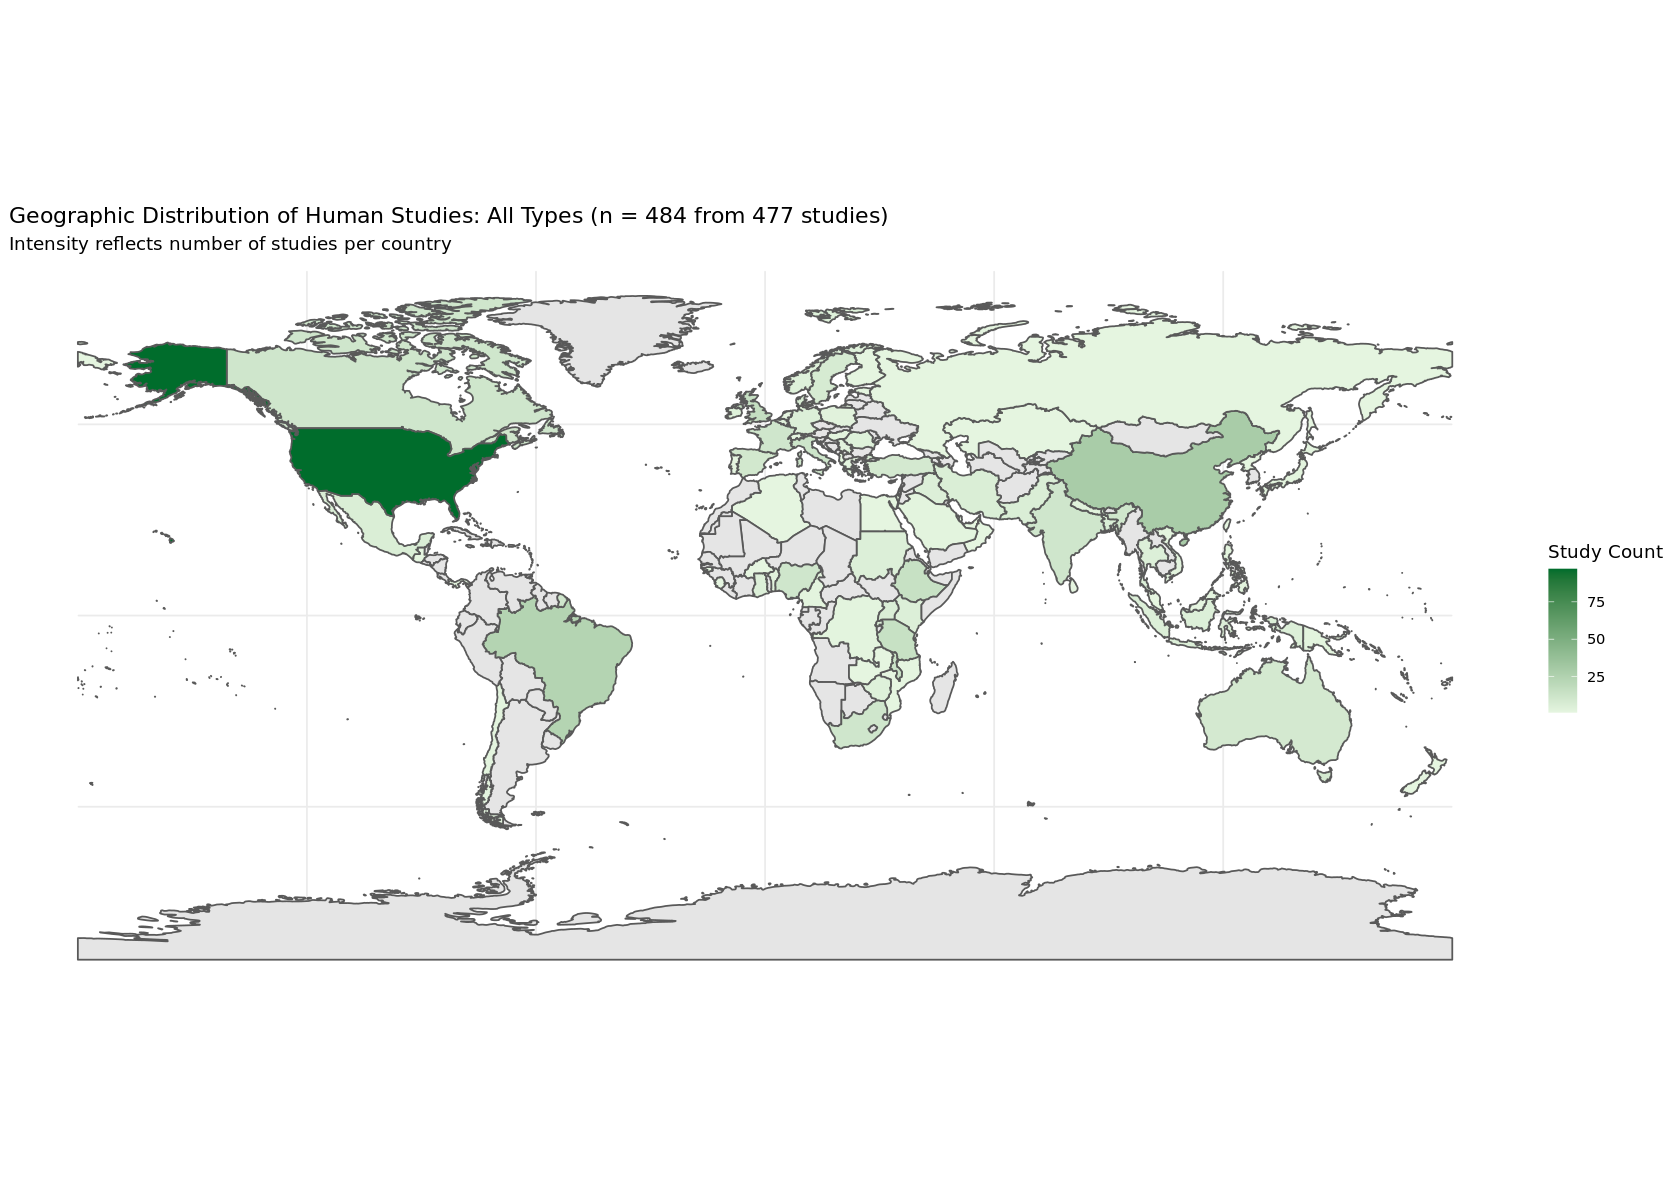

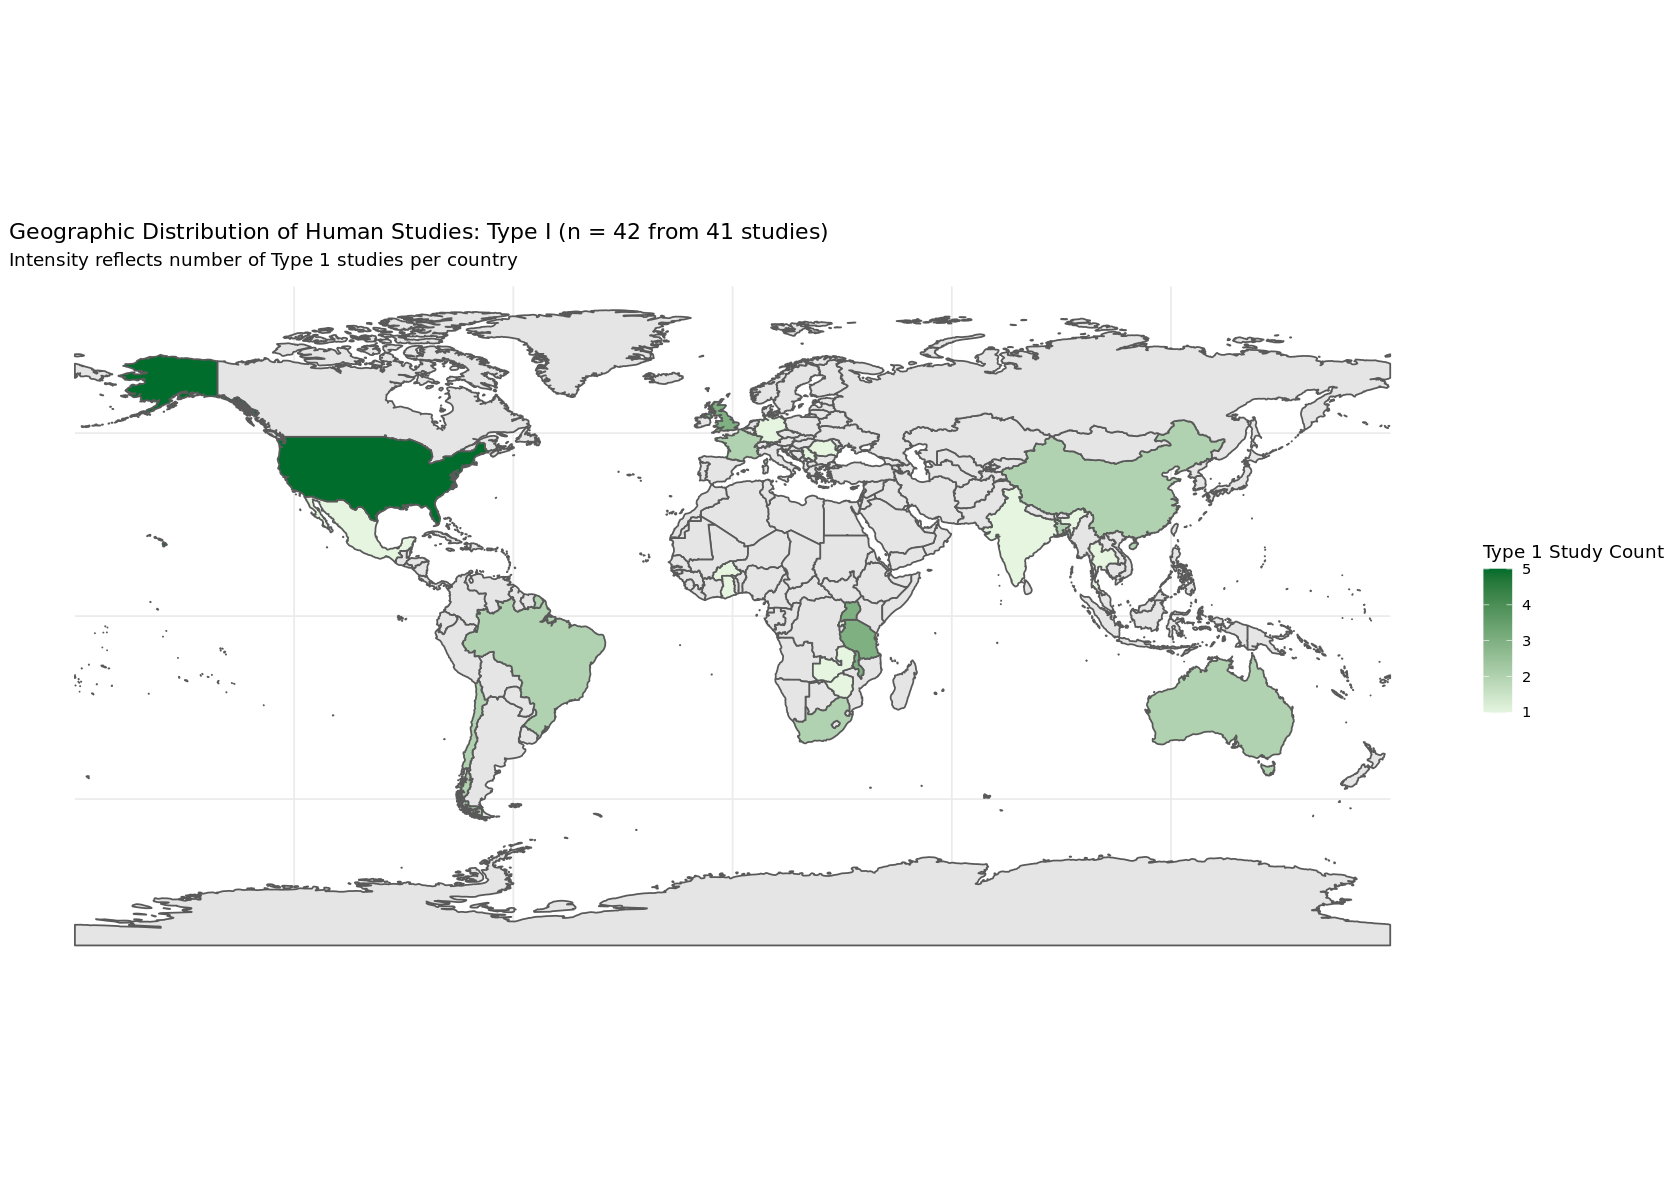

In [16]:
# Plot the map
options(repr.plot.width = 14, repr.plot.height = 10)

ggplot(data = world_data) +
  geom_sf(aes(fill = study_count)) +
  scale_fill_gradient(name = "Study Count",
                      low = "#e5f5e0", high = "#006d2c", na.value = "grey90") +
  theme_minimal() +
  labs(title = "Geographic Distribution of Human Studies: All Types (n = 484 from 477 studies)",
       subtitle = "Intensity reflects number of studies per country")

## Geographic map of type 1 studies only

options(repr.plot.width = 14, repr.plot.height = 10)

# Filter for Human species and Type 1 studies
human_type1_data <- datMeta_clean %>%
  filter(species_grouped == "Human", studyScore == "Type I")


# Count studies per country
study_counts_type1 <- human_type1_data %>%
  group_by(countryStudy) %>%
  summarise(study_count = n())

# Load world map
world <- ne_countries(scale = "medium", returnclass = "sf")

# Merge with study counts
world_data_type1 <- world %>%
  left_join(study_counts_type1, by = c("name" = "countryStudy"))

# Plot the map with green shades
ggplot(data = world_data_type1) +
  geom_sf(aes(fill = study_count)) +
  scale_fill_gradient(name = "Type 1 Study Count",
                      low = "#e5f5e0", high = "#006d2c", na.value = "grey90") +
  theme_minimal() +
  labs(title = "Geographic Distribution of Human Studies: Type I (n = 42 from 41 studies)",
       subtitle = "Intensity reflects number of Type 1 studies per country")



In [17]:
# Filter for Other species
other_data <- datMeta_clean %>%
  filter(species_grouped == "Other")

# Count studies per country
study_counts <- other_data %>%
  group_by(countryStudy) %>%
  summarise(study_count = n())

# Load world map
world <- ne_countries(scale = "medium", returnclass = "sf")

# Merge with study counts
world_data <- world %>%
  left_join(study_counts, by = c("name" = "countryStudy"))


In [18]:
#Are there any countries that have not been mapped to the world data?
sort(setdiff(study_counts$countryStudy, world_data$name))

character(0)

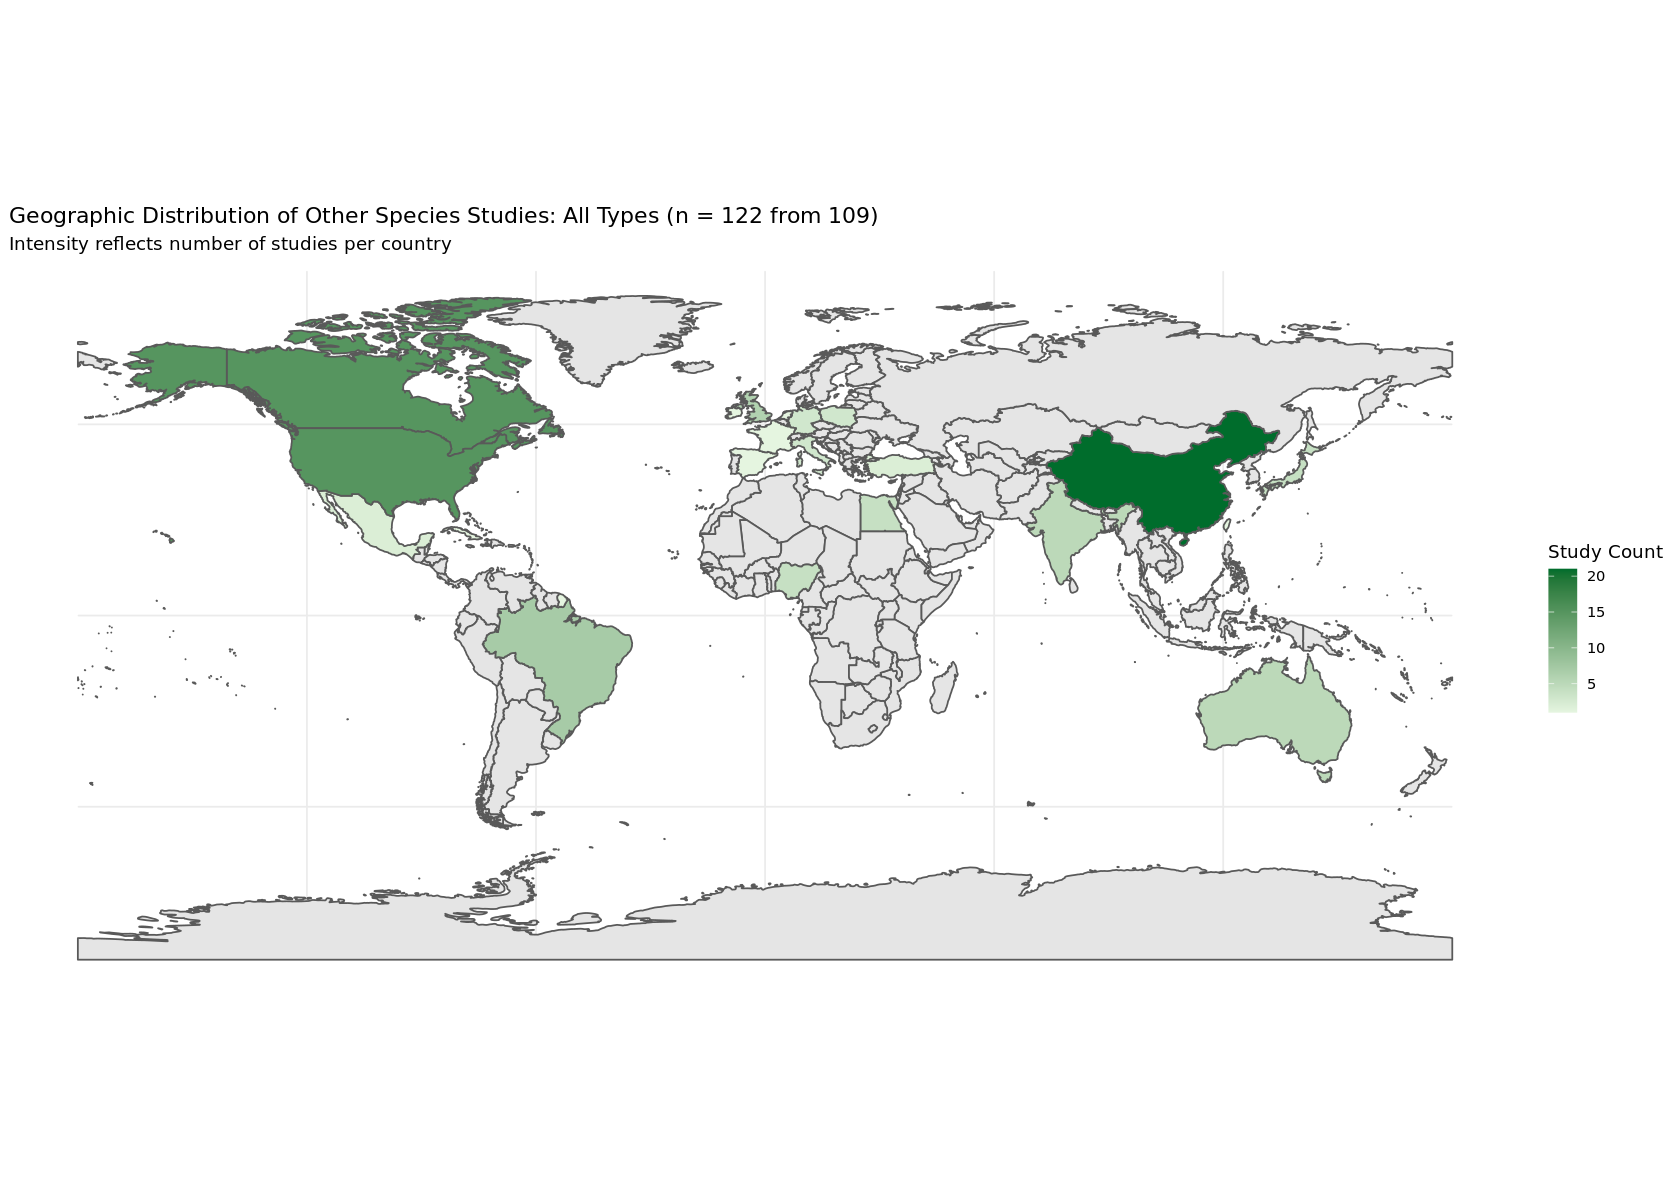

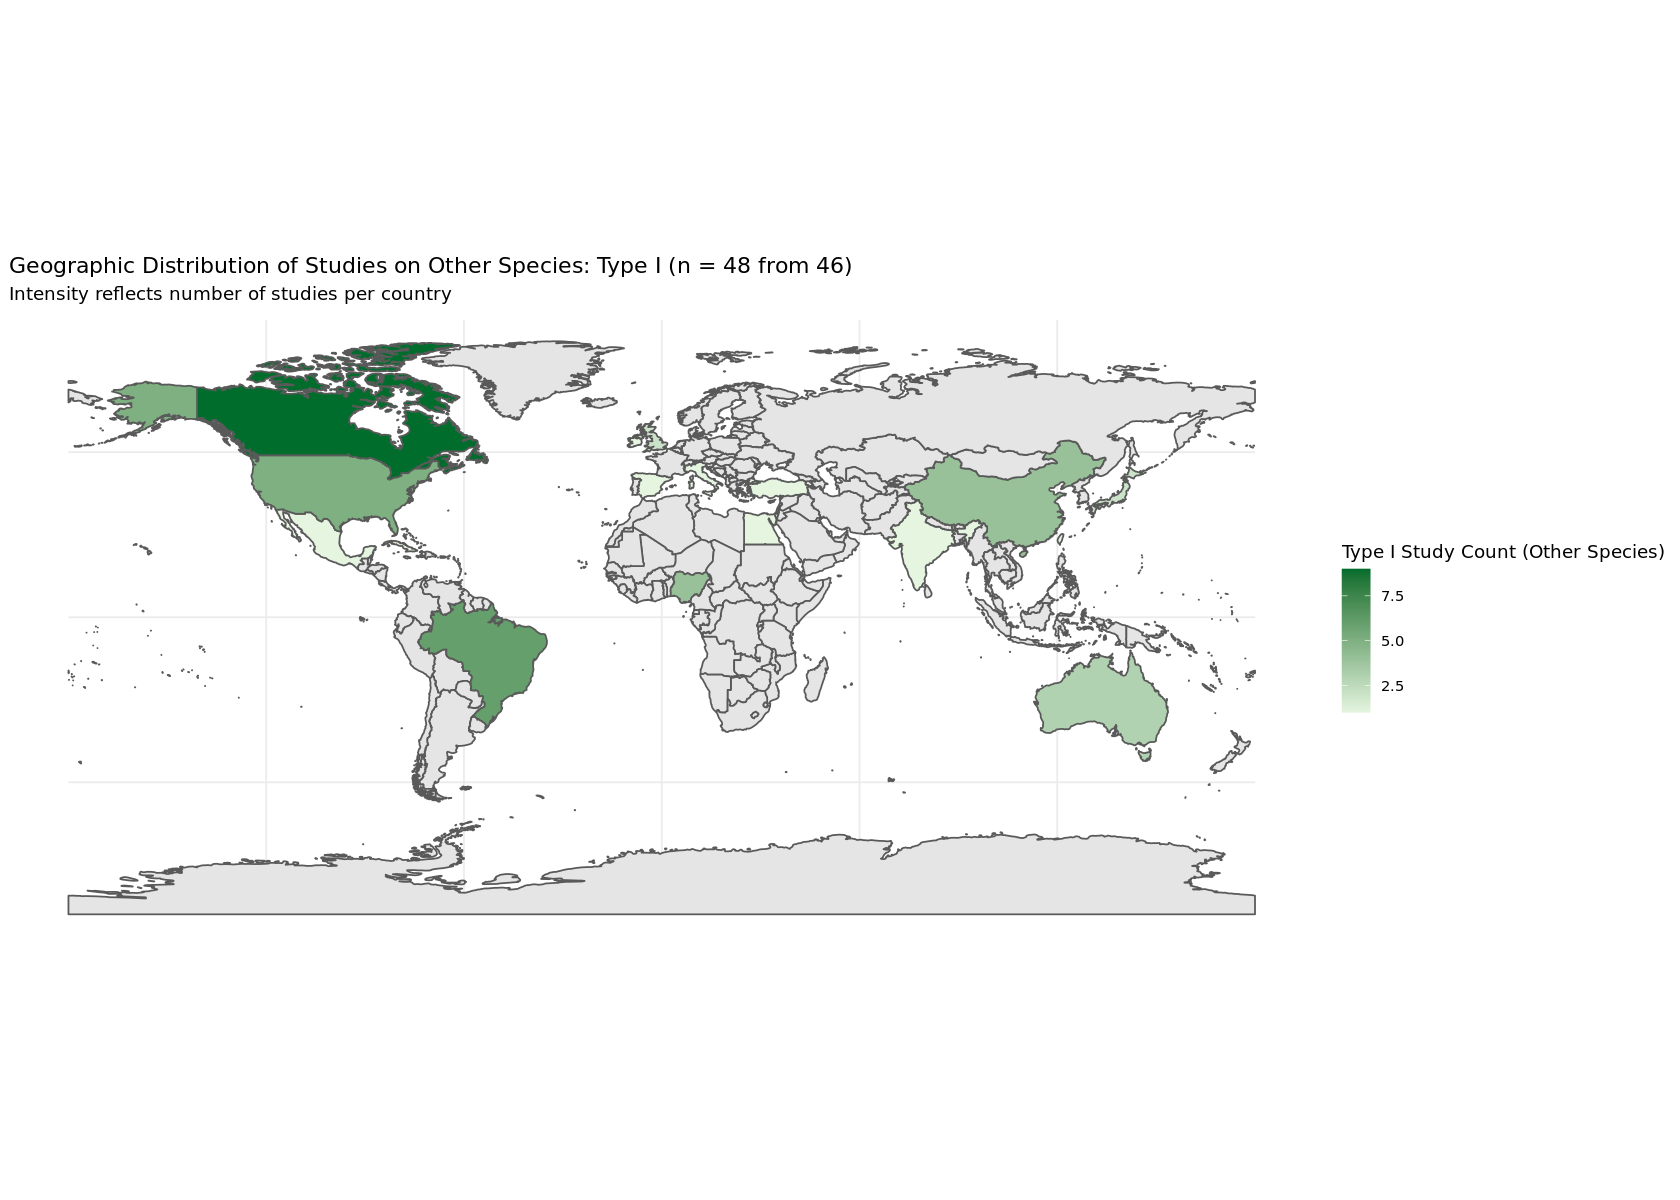

In [19]:
# Plot the map

options(repr.plot.width = 14, repr.plot.height = 10)


ggplot(data = world_data) +
  geom_sf(aes(fill = study_count)) +
  scale_fill_gradient(name = "Study Count",
                      low = "#e5f5e0", high = "#006d2c", na.value = "grey90") +
  theme_minimal() +
  labs(title = "Geographic Distribution of Other Species Studies: All Types (n = 122 from 109)",
       subtitle = "Intensity reflects number of studies per country")



## Geographic map of type 1 studies only

# Filter for Other species and Type I studies
other_type1_data <- datMeta_clean %>%
  filter(species_grouped == "Other", studyScore == "Type I")


# Count studies per country
study_counts <- other_type1_data %>%
  group_by(countryStudy) %>%
  summarise(study_count = n())

# Load world map
world <- ne_countries(scale = "medium", returnclass = "sf")

# Merge with study counts
world_data <- world %>%
  left_join(study_counts, by = c("name" = "countryStudy"))

# Plot the map
ggplot(data = world_data) +
  geom_sf(aes(fill = study_count)) +
  scale_fill_gradient(name = "Type I Study Count (Other Species)",
                      low = "#e5f5e0", high = "#006d2c", na.value = "grey90") +
  theme_minimal() +
  labs(title = "Geographic Distribution of Studies on Other Species: Type I (n = 48 from 46)",
       subtitle = "Intensity reflects number of studies per country")


### Frequency of Terms within each data Type

#### Infection Frequencies:

In [20]:
#Step 1: Create a df based on datInfType_long (where multiple infections per study is listed in multiple lines) and Meta which lists eg species. 
#List of all the dfs

dfs_list <- list(datMeta, datInfType_long)

# Full join all data frames by "studyRef"

datMetaInf <- Reduce(function(x,y) full_join(x,y, by = "studyRef"), dfs_list)

#Create a speciesCat column
datMetaInf <- datMetaInf %>% mutate(speciesCat = ifelse(species == "Human", "Human", "Other"))

                            
head(datMetaInf)
dim(datMetaInf)
                    

studyRef   assessedBy firstAuthor year species countryStudy mainOutcome
1 1182475512 AS/SE      O'Higgins   2014 Human   Ireland      Both       
2 1182475524 AS/SE      Cox         2019 Human   Belgium      Both       
3 1182476286 AS/SE      Assaf-Balut 2019 Human   Spain        Both       
4 1182476955 AS/SE      Assaf-Balut 2019 Human   Spain        Both       
5 1182477024 AS/SE      Fondjo      2020 Human   Ghana        Mother     
6 1182477025 AS/SE      Shamsi      2010 Human   Pakistan     Mother     
  studyScore species_grouped infectionType                  
1 Type II    Human           Bacterial infection            
2 Type III   Human           Inflammatory/immune response   
3 Type II    Human           Urinary/Genital Tract Infection
4 Type II    Human           Urinary/Genital Tract Infection
5 Type II    Human           Malaria                        
6 Type III   Human           Urinary/Genital Tract Infection
  InfCat                        speciesCat
1 Bacterial Infection           Human     
2 Immune/Inflammatory Responses Human     
3 Unspecified Infection         Human     
4 Unspecified Infection         Human     
5 Parasitic Infection           Human     
6 Unspecified Infection         Human

[1] 899  12

In [21]:
#Step 2: Create a df that counts the occurrence of each infection type


# 1: Count occurrences of each infection type
datMetaInf_cat <- datMetaInf %>%
    filter(infectionType != "") %>%
    count(infectionType) %>%
    arrange(n) %>%
    mutate(infectionType = factor(infectionType, levels = infectionType))


# 2: Left join with the lookup table from before to add InfCat
datMetaInf_cat <- datMetaInf_cat %>% 
    left_join(infection_lookup %>% select(Infection, InfCat),
        by = c("infectionType" = "Infection"))


# 3: Ensure infectionType is ordered by frequency
datMetaInf_cat <- datMetaInf_cat %>%
    arrange(n) %>%
    mutate(infectionType = factor(infectionType, levels = infectionType))


head(datMetaInf_cat)


infectionType      n InfCat               
1 HPV                2 Viral Infections     
2 Yeast infection    2 Unspecified Infection
3 Sepsis             3 Bacterial Infection  
4 Systemic infection 3 Unspecified Infection
5 Tuberculosis       3 Bacterial Infection  
6 Toxoplasmosis      4 Parasitic Infection

In [22]:
# Draw plots based on Humans/Other and Type I vs all studies:

#Step 1: Create a df based on datInfType_long for Humans only and for Humans Type I only. 
dfs_list <- list(datMeta, datInfType_long) # Full join all data frames by "studyRef" 

datMetaInf <- Reduce(function(x,y) full_join(x,y, by = "studyRef"), dfs_list) 

#Create a speciesCat column 
datMetaInf <- datMetaInf %>% mutate(speciesCat = ifelse(species == "Human", "Human", "Other")) 

#Filter Human data only 
datMetaInf_human <- datMetaInf %>% filter(speciesCat =="Human") 
dim(datMetaInf_human) 
head(datMetaInf_human) 

print(unique(datMetaInf_human$infectionType))
                     
#Filter Other data only
datMetaInf_other <- datMetaInf %>% filter(speciesCat =="Other") 
dim(datMetaInf_other) 
head(datMetaInf_other) 


print(unique(datMetaInf_other$infectionType))

[1] 782  12

studyRef   assessedBy firstAuthor year species countryStudy mainOutcome
1 1182475512 AS/SE      O'Higgins   2014 Human   Ireland      Both       
2 1182475524 AS/SE      Cox         2019 Human   Belgium      Both       
3 1182476286 AS/SE      Assaf-Balut 2019 Human   Spain        Both       
4 1182476955 AS/SE      Assaf-Balut 2019 Human   Spain        Both       
5 1182477024 AS/SE      Fondjo      2020 Human   Ghana        Mother     
6 1182477025 AS/SE      Shamsi      2010 Human   Pakistan     Mother     
  studyScore species_grouped infectionType                  
1 Type II    Human           Bacterial infection            
2 Type III   Human           Inflammatory/immune response   
3 Type II    Human           Urinary/Genital Tract Infection
4 Type II    Human           Urinary/Genital Tract Infection
5 Type II    Human           Malaria                        
6 Type III   Human           Urinary/Genital Tract Infection
  InfCat                        speciesCat
1 Bacterial Infection           Human     
2 Immune/Inflammatory Responses Human     
3 Unspecified Infection         Human     
4 Unspecified Infection         Human     
5 Parasitic Infection           Human     
6 Unspecified Infection         Human

 [1] "Bacterial infection"                                      
 [2] "Inflammatory/immune response"                             
 [3] "Urinary/Genital Tract Infection"                          
 [4] "Malaria"                                                  
 [5] "Fever or cold"                                            
 [6] "Respiratory infection"                                    
 [7] "Other"                                                    
 [8] "Influenza"                                                
 [9] "Periodontal"                                              
[10] "Covid-19"                                                 
[11] "HIV"                                                      
[12] "Parasitic infection (nematode/hookworm etc)"              
[13] "H. pylori infection"                                      
[14] "Hepatitis B/C"                                            
[15] "STI"                                                      
[16] "Vaccine response"  

[1] 117  12

studyRef   assessedBy firstAuthor year species countryStudy mainOutcome
1 1182475095 AS         Harvey      2014 Rat     Canada       Offspring  
2 1182475276 AS         Chebel      2021 Cow     USA          Mother     
3 1182475318 AS         McGlone     2001 Pig     USA          Both       
4 1182475351 AS         Sharma      2020 Buffalo India        Mother     
5 1182475381 AS         Houdijk     2000 Sheep   UK           Both       
6 1182475386 AS         Sebastiano  2017 Sheep   Ireland      Mother     
  studyScore species_grouped infectionType                              
1 Type I     Other           LPS injection                              
2 Type II    Other           Other                                      
3 Type III   Other           Inflammatory/immune response               
4 Type III   Other           Inflammatory/immune response               
5 Type I     Other           Parasitic infection (nematode/hookworm etc)
6 Type I     Other           Parasitic infection (nematode/hookworm etc)
  InfCat                        speciesCat
1 Immune/Inflammatory Responses Other     
2 Unspecified Infection         Other     
3 Immune/Inflammatory Responses Other     
4 Immune/Inflammatory Responses Other     
5 Parasitic Infection           Other     
6 Parasitic Infection           Other

 [1] "LPS injection"                                            
 [2] "Other"                                                    
 [3] "Inflammatory/immune response"                             
 [4] "Parasitic infection (nematode/hookworm etc)"              
 [5] "Zika virus"                                               
 [6] "Malaria"                                                  
 [7] "Vaccine response"                                         
 [8] "Intra-amniotic/intra-uterine infection (chorioamnionitis)"
 [9] "Bacterial infection"                                      
[10] "Toxoplasmosis"                                            


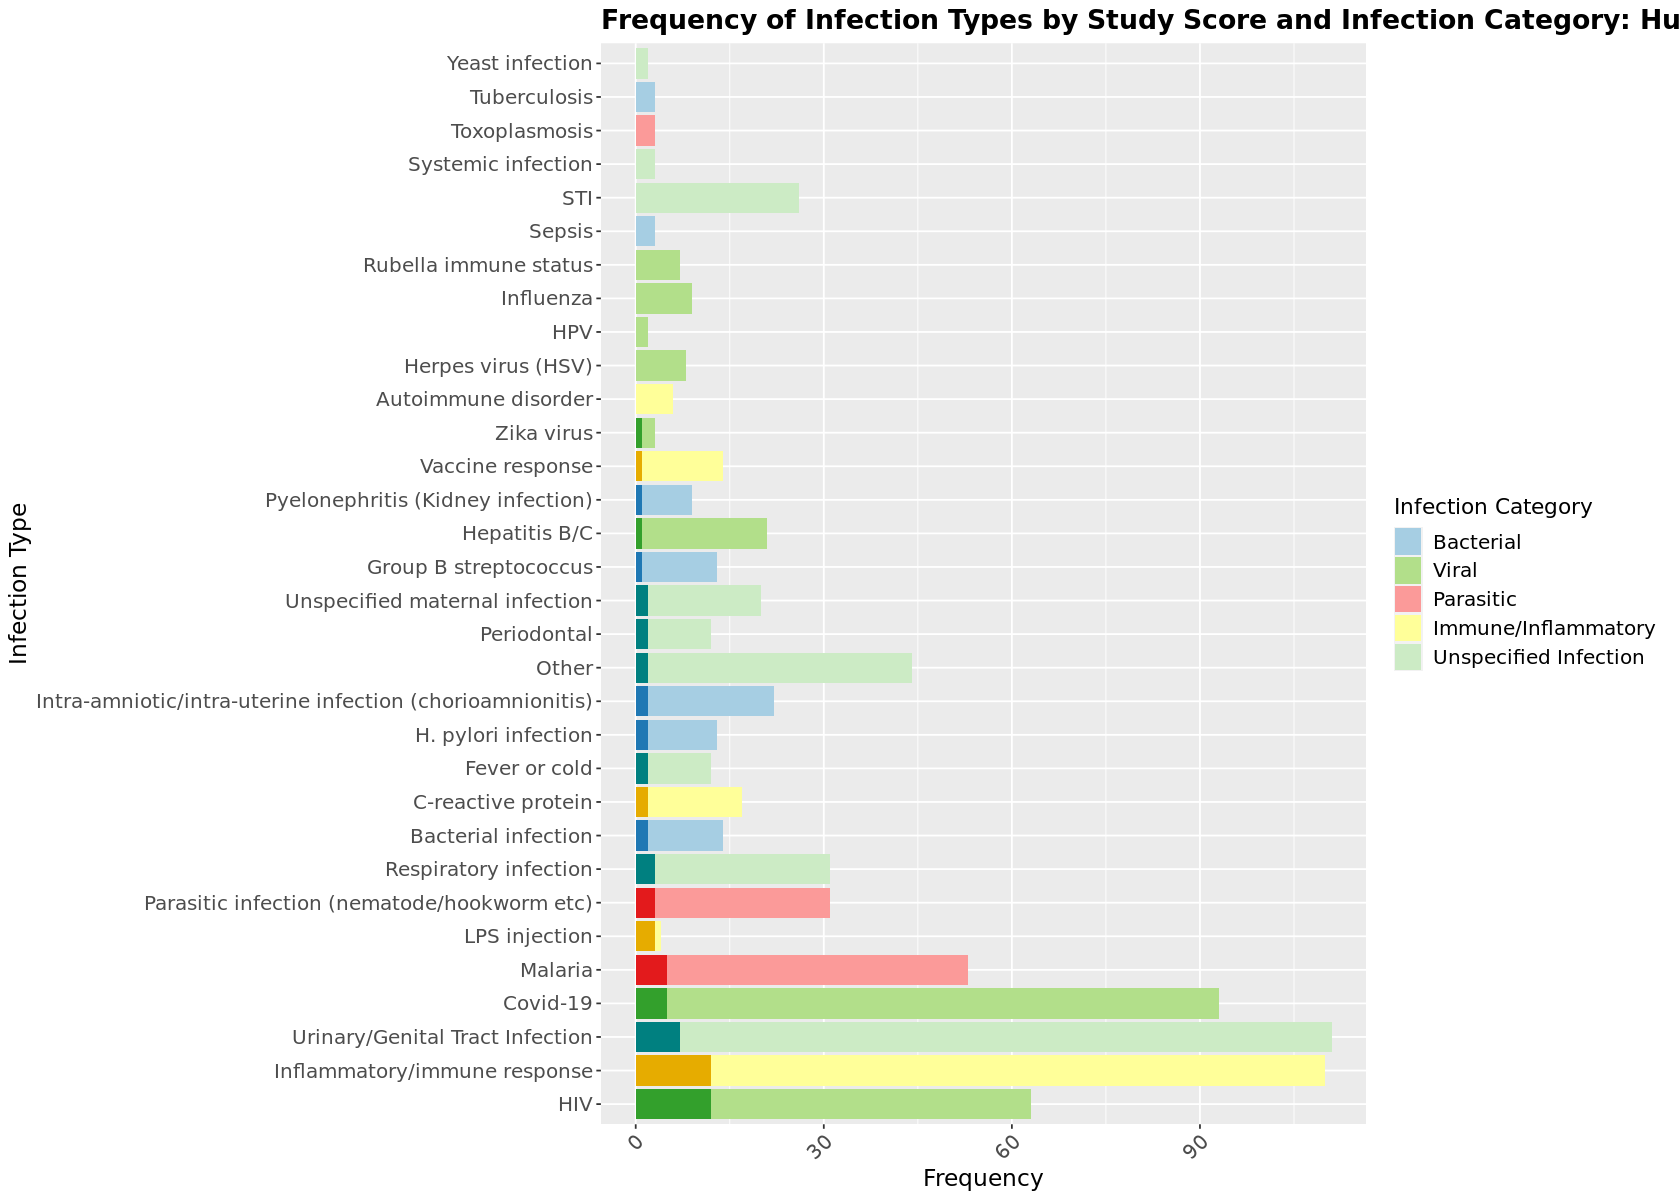

In [23]:
##Plot the Human Infection frequency data

# Step 1: Prepare the data
datMetaInf_human_cat <- datMetaInf_human %>%
  filter(infectionType != "") %>%
  mutate(
    studyScore_cat = ifelse(studyScore == "Type I", "Type I", "Other Types"),
    comboGroup = paste(InfCat, studyScore_cat, sep = "_")
  ) %>%
  count(infectionType, InfCat, studyScore_cat, comboGroup)

# Step 2: Create all combinations of infectionType and studyScore_cat
all_combos <- expand.grid(
  infectionType = unique(datMetaInf_human_cat$infectionType),
  studyScore_cat = c("Other Types", "Type I")
)

# Add InfCat and comboGroup back in
all_combos <- datMetaInf_human_cat %>%
  select(infectionType, InfCat) %>%
  distinct() %>%
  right_join(all_combos, by = "infectionType") %>%
  mutate(comboGroup = paste(InfCat, studyScore_cat, sep = "_"))


# Step 3: Join with actual counts and fill missing with 0
dat_full <- all_combos %>%
  left_join(datMetaInf_human_cat, by = c("infectionType", "InfCat", "studyScore_cat", "comboGroup")) %>%
  mutate(n = replace_na(n, 0))

# Step 4: Order infectionType by Type I counts
typeI_order <- dat_full %>%
  filter(studyScore_cat == "Type I") %>%
  arrange(desc(n)) %>%
  pull(infectionType)

# Ensure all infectionTypes are included
typeI_order <- unique(c(typeI_order, dat_full$infectionType))

# Step 5: Apply factor levels
dat_full <- dat_full %>%
  mutate(
    infectionType = factor(infectionType, levels = typeI_order),
    studyScore_cat = factor(studyScore_cat, levels = c("Other Types", "Type I"))
  )

# Define custom colors for each InfCat-studyScore_cat combination
custom_colors <- c(
  "Bacterial Infection_Other Types"         = "#a6cee3",  # light blue
  "Bacterial Infection_Type I"              = "#1f78b4",  # dark blue
  "Viral Infections_Other Types"             = "#b2df8a",  # light green
  "Viral Infections_Type I"                  = "#33a02c",  # dark green
  "Parasitic Infection_Other Types"         = "#fb9a99",  # light pink
  "Parasitic Infection_Type I"              = "#e31a1c",  # dark pink/red
  "Immune/Inflammatory Responses_Other Types"            = "#ffff99",  # light yellow
  "Immune/Inflammatory Responses_Type I"                 = "#e6ac00",  # goldenrod
  "Unspecified Infection_Other Types" = "#ccebc5",  # light teal
  "Unspecified Infection_Type I"     = "#008080"   # dark teal
)



# Define which groups you want to show in the legend
legend_labels <- c(
  "Bacterial Infection_Other Types" = "Bacterial",
  "Viral Infections_Other Types" = "Viral",
  "Parasitic Infection_Other Types" = "Parasitic",
  "Immune/Inflammatory Responses_Other Types" = "Immune/Inflammatory",
  "Unspecified Infection_Other Types" = "Unspecified Infection"
)

# Step 6: Plot
ggplot(dat_full, aes(x = infectionType, y = n, fill = comboGroup)) +
  coord_flip() +
  geom_bar(stat = "identity") +
  theme(
    axis.text.x = element_text(angle = 45, hjust = 1, size = 12),
    axis.text.y = element_text(size = 12),
    axis.title.x = element_text(size = 14),
    axis.title.y = element_text(size = 14),
    legend.text = element_text(size = 12),
    legend.title = element_text(size = 13),
    plot.title = element_text(size = 16, face = "bold")
  ) +
  labs(
    title = "Frequency of Infection Types by Study Score and Infection Category: Humans",
    x = "Infection Type",
    y = "Frequency",
    fill = "Infection Category"
  ) +
  scale_fill_manual(
    values = custom_colors,
    breaks = names(legend_labels),
    labels = legend_labels
  )

                                               infectionType
1                                        Bacterial infection
2                                        Bacterial infection
3                               Inflammatory/immune response
4                               Inflammatory/immune response
5  Intra-amniotic/intra-uterine infection (chorioamnionitis)
6  Intra-amniotic/intra-uterine infection (chorioamnionitis)
7                                              LPS injection
8                                              LPS injection
9                                                    Malaria
10                                                   Malaria
11                                                     Other
12                                                     Other
13               Parasitic infection (nematode/hookworm etc)
14               Parasitic infection (nematode/hookworm etc)
15                                             Toxoplasmosis
16                      

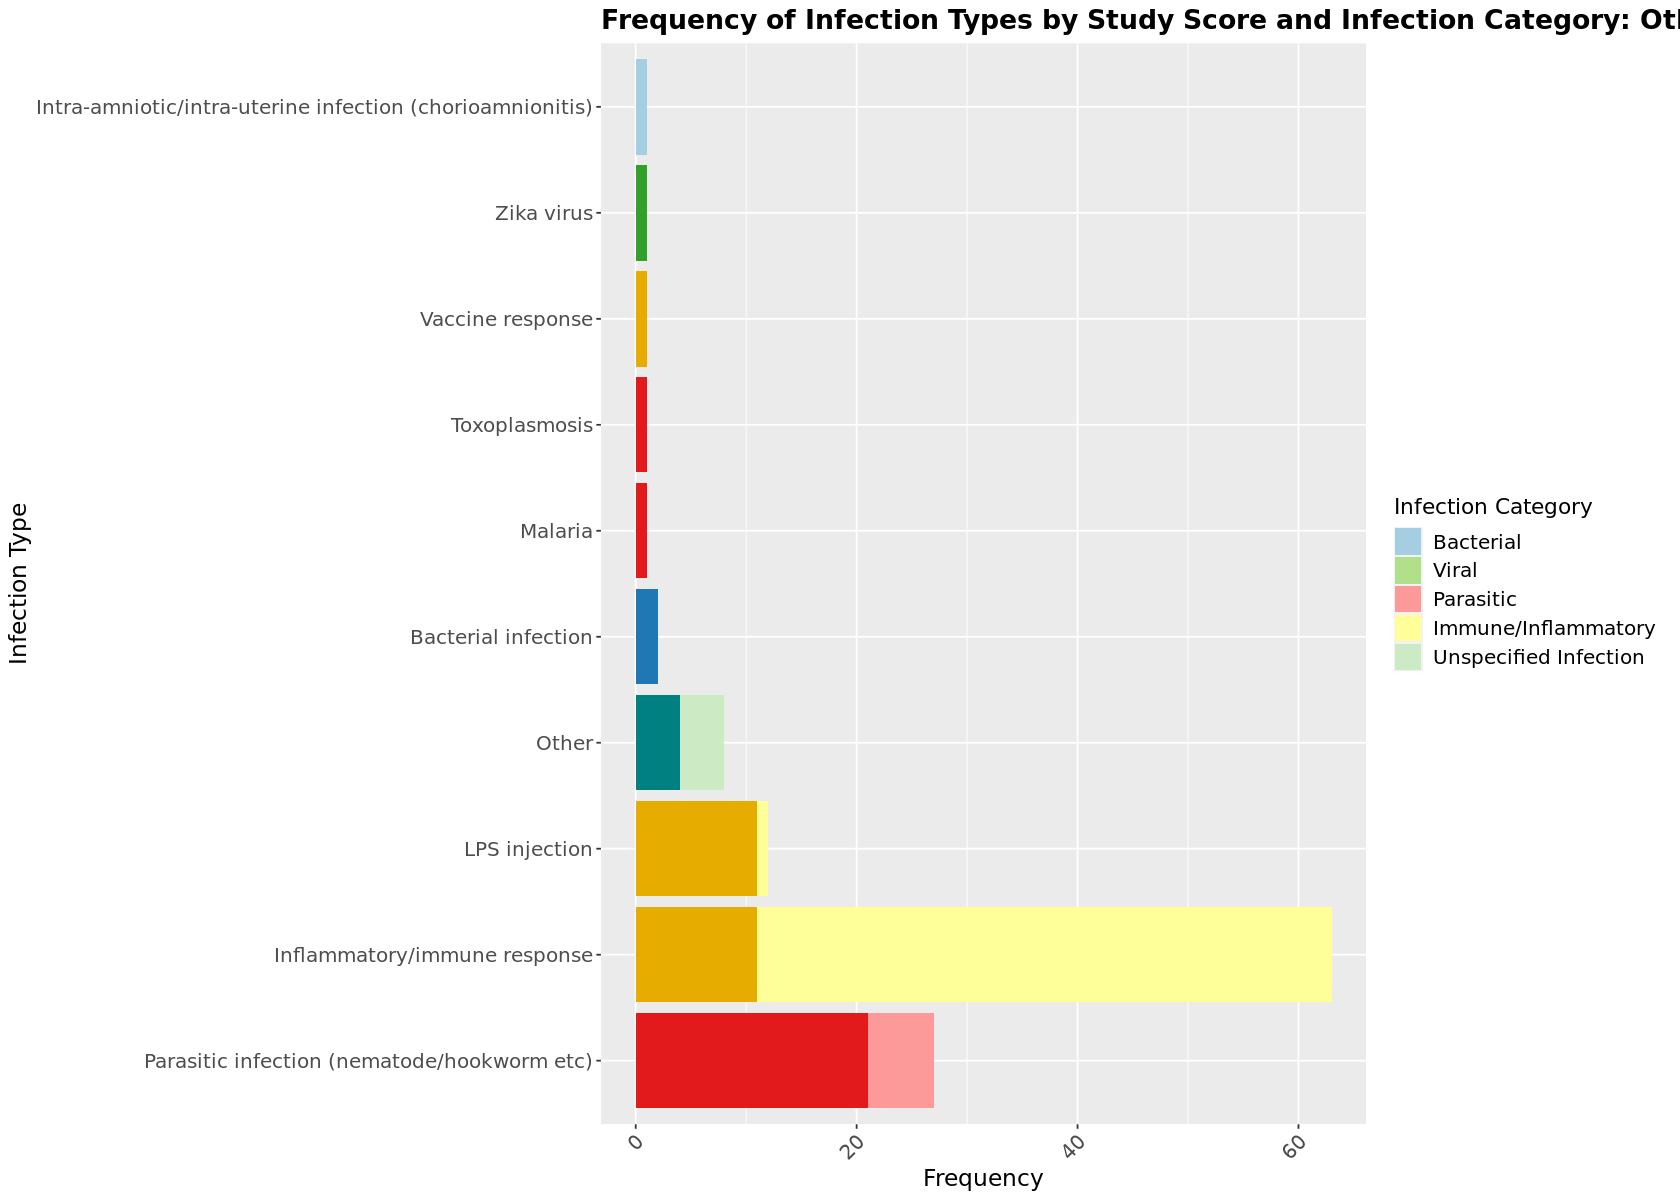

In [24]:
##Plot the Other Infection frequency data

# Step 1: Prepare the data
datMetaInf_other_cat <- datMetaInf_other %>%
  filter(infectionType != "") %>%
  mutate(
    studyScore_cat = ifelse(studyScore == "Type I", "Type I", "Other Types"),
    comboGroup = paste(InfCat, studyScore_cat, sep = "_")
  ) %>%
  count(infectionType, InfCat, studyScore_cat, comboGroup)

# Step 2: Create all combinations of infectionType and studyScore_cat
all_combos <- expand.grid(
  infectionType = unique(datMetaInf_other_cat$infectionType),
  studyScore_cat = c("Other Types", "Type I")
)


# Add InfCat and comboGroup back in
all_combos <- datMetaInf_other_cat %>%
  select(infectionType, InfCat) %>%
  distinct() %>%
  right_join(all_combos, by = "infectionType") %>%
  mutate(comboGroup = paste(InfCat, studyScore_cat, sep = "_"))

print(all_combos)

# Step 3: Join with actual counts and fill missing with 0
dat_full <- all_combos %>%
  left_join(datMetaInf_other_cat, by = c("infectionType", "InfCat", "studyScore_cat", "comboGroup")) %>%
  mutate(n = replace_na(n, 0))

# Step 4: Order infectionType by Type I counts
typeI_order <- dat_full %>%
  filter(studyScore_cat == "Type I") %>%
  arrange(desc(n)) %>%
  pull(infectionType)

# Ensure all infectionTypes are included
typeI_order <- unique(c(typeI_order, dat_full$infectionType))

# Step 5: Apply factor levels
dat_full <- dat_full %>%
  mutate(
    infectionType = factor(infectionType, levels = typeI_order),
    studyScore_cat = factor(studyScore_cat, levels = c("Other Types", "Type I"))
  )

# Define custom colors for each InfCat-studyScore_cat combination
custom_colors <- c(
  "Bacterial Infection_Other Types"         = "#a6cee3",  # light blue
  "Bacterial Infection_Type I"              = "#1f78b4",  # dark blue
  "Viral Infections_Other Types"             = "#b2df8a",  # light green
  "Viral Infections_Type I"                  = "#33a02c",  # dark green
  "Parasitic Infection_Other Types"         = "#fb9a99",  # light pink
  "Parasitic Infection_Type I"              = "#e31a1c",  # dark pink/red
  "Immune/Inflammatory Responses_Other Types"            = "#ffff99",  # light yellow
  "Immune/Inflammatory Responses_Type I"                 = "#e6ac00",  # goldenrod
  "Unspecified Infection_Other Types" = "#ccebc5",  # light teal
  "Unspecified Infection_Type I"     = "#008080"   # dark teal
)



# Define which groups you want to show in the legend
legend_labels <- c(
  "Bacterial Infection_Other Types" = "Bacterial",
  "Viral Infections_Other Types" = "Viral",
  "Parasitic Infection_Other Types" = "Parasitic",
  "Immune/Inflammatory Responses_Other Types" = "Immune/Inflammatory",
  "Unspecified Infection_Other Types" = "Unspecified Infection"
)

# Step 6: Plot
ggplot(dat_full, aes(x = infectionType, y = n, fill = comboGroup)) +
  coord_flip() +
  geom_bar(stat = "identity") +
  theme(
    axis.text.x = element_text(angle = 45, hjust = 1, size = 12),
    axis.text.y = element_text(size = 12),
    axis.title.x = element_text(size = 14),
    axis.title.y = element_text(size = 14),
    legend.text = element_text(size = 12),
    legend.title = element_text(size = 13),
    plot.title = element_text(size = 16, face = "bold")
  ) +
  labs(
    title = "Frequency of Infection Types by Study Score and Infection Category: Other",
    x = "Infection Type",
    y = "Frequency",
    fill = "Infection Category"
  ) +
  scale_fill_manual(
    values = custom_colors,
    breaks = names(legend_labels),
    labels = legend_labels
  )


#### Nutrition frequencies: 

In [25]:
#Step 1: Create a df based on datNutType_long (where multiple nutrients per study is listed in multiple lines) and Meta which lists eg species. 
#List of all the dfs

dfs_list <- list(datMeta, datNutType_long)

# Full join all data frames by "studyRef"

datMetaNut <- Reduce(function(x,y) full_join(x,y, by = "studyRef"), dfs_list)

#Create a speciesCat column
datMetaNut <- datMetaNut %>% mutate(speciesCat = ifelse(species == "Human", "Human", "Other"))

                            
head(datMetaNut)
dim(datMetaNut)
                  


studyRef   assessedBy firstAuthor year species countryStudy mainOutcome
1 1182475512 AS/SE      O'Higgins   2014 Human   Ireland      Both       
2 1182475524 AS/SE      Cox         2019 Human   Belgium      Both       
3 1182476286 AS/SE      Assaf-Balut 2019 Human   Spain        Both       
4 1182476286 AS/SE      Assaf-Balut 2019 Human   Spain        Both       
5 1182476955 AS/SE      Assaf-Balut 2019 Human   Spain        Both       
6 1182476955 AS/SE      Assaf-Balut 2019 Human   Spain        Both       
  studyScore species_grouped nutritionType            NutCat                   
1 Type II    Human           BMI                      Anthropometric Indicators
2 Type III   Human           BMI                      Anthropometric Indicators
3 Type II    Human           BMI                      Anthropometric Indicators
4 Type II    Human           Dietary diversity/change Diet/Other               
5 Type II    Human           BMI                      Anthropometric Indicators
6 Type II    Human           Dietary diversity/change Diet/Other               
  speciesCat
1 Human     
2 Human     
3 Human     
4 Human     
5 Human     
6 Human

[1] 990  12

In [26]:
#Step 2: Create a df that counts the occurrence of each Nutrition type


# 1: Count occurrences of each nutrient type
datMetaNut_cat <- datMetaNut %>%
    filter(nutritionType != "") %>%
    count(nutritionType) %>%
    arrange(n) %>%
    mutate(nutritionType = factor(nutritionType, levels = nutritionType))


# 2: Left join with the lookup table from before to add InfCat
datMetaNut_cat <- datMetaNut_cat %>% 
    left_join(nutrient_lookup %>% select(Nutrition, NutCat),
        by = c("nutritionType" = "Nutrition"))



# 3: Ensure infectionType is ordered by frequency
datMetaNut_cat <- datMetaNut_cat %>%
    arrange(n) %>%
    mutate(nutritionType = factor(nutritionType, levels = nutritionType))


head(datMetaNut_cat)


nutritionType n NutCat        
1 Boron         1 Micronutrients
2 Fibre         1 Macronutrients
3 Phosphorus    1 Micronutrients
4 Magnesium     2 Micronutrients
5 Calcium       8 Micronutrients
6 High fat diet 8 Macronutrients

In [27]:
# Draw plots based on Humans/Other and Type I vs all studies:

#Step 1: Create a df based on datNutType_long for Humans only and for Humans Type I only. 
dfs_list <- list(datMeta, datNutType_long) # Full join all data frames by "studyRef" 

datMetaNut <- Reduce(function(x,y) full_join(x,y, by = "studyRef"), dfs_list) 

#Create a speciesCat column 
datMetaNut <- datMetaNut %>% mutate(speciesCat = ifelse(species == "Human", "Human", "Other")) 

#Filter Human data only 
datMetaNut_human <- datMetaNut %>% filter(speciesCat =="Human") 

dim(datMetaNut_human) 
head(datMetaNut_human) 

#Filter Other data only
datMetaNut_other <- datMetaNut %>% filter(speciesCat =="Other")

dim(datMetaNut_other) 
head(datMetaNut_other) 

[1] 840  12

studyRef   assessedBy firstAuthor year species countryStudy mainOutcome
1 1182475512 AS/SE      O'Higgins   2014 Human   Ireland      Both       
2 1182475524 AS/SE      Cox         2019 Human   Belgium      Both       
3 1182476286 AS/SE      Assaf-Balut 2019 Human   Spain        Both       
4 1182476286 AS/SE      Assaf-Balut 2019 Human   Spain        Both       
5 1182476955 AS/SE      Assaf-Balut 2019 Human   Spain        Both       
6 1182476955 AS/SE      Assaf-Balut 2019 Human   Spain        Both       
  studyScore species_grouped nutritionType            NutCat                   
1 Type II    Human           BMI                      Anthropometric Indicators
2 Type III   Human           BMI                      Anthropometric Indicators
3 Type II    Human           BMI                      Anthropometric Indicators
4 Type II    Human           Dietary diversity/change Diet/Other               
5 Type II    Human           BMI                      Anthropometric Indicators
6 Type II    Human           Dietary diversity/change Diet/Other               
  speciesCat
1 Human     
2 Human     
3 Human     
4 Human     
5 Human     
6 Human

[1] 150  12

studyRef   assessedBy firstAuthor year species countryStudy mainOutcome
1 1182475095 AS         Harvey      2014 Rat     Canada       Offspring  
2 1182475276 AS         Chebel      2021 Cow     USA          Mother     
3 1182475318 AS         McGlone     2001 Pig     USA          Both       
4 1182475351 AS         Sharma      2020 Buffalo India        Mother     
5 1182475381 AS         Houdijk     2000 Sheep   UK           Both       
6 1182475386 AS         Sebastiano  2017 Sheep   Ireland      Mother     
  studyScore species_grouped nutritionType            NutCat         speciesCat
1 Type I     Other           Iron                     Micronutrients Other     
2 Type II    Other           Dietary diversity/change Diet/Other     Other     
3 Type III   Other           Dietary diversity/change Diet/Other     Other     
4 Type III   Other           Boron                    Micronutrients Other     
5 Type I     Other           Protein                  Macronutrients Other     
6 Type I     Other           Protein                  Macronutrients Other

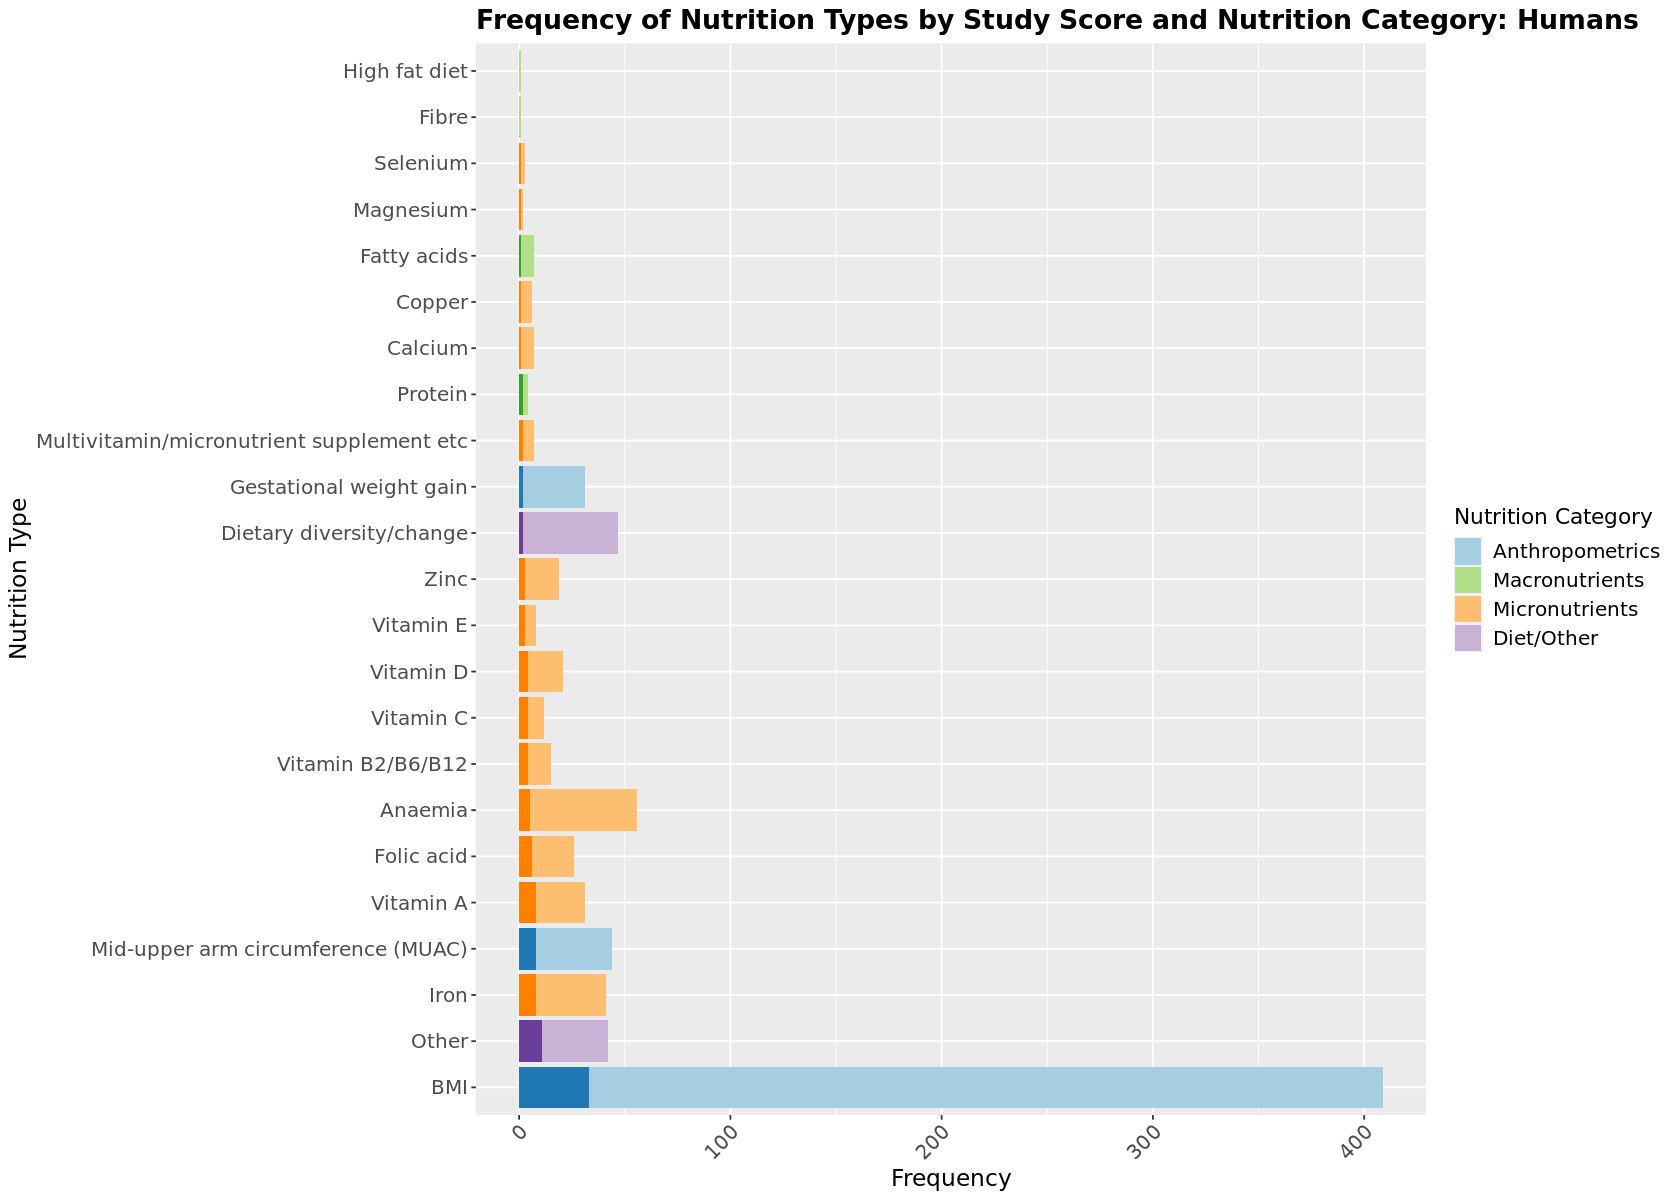

In [28]:
##Plot the Human Nutrition frequency data

# Step 1: Prepare the data
datMetaNut_human_cat <- datMetaNut_human %>%
  filter(nutritionType != "") %>%
  mutate(
    studyScore_cat = ifelse(studyScore == "Type I", "Type I", "Other Types"),
    comboGroup = paste(NutCat, studyScore_cat, sep = "_")
  ) %>%
  count(nutritionType, NutCat, studyScore_cat, comboGroup)

# Step 2: Create all combinations of nutrientType and studyScore_cat
all_combos <- expand.grid(
  nutritionType = unique(datMetaNut_human_cat$nutritionType),
  studyScore_cat = c("Other Types", "Type I")
)

# Add NutCat and comboGroup back in
all_combos <- datMetaNut_human_cat %>%
  select(nutritionType, NutCat) %>%
  distinct() %>%
  right_join(all_combos, by = "nutritionType") %>%
  mutate(comboGroup = paste(NutCat, studyScore_cat, sep = "_"))

# Step 3: Join with actual counts and fill missing with 0
dat_full <- all_combos %>%
  left_join(datMetaNut_human_cat, by = c("nutritionType", "NutCat", "studyScore_cat", "comboGroup")) %>%
  mutate(n = replace_na(n, 0))

# Step 4: Order nutrientType by Type I counts
typeI_order <- dat_full %>%
  filter(studyScore_cat == "Type I") %>%
  arrange(desc(n)) %>%
  pull(nutritionType)

# Ensure all infectionTypes are included
typeI_order <- unique(c(typeI_order, dat_full$nutritionType))

# Step 5: Apply factor levels
dat_full <- dat_full %>%
  mutate(
    nutritionType = factor(nutritionType, levels = typeI_order),
    studyScore_cat = factor(studyScore_cat, levels = c("Other Types", "Type I"))
  )

# Define custom colors for each InfCat-studyScore_cat combination
custom_colors <- c(
  "Anthropometric Indicators_Other Types"         = "#a6cee3",  # light blue
  "Anthropometric Indicators_Type I"              = "#1f78b4",  # dark blue
  "Macronutrients_Other Types"             = "#b2df8a",  # light green
  "Macronutrients_Type I"                  = "#33a02c",  # dark green
  "Micronutrients_Other Types"            = "#fdbf6f",  # light orange
  "Micronutrients_Type I"                 = "#ff7f00",  # dark orange
  "Diet/Other_Other Types"           = "#cab2d6",  # light purple
  "Diet/Other_Type I"                = "#6a3d9a"  # dark purple
)



# Define which groups you want to show in the legend
legend_labels <- c(
  "Anthropometric Indicators_Other Types" = "Anthropometrics",
  "Macronutrients_Other Types" = "Macronutrients",
  "Micronutrients_Other Types" = "Micronutrients",
  "Diet/Other_Other Types" = "Diet/Other"
)

# Step 6: Plot
ggplot(dat_full, aes(x = nutritionType, y = n, fill = comboGroup)) +
  coord_flip() +
  geom_bar(stat = "identity") +
  theme(
    axis.text.x = element_text(angle = 45, hjust = 1, size = 12),
    axis.text.y = element_text(size = 12),
    axis.title.x = element_text(size = 14),
    axis.title.y = element_text(size = 14),
    legend.text = element_text(size = 12),
    legend.title = element_text(size = 13),
    plot.title = element_text(size = 16, face = "bold")
  ) +
  labs(
    title = "Frequency of Nutrition Types by Study Score and Nutrition Category: Humans",
    x = "Nutrition Type",
    y = "Frequency",
    fill = "Nutrition Category"
  ) +
  scale_fill_manual(
    values = custom_colors,
    breaks = names(legend_labels),
    labels = legend_labels
  )

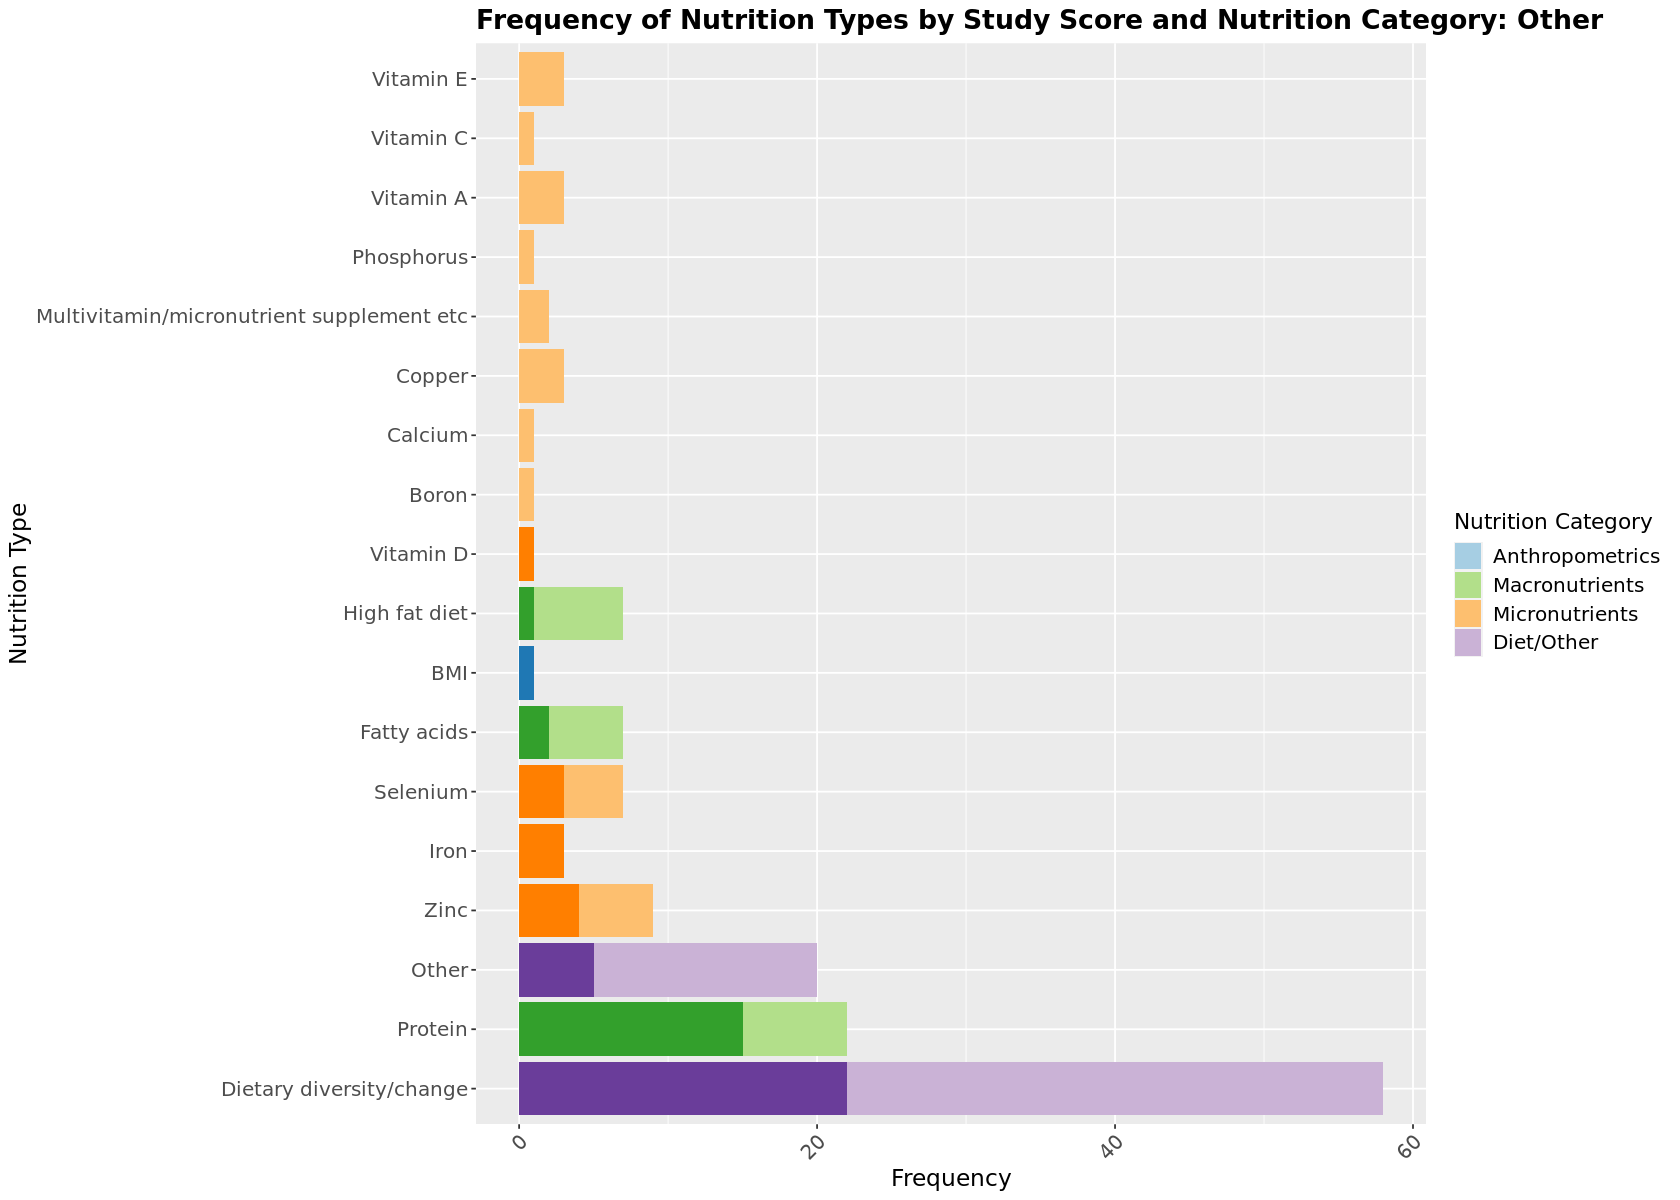

In [29]:
## Plot the Other Nutrition frequency data

# Step 1: Prepare the data
datMetaNut_other_cat <- datMetaNut_other %>%
  filter(nutritionType != "") %>%
  mutate(
    studyScore_cat = ifelse(studyScore == "Type I", "Type I", "Other Types"),
    comboGroup = paste(NutCat, studyScore_cat, sep = "_")
  ) %>%
  count(nutritionType, NutCat, studyScore_cat, comboGroup)

# Step 2: Create all combinations of nutritionType and studyScore_cat
all_combos <- expand.grid(
  nutritionType = unique(datMetaNut_other_cat$nutritionType),
  studyScore_cat = c("Other Types", "Type I")
)

# Add NutCat and comboGroup back in
all_combos <- datMetaNut_other_cat %>%
  select(nutritionType, NutCat) %>%
  distinct() %>%
  right_join(all_combos, by = "nutritionType") %>%
  mutate(comboGroup = paste(NutCat, studyScore_cat, sep = "_"))

# Step 3: Join with actual counts and fill missing with 0
dat_full <- all_combos %>%
  left_join(datMetaNut_other_cat, by = c("nutritionType", "NutCat", "studyScore_cat", "comboGroup")) %>%
  mutate(n = replace_na(n, 0))

# Step 4: Order nutritionType by Type I counts
typeI_order <- dat_full %>%
  filter(studyScore_cat == "Type I") %>%
  arrange(desc(n)) %>%
  pull(nutritionType)

# Ensure all nutritionTypes are included
typeI_order <- unique(c(typeI_order, dat_full$nutritionType))

# Step 5: Apply factor levels
dat_full <- dat_full %>%
  mutate(
    nutritionType = factor(nutritionType, levels = typeI_order),
    studyScore_cat = factor(studyScore_cat, levels = c("Other Types", "Type I"))
  )


# Define custom colors for each NutCat-studyScore_cat combination
custom_colors <- c(
  "Anthropometric Indicators_Other Types"         = "#a6cee3",  # light blue
  "Anthropometric Indicators_Type I"              = "#1f78b4",  # dark blue
  "Macronutrients_Other Types"          = "#b2df8a",  # light green
  "Macronutrients_Type I"               = "#33a02c",  # dark green
  "Micronutrients_Other Types"          = "#fdbf6f",  # light orange
  "Micronutrients_Type I"               = "#ff7f00",  # dark orange
  "Diet/Other_Other Types"              = "#cab2d6",  # light purple
  "Diet/Other_Type I"                   = "#6a3d9a"  # dark purple
)

# Define which groups you want to show in the legend
legend_labels <- c(
  "Anthropometric Indicators_Other Types" = "Anthropometrics",
  "Macronutrients_Other Types" = "Macronutrients",
  "Micronutrients_Other Types" = "Micronutrients",
  "Diet/Other_Other Types" = "Diet/Other"

)

# Step 6: Plot
ggplot(dat_full, aes(x = nutritionType, y = n, fill = comboGroup)) +
  coord_flip() +
  geom_bar(stat = "identity") +
  theme(
    axis.text.x = element_text(angle = 45, hjust = 1, size = 12),
    axis.text.y = element_text(size = 12),
    axis.title.x = element_text(size = 14),
    axis.title.y = element_text(size = 14),
    legend.text = element_text(size = 12),
    legend.title = element_text(size = 13),
    plot.title = element_text(size = 16, face = "bold")
  ) +
  labs(
    title = "Frequency of Nutrition Types by Study Score and Nutrition Category: Other",
    x = "Nutrition Type",
    y = "Frequency",
    fill = "Nutrition Category"
  ) +
  scale_fill_manual(
    values = custom_colors,
    breaks = names(legend_labels),
    labels = legend_labels
  )


#### Pregnancy Outcome Frequencies: byTime and byPathology

In [30]:
# Step 1: Create a df based on datPregType_long (where multiple pregnancy types per study are listed in multiple lines) and Meta which lists eg species.
# List of all the dfs

dfs_list <- list(datMeta, datPregType_long)

# Full join all data frames by "studyRef"
datMetaPreg <- Reduce(function(x, y) full_join(x, y, by = "studyRef"), dfs_list)

# Create a speciesCat column
datMetaPreg <- datMetaPreg %>% mutate(speciesCat = ifelse(species == "Human", "Human", "Other"))

head(datMetaPreg)
dim(datMetaPreg) 


studyRef   assessedBy firstAuthor year species countryStudy mainOutcome
1 1182475512 AS/SE      O'Higgins   2014 Human   Ireland      Both       
2 1182475512 AS/SE      O'Higgins   2014 Human   Ireland      Both       
3 1182475512 AS/SE      O'Higgins   2014 Human   Ireland      Both       
4 1182475512 AS/SE      O'Higgins   2014 Human   Ireland      Both       
5 1182475512 AS/SE      O'Higgins   2014 Human   Ireland      Both       
6 1182475512 AS/SE      O'Higgins   2014 Human   Ireland      Both       
  studyScore species_grouped pregnancyOutcomeType                     
1 Type II    Human           Birth weight                             
2 Type II    Human           Apgar score                              
3 Type II    Human           Mode of delivery / caesarean section rate
4 Type II    Human           Pre-term birth                           
5 Type II    Human           Maternal mortality                       
6 Type II    Human           Other - maternal                         
  OutTimeCat                          OutPathCat                   speciesCat
1 Newborn Outcomes (Birth to 28 days) Foetal and Neonatal Outcomes Human     
2 Newborn Outcomes (Birth to 28 days) Foetal and Neonatal Outcomes Human     
3 Labor and Delivery                  Maternal Outcomes            Human     
4 Late Pregnancy (28-41+6 weeks)      Pregnancy Complications      Human     
5 Any time during pregnancy           Maternal Outcomes            Human     
6 No_specific_timing                  Other                        Human

[1] 2405   13

In [31]:
# Step 2: Create a df that counts the occurrence of each Outcome type


# 1: Count occurrences of each pregnancy outcome type
datMetaPreg_cat <- datMetaPreg %>%
    filter(pregnancyOutcomeType != "") %>%
    count(pregnancyOutcomeType) %>%
    arrange(n) %>%
    mutate(pregnancyOutcomeType = factor(pregnancyOutcomeType, levels = pregnancyOutcomeType))

# 2: Left join with the lookup table from before to add byPath and byTime categorisation
datMetaPreg_cat <- datMetaPreg_cat %>% 
    left_join(outcome_byTiming_lookup, by =c("pregnancyOutcomeType"="Outcome")) %>% 
left_join(outcome_byPathology_lookup, by = c("pregnancyOutcomeType"="Outcome"))

# 3: Ensure pregnancyOutcomeType is ordered by frequency
datMetaPreg_cat <- datMetaPreg_cat %>%
    arrange(n) %>%
    mutate(pregnancyOutcomeType = factor(pregnancyOutcomeType, levels = pregnancyOutcomeType))

tail(datMetaPreg_cat)



pregnancyOutcomeType                      n  
53 Gestational age (Large or Small)          116
54 Mode of delivery / caesarean section rate 127
55 Pre-term birth                            154
56 Birth weight                              182
57 Biomarkers of immunity - maternal         213
58 Other - maternal                          261
   OutTimeCat                         
53 Newborn Outcomes (Birth to 28 days)
54 Labor and Delivery                 
55 Late Pregnancy (28-41+6 weeks)     
56 Newborn Outcomes (Birth to 28 days)
57 No_specific_timing                 
58 No_specific_timing                 
   OutPathCat                                
53 Foetal and Neonatal Outcomes              
54 Maternal Outcomes                         
55 Pregnancy Complications                   
56 Foetal and Neonatal Outcomes              
57 Maternal Molecular and Clinical Biomarkers
58 Other

In [32]:
# Draw plots based on Humans/Other and Type I vs all studies:

# Step 1: Create a df based on datPregType_long for Humans only and for Humans Type I only.
dfs_list <- list(datMeta, datPregType_long)  # Full join all data frames by "studyRef"

datMetaPreg <- Reduce(function(x, y) full_join(x, y, by = "studyRef"), dfs_list)

# Create a speciesCat column
datMetaPreg <- datMetaPreg %>% mutate(speciesCat = ifelse(species == "Human", "Human", "Other"))

# Filter Human data only
datMetaPreg_human <- datMetaPreg %>% filter(speciesCat == "Human")
dim(datMetaPreg_human)
head(datMetaPreg_human)


# Filter Other data only
datMetaPreg_other <- datMetaPreg %>% filter(speciesCat == "Other")
dim(datMetaPreg_other)
head(datMetaPreg_other)



[1] 2069   13

studyRef   assessedBy firstAuthor year species countryStudy mainOutcome
1 1182475512 AS/SE      O'Higgins   2014 Human   Ireland      Both       
2 1182475512 AS/SE      O'Higgins   2014 Human   Ireland      Both       
3 1182475512 AS/SE      O'Higgins   2014 Human   Ireland      Both       
4 1182475512 AS/SE      O'Higgins   2014 Human   Ireland      Both       
5 1182475512 AS/SE      O'Higgins   2014 Human   Ireland      Both       
6 1182475512 AS/SE      O'Higgins   2014 Human   Ireland      Both       
  studyScore species_grouped pregnancyOutcomeType                     
1 Type II    Human           Birth weight                             
2 Type II    Human           Apgar score                              
3 Type II    Human           Mode of delivery / caesarean section rate
4 Type II    Human           Pre-term birth                           
5 Type II    Human           Maternal mortality                       
6 Type II    Human           Other - maternal                         
  OutTimeCat                          OutPathCat                   speciesCat
1 Newborn Outcomes (Birth to 28 days) Foetal and Neonatal Outcomes Human     
2 Newborn Outcomes (Birth to 28 days) Foetal and Neonatal Outcomes Human     
3 Labor and Delivery                  Maternal Outcomes            Human     
4 Late Pregnancy (28-41+6 weeks)      Pregnancy Complications      Human     
5 Any time during pregnancy           Maternal Outcomes            Human     
6 No_specific_timing                  Other                        Human

[1] 336  13

studyRef   assessedBy firstAuthor year species countryStudy mainOutcome
1 1182475095 AS         Harvey      2014 Rat     Canada       Offspring  
2 1182475095 AS         Harvey      2014 Rat     Canada       Offspring  
3 1182475276 AS         Chebel      2021 Cow     USA          Mother     
4 1182475318 AS         McGlone     2001 Pig     USA          Both       
5 1182475318 AS         McGlone     2001 Pig     USA          Both       
6 1182475318 AS         McGlone     2001 Pig     USA          Both       
  studyScore species_grouped pregnancyOutcomeType             
1 Type I     Other           Behavioural change               
2 Type I     Other           Biomarkers of immunity - maternal
3 Type II    Other           Other - maternal                 
4 Type III   Other           Birth weight                     
5 Type III   Other           Neonatal death                   
6 Type III   Other           Biomarkers of immunity - maternal
  OutTimeCat                                      
1 Later Childhood Outcomes (After neonatal period)
2 No_specific_timing                              
3 No_specific_timing                              
4 Newborn Outcomes (Birth to 28 days)             
5 Newborn Outcomes (Birth to 28 days)             
6 No_specific_timing                              
  OutPathCat                                 speciesCat
1 Developmental and Long-term Child Outcomes Other     
2 Maternal Molecular and Clinical Biomarkers Other     
3 Other                                      Other     
4 Foetal and Neonatal Outcomes               Other     
5 Foetal and Neonatal Mortality              Other     
6 Maternal Molecular and Clinical Biomarkers Other

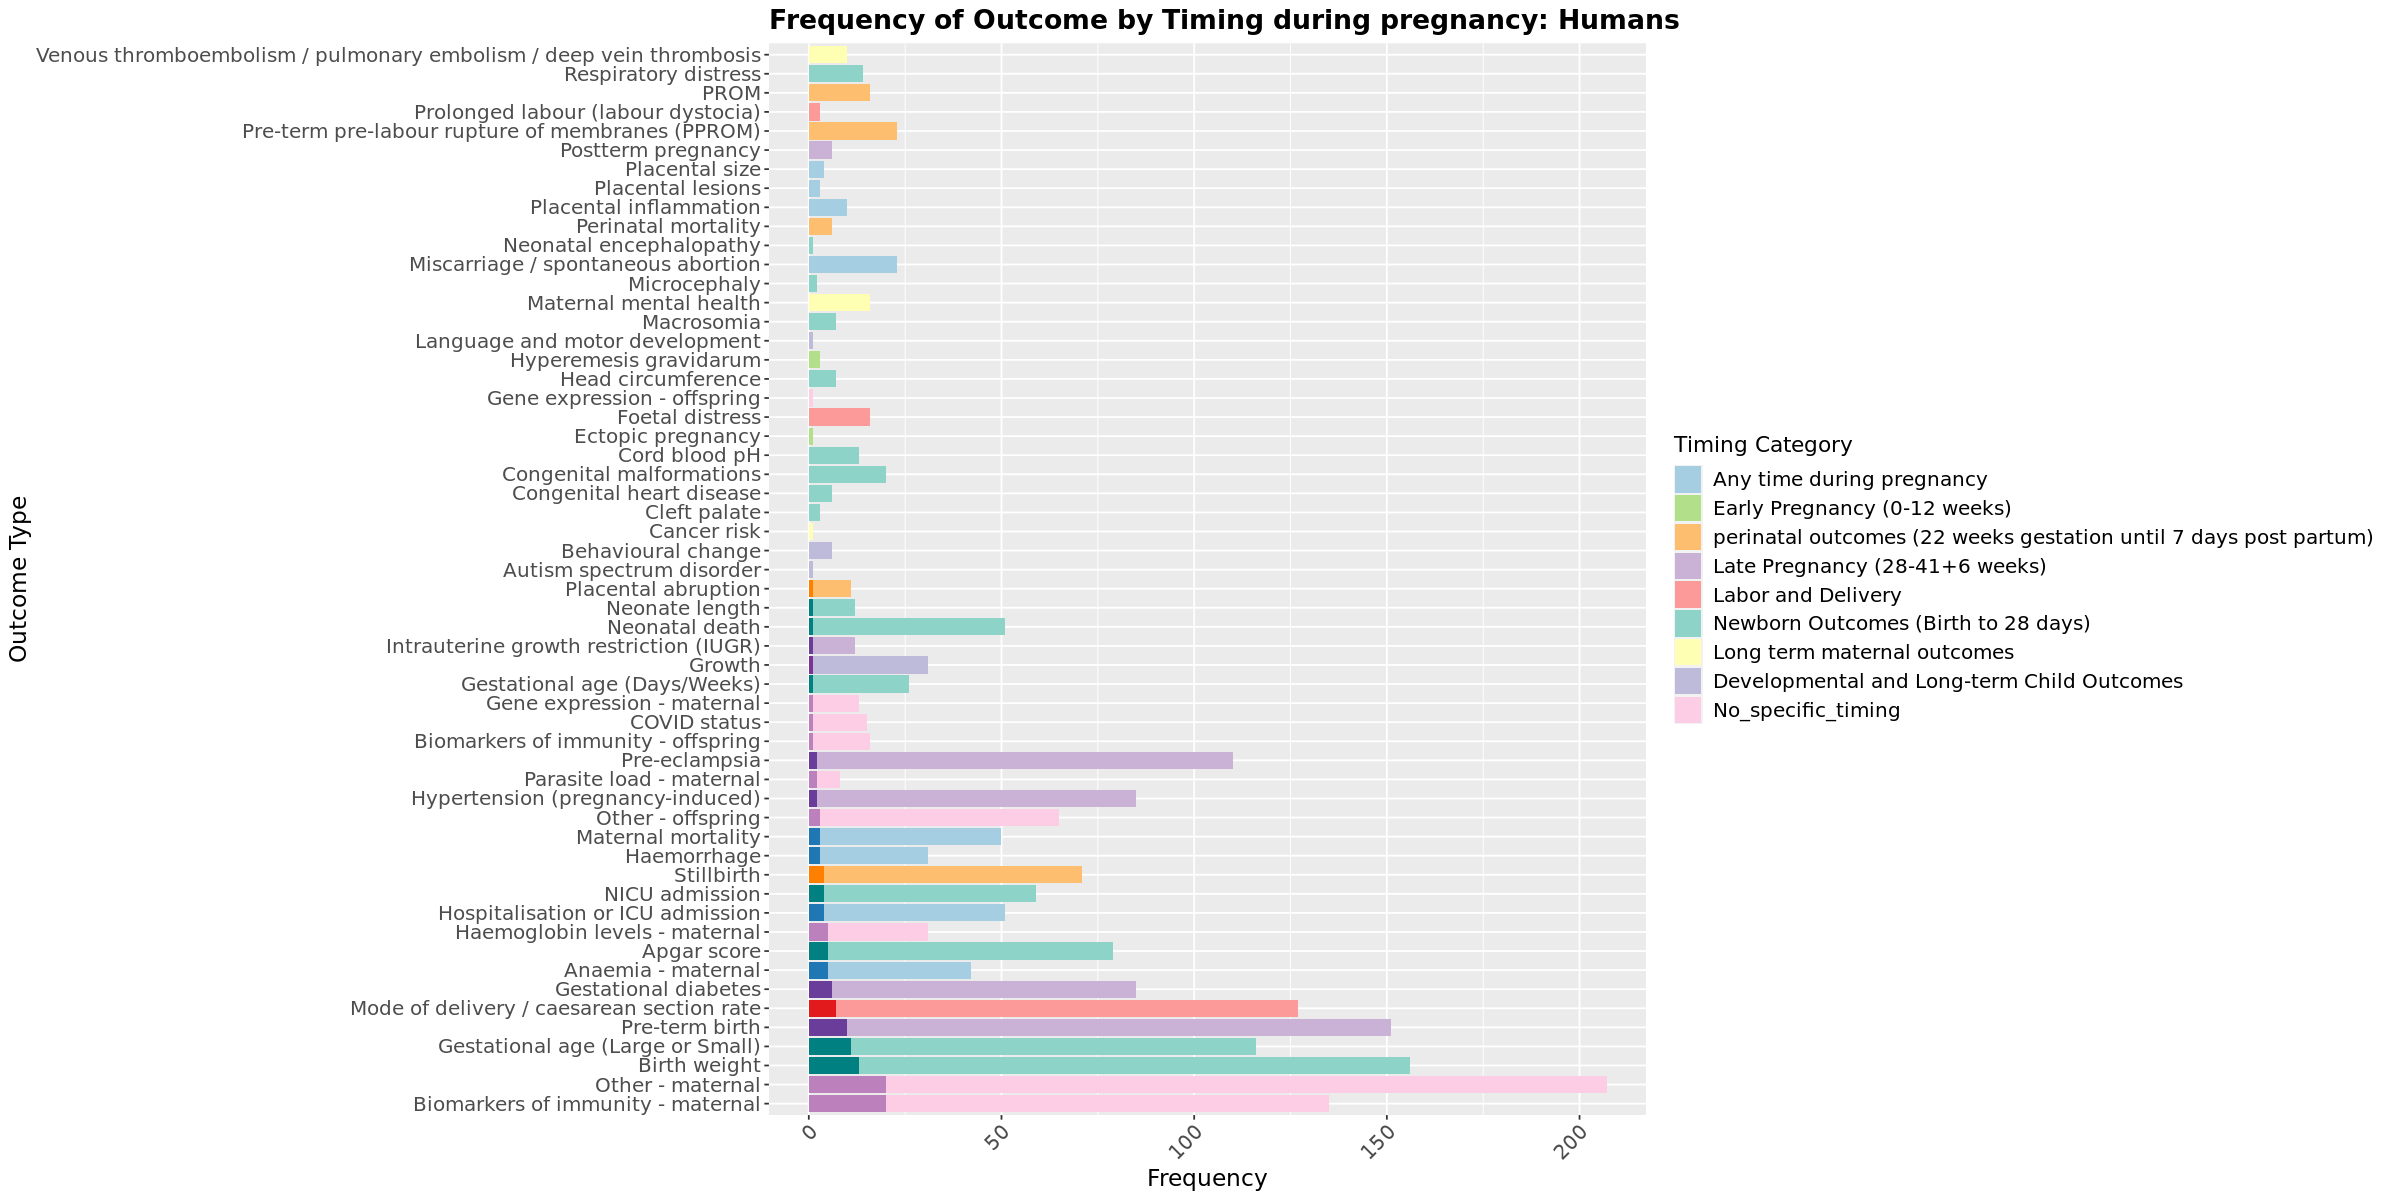

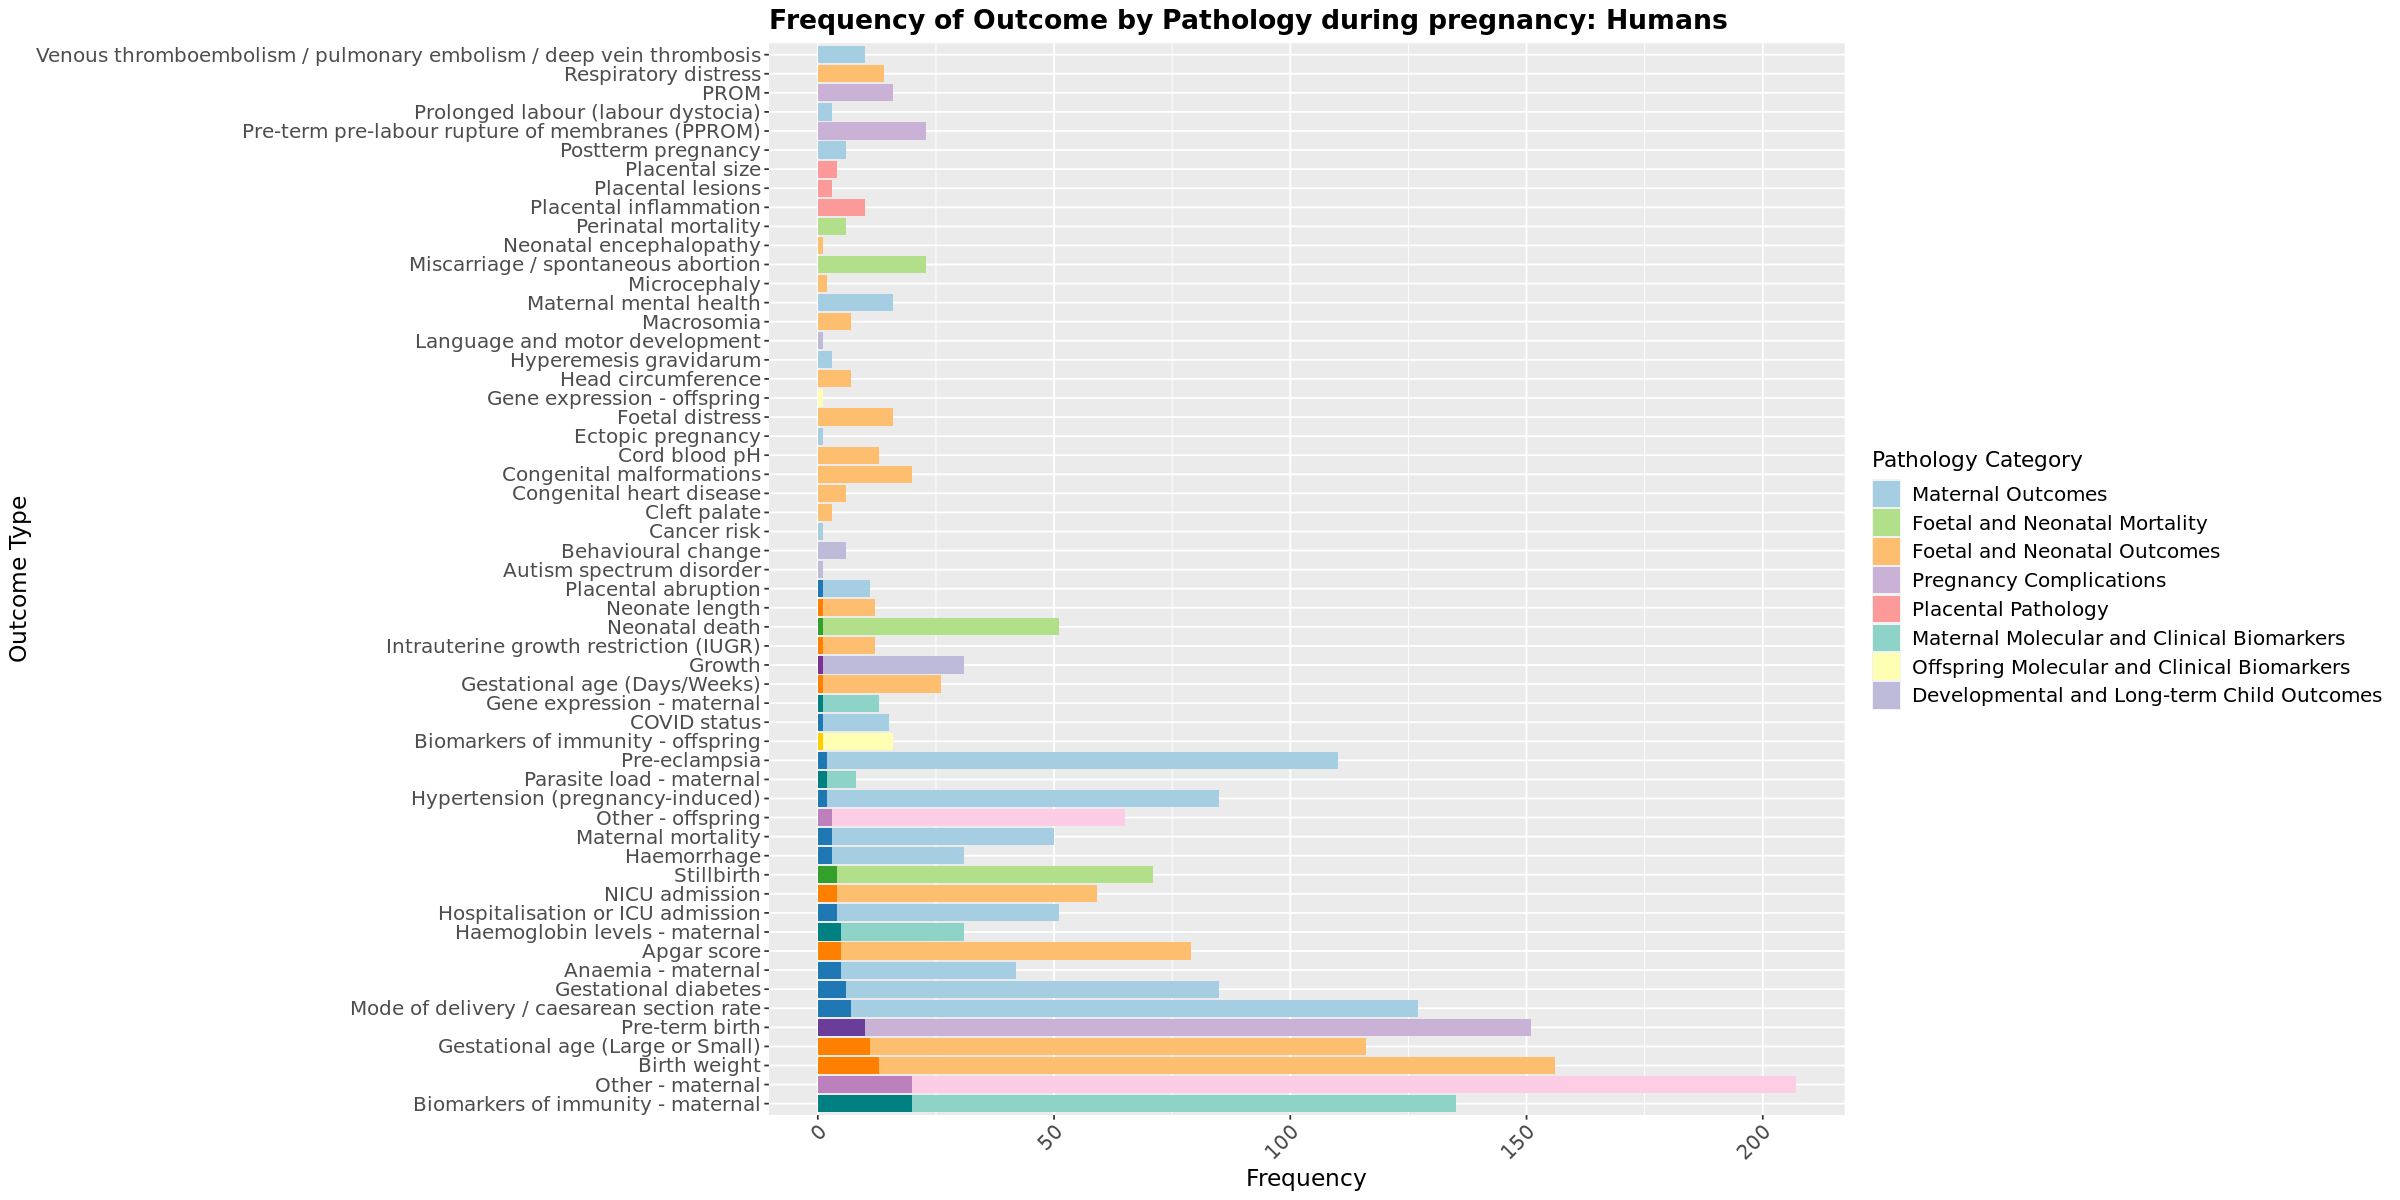

In [33]:
## Plot the Human Pregnancy Outcome frequency data

options(repr.plot.width = 20, repr.plot.height = 10)

# Step 1: Prepare the data
datMetaPregTime_human_cat <- datMetaPreg_human %>%
  filter(pregnancyOutcomeType != "") %>%
  mutate(
    studyScore_cat = ifelse(studyScore == "Type I", "Type I", "Other Types"),
    comboGroup = paste(OutTimeCat, studyScore_cat, sep = "_")
  ) %>%
  count(pregnancyOutcomeType, OutTimeCat, studyScore_cat, comboGroup)


datMetaPregPath_human_cat <- datMetaPreg_human %>%
  filter(pregnancyOutcomeType != "") %>%
  mutate(
    studyScore_cat = ifelse(studyScore == "Type I", "Type I", "Other Types"),
    comboGroup = paste(OutPathCat, studyScore_cat, sep = "_")
  ) %>%
  count(pregnancyOutcomeType, OutPathCat, studyScore_cat, comboGroup)

# Step 2: Create all combinations of pregnancyOutcomeType and studyScore_cat
all_combos_time <- expand.grid(
  pregnancyOutcomeType = unique(datMetaPregTime_human_cat$pregnancyOutcomeType),
  studyScore_cat = c("Other Types", "Type I")
)

all_combos_path <- expand.grid(
  pregnancyOutcomeType = unique(datMetaPregPath_human_cat$pregnancyOutcomeType),
  studyScore_cat = c("Other Types", "Type I")
)

# Add PregCat and comboGroup back in
all_combos_time <- datMetaPregTime_human_cat %>%
  select(pregnancyOutcomeType, OutTimeCat) %>%
  distinct() %>%
  right_join(all_combos_time, by = "pregnancyOutcomeType") %>%
  mutate(comboGroup = paste(OutTimeCat, studyScore_cat, sep = "_"))


all_combos_path <- datMetaPregPath_human_cat %>%
  select(pregnancyOutcomeType, OutPathCat) %>%
  distinct() %>%
  right_join(all_combos_path, by = "pregnancyOutcomeType") %>%
  mutate(comboGroup = paste(OutPathCat, studyScore_cat, sep = "_"))

# Step 3: Join with actual counts and fill missing with 0
dat_full_time <- all_combos_time %>%
  left_join(datMetaPregTime_human_cat, by = c("pregnancyOutcomeType", "OutTimeCat", "studyScore_cat", "comboGroup")) %>%
  mutate(n = replace_na(n, 0))


dat_full_path <- all_combos_path %>%
  left_join(datMetaPregPath_human_cat, by = c("pregnancyOutcomeType", "OutPathCat", "studyScore_cat", "comboGroup")) %>%
  mutate(n = replace_na(n, 0))

# Step 4: Order pregnancyOutcomeType by Type I counts
typeI_order_time <- dat_full_time %>%
  filter(studyScore_cat == "Type I") %>%
  arrange(desc(n)) %>%
  pull(pregnancyOutcomeType)


typeI_order_path <- dat_full_path %>%
  filter(studyScore_cat == "Type I") %>%
  arrange(desc(n)) %>%
  pull(pregnancyOutcomeType)

# Ensure all pregnancyOutcomeTypes are included
typeI_order_time <- unique(c(typeI_order_time, dat_full_time$pregnancyOutcomeType))
typeI_order_path <- unique(c(typeI_order_path, dat_full_path$pregnancyOutcomeType))

# Step 5: Apply factor levels
dat_full_time <- dat_full_time %>%
  mutate(
    pregnancyOutcomeType = factor(pregnancyOutcomeType, levels = typeI_order_time),
    studyScore_cat = factor(studyScore_cat, levels = c("Other Types", "Type I"))
  )

dat_full_path <- dat_full_path %>%
  mutate(
    pregnancyOutcomeType = factor(pregnancyOutcomeType, levels = typeI_order_path),
    studyScore_cat = factor(studyScore_cat, levels = c("Other Types", "Type I"))
  )

# Define custom colors for each Outcome-studyScore_cat combination
##TIME
custom_colors_time <- c(
  "Any time during pregnancy_Other Types"                             = "#a6cee3",  # light blue
  "Any time during pregnancy_Type I"                                  = "#1f78b4",  # dark blue
  "Early Pregnancy (0-12 weeks)_Other Types"                 = "#b2df8a",  # light green
  "Early Pregnancy (0-12 weeks)_Type I"                      = "#33a02c",  # dark green
  "perinatal outcomes (22 weeks gestation until 7 days post partum)_Other Types"                  = "#fdbf6f",  # light orange
  "perinatal outcomes (22 weeks gestation until 7 days post partum)_Type I"                       = "#ff7f00",  # dark orange
  "Late Pregnancy (28-41+6 weeks)_Other Types"                       = "#cab2d6",  # light purple
  "Late Pregnancy (28-41+6 weeks)_Type I"                            = "#6a3d9a",  # dark purple
  "Labor and Delivery_Other Types"                           = "#fb9a99",  # light pink
  "Labor and Delivery_Type I"                                = "#e31a1c",  # dark pink/red
  "Newborn Outcomes (Birth to 28 days)_Other Types"    = "#8dd3c7",  # light teal
  "Newborn Outcomes (Birth to 28 days)_Type I"         = "#008080",  # dark teal
  "Long term maternal outcomes_Other Types"   = "#ffffb3",  # light yellow
  "Long term maternal outcomes_Type I"        = "#ffcc00",  # dark yellow
  "Later Childhood Outcomes (After neonatal period)_Other Types"    = "#bebada",  # light lavender
  "Later Childhood Outcomes (After neonatal period)_Type I"         = "#7b3294",  # dark lavender
  "No_specific_timing_Other Types"                                         = "#fccde5",  # light rose
  "No_specific_timing_Type I"                                              = "#bc80bd"   # dark rose
)



# Define which groups you want to show in the legend
legend_labels_time <- c(
  "Any time during pregnancy_Other Types" = "Any time during pregnancy",
  "Early Pregnancy (0-12 weeks)_Other Types" = "Early Pregnancy (0-12 weeks)",
  "perinatal outcomes (22 weeks gestation until 7 days post partum)_Other Types" = "perinatal outcomes (22 weeks gestation until 7 days post partum)",
  "Late Pregnancy (28-41+6 weeks)_Other Types" = "Late Pregnancy (28-41+6 weeks)",
  "Labor and Delivery_Other Types" = "Labor and Delivery", 
  "Newborn Outcomes (Birth to 28 days)_Other Types" = "Newborn Outcomes (Birth to 28 days)", 
  "Long term maternal outcomes_Other Types" = "Long term maternal outcomes",
  "Later Childhood Outcomes (After neonatal period)_Other Types"  = "Developmental and Long-term Child Outcomes", 
  "No_specific_timing_Other Types" = "No_specific_timing"
)


##PATH
custom_colors_path <- c(
  "Maternal Outcomes_Other Types"                             = "#a6cee3",  # light blue
  "Maternal Outcomes_Type I"                                  = "#1f78b4",  # dark blue
  "Foetal and Neonatal Mortality_Other Types"                 = "#b2df8a",  # light green
  "Foetal and Neonatal Mortality_Type I"                      = "#33a02c",  # dark green
  "Foetal and Neonatal Outcomes_Other Types"                  = "#fdbf6f",  # light orange
  "Foetal and Neonatal Outcomes_Type I"                       = "#ff7f00",  # dark orange
  "Pregnancy Complications_Other Types"                       = "#cab2d6",  # light purple
  "Pregnancy Complications_Type I"                            = "#6a3d9a",  # dark purple
  "Placental Pathology_Other Types"                           = "#fb9a99",  # light pink
  "Placental Pathology_Type I"                                = "#e31a1c",  # dark pink/red
  "Maternal Molecular and Clinical Biomarkers_Other Types"    = "#8dd3c7",  # light teal
  "Maternal Molecular and Clinical Biomarkers_Type I"         = "#008080",  # dark teal
  "Offspring Molecular and Clinical Biomarkers_Other Types"   = "#ffffb3",  # light yellow
  "Offspring Molecular and Clinical Biomarkers_Type I"        = "#ffcc00",  # dark yellow
  "Developmental and Long-term Child Outcomes_Other Types"    = "#bebada",  # light lavender
  "Developmental and Long-term Child Outcomes_Type I"         = "#7b3294",  # dark lavender
  "Other_Other Types"                                         = "#fccde5",  # light rose
  "Other_Type I"                                              = "#bc80bd"   # dark rose
)



# Define which groups you want to show in the legend
legend_labels_path <- c(
  "Maternal Outcomes_Other Types" = "Maternal Outcomes",
  "Foetal and Neonatal Mortality_Other Types" = "Foetal and Neonatal Mortality",
  "Foetal and Neonatal Outcomes_Other Types" = "Foetal and Neonatal Outcomes",
  "Pregnancy Complications_Other Types" = "Pregnancy Complications",
  "Placental Pathology_Other Types" = "Placental Pathology", 
  "Maternal Molecular and Clinical Biomarkers_Other Types" = "Maternal Molecular and Clinical Biomarkers", 
  "Offspring Molecular and Clinical Biomarkers_Other Types" = "Offspring Molecular and Clinical Biomarkers",
  "Developmental and Long-term Child Outcomes_Other Types"  = "Developmental and Long-term Child Outcomes", 
  "Other - maternal_Other Types" = "Other - Maternal"
)





# Step 6: Plot
##TIME
ggplot(dat_full_time, aes(x = pregnancyOutcomeType, y = n, fill = comboGroup)) +
  coord_flip() +
  geom_bar(stat = "identity") +
  theme(
    axis.text.x = element_text(angle = 45, hjust = 1, size = 12),
    axis.text.y = element_text(size = 12),
    axis.title.x = element_text(size = 14),
    axis.title.y = element_text(size = 14),
    legend.text = element_text(size = 12),
    legend.title = element_text(size = 13),
    plot.title = element_text(size = 16, face = "bold")
  ) +
  labs(
    title = "Frequency of Outcome by Timing during pregnancy: Humans",
    x = "Outcome Type",
    y = "Frequency",
    fill = "Timing Category"
  ) +
  scale_fill_manual(
    values = custom_colors_time,
    breaks = names(legend_labels_time),
    labels = legend_labels_time
  )


##PATH
ggplot(dat_full_path, aes(x = pregnancyOutcomeType, y = n, fill = comboGroup)) +
  coord_flip() +
  geom_bar(stat = "identity") +
  theme(
    axis.text.x = element_text(angle = 45, hjust = 1, size = 12),
    axis.text.y = element_text(size = 12),
    axis.title.x = element_text(size = 14),
    axis.title.y = element_text(size = 14),
    legend.text = element_text(size = 12),
    legend.title = element_text(size = 13),
    plot.title = element_text(size = 16, face = "bold")
  ) +
  labs(
    title = "Frequency of Outcome by Pathology during pregnancy: Humans",
    x = "Outcome Type",
    y = "Frequency",
    fill = "Pathology Category"
  ) +
  scale_fill_manual(
    values = custom_colors_path,
    breaks = names(legend_labels_path),
    labels = legend_labels_path
  )

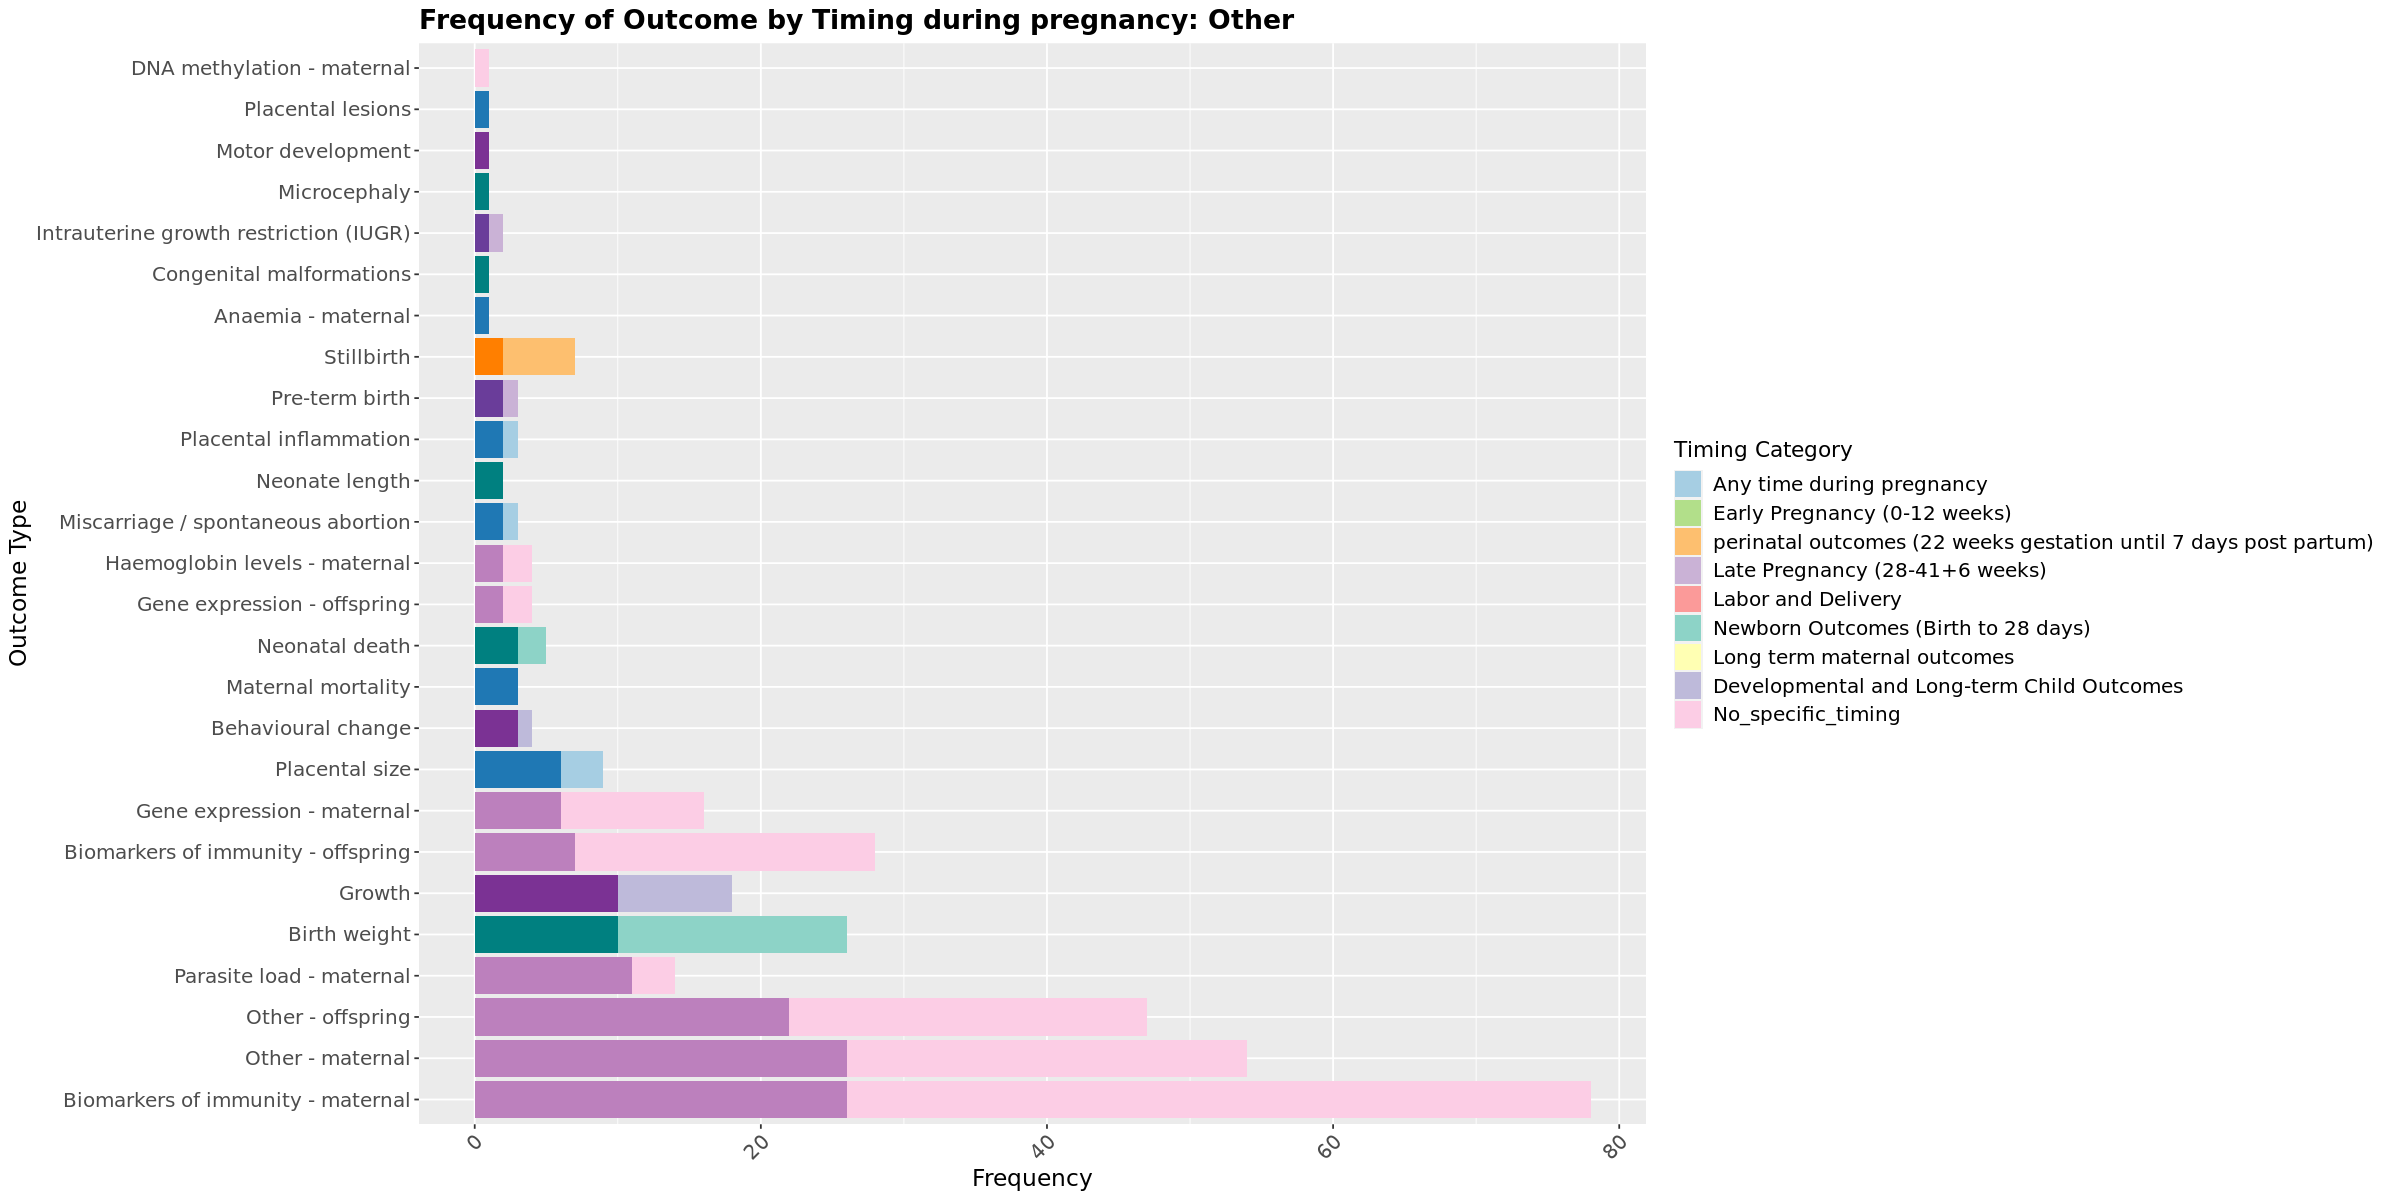

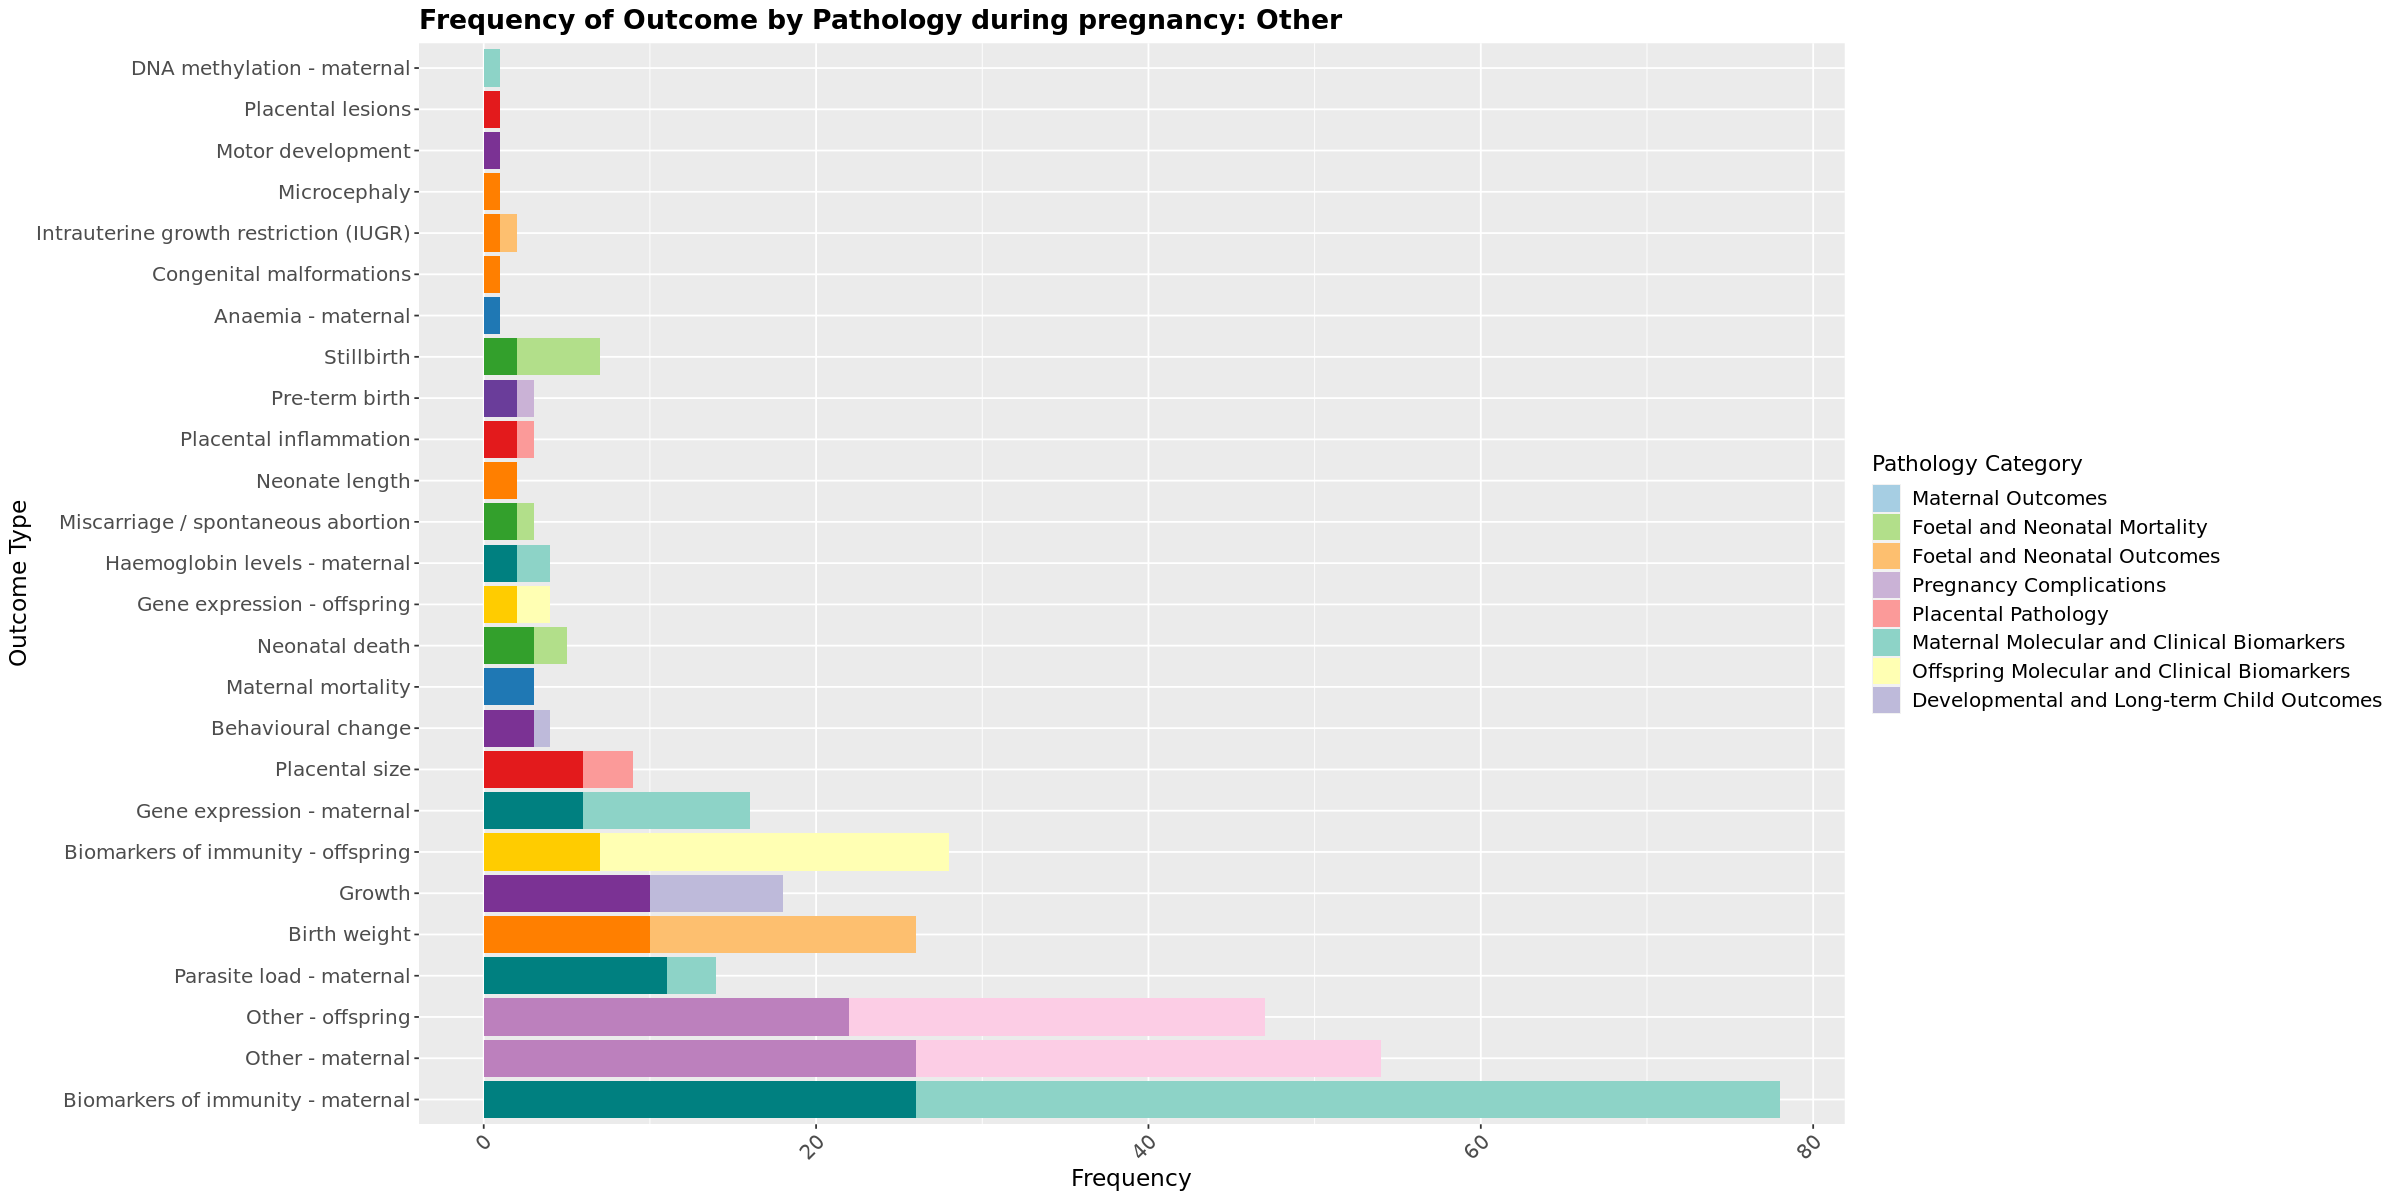

In [36]:
## Plot the Other Pregnancy Outcome frequency data

options(repr.plot.width = 20, repr.plot.height = 10)

# Step 1: Prepare the data
datMetaPregTime_other_cat <- datMetaPreg_other %>%
  filter(pregnancyOutcomeType != "") %>%
  mutate(
    studyScore_cat = ifelse(studyScore == "Type I", "Type I", "Other Types"),
    comboGroup = paste(OutTimeCat, studyScore_cat, sep = "_")
  ) %>%
  count(pregnancyOutcomeType, OutTimeCat, studyScore_cat, comboGroup)


datMetaPregPath_other_cat <- datMetaPreg_other %>%
  filter(pregnancyOutcomeType != "") %>%
  mutate(
    studyScore_cat = ifelse(studyScore == "Type I", "Type I", "Other Types"),
    comboGroup = paste(OutPathCat, studyScore_cat, sep = "_")
  ) %>%
  count(pregnancyOutcomeType, OutPathCat, studyScore_cat, comboGroup)

# Step 2: Create all combinations of pregnancyOutcomeType and studyScore_cat
all_combos_time <- expand.grid(
  pregnancyOutcomeType = unique(datMetaPregTime_other_cat$pregnancyOutcomeType),
  studyScore_cat = c("Other Types", "Type I")
)

all_combos_path <- expand.grid(
  pregnancyOutcomeType = unique(datMetaPregPath_other_cat$pregnancyOutcomeType),
  studyScore_cat = c("Other Types", "Type I")
)

# Add PregCat and comboGroup back in
all_combos_time <- datMetaPregTime_other_cat %>%
  select(pregnancyOutcomeType, OutTimeCat) %>%
  distinct() %>%
  right_join(all_combos_time, by = "pregnancyOutcomeType") %>%
  mutate(comboGroup = paste(OutTimeCat, studyScore_cat, sep = "_"))


all_combos_path <- datMetaPregPath_other_cat %>%
  select(pregnancyOutcomeType, OutPathCat) %>%
  distinct() %>%
  right_join(all_combos_path, by = "pregnancyOutcomeType") %>%
  mutate(comboGroup = paste(OutPathCat, studyScore_cat, sep = "_"))

# Step 3: Join with actual counts and fill missing with 0
dat_full_time <- all_combos_time %>%
  left_join(datMetaPregTime_other_cat, by = c("pregnancyOutcomeType", "OutTimeCat", "studyScore_cat", "comboGroup")) %>%
  mutate(n = replace_na(n, 0))


dat_full_path <- all_combos_path %>%
  left_join(datMetaPregPath_other_cat, by = c("pregnancyOutcomeType", "OutPathCat", "studyScore_cat", "comboGroup")) %>%
  mutate(n = replace_na(n, 0))

# Step 4: Order pregnancyOutcomeType by Type I counts
typeI_order_time <- dat_full_time %>%
  filter(studyScore_cat == "Type I") %>%
  arrange(desc(n)) %>%
  pull(pregnancyOutcomeType)


typeI_order_path <- dat_full_path %>%
  filter(studyScore_cat == "Type I") %>%
  arrange(desc(n)) %>%
  pull(pregnancyOutcomeType)

# Ensure all pregnancyOutcomeTypes are included
typeI_order_time <- unique(c(typeI_order_time, dat_full_time$pregnancyOutcomeType))
typeI_order_path <- unique(c(typeI_order_path, dat_full_path$pregnancyOutcomeType))

# Step 5: Apply factor levels
dat_full_time <- dat_full_time %>%
  mutate(
    pregnancyOutcomeType = factor(pregnancyOutcomeType, levels = typeI_order_time),
    studyScore_cat = factor(studyScore_cat, levels = c("Other Types", "Type I"))
  )

dat_full_path <- dat_full_path %>%
  mutate(
    pregnancyOutcomeType = factor(pregnancyOutcomeType, levels = typeI_order_path),
    studyScore_cat = factor(studyScore_cat, levels = c("Other Types", "Type I"))
  )

# Define custom colors for each Outcome-studyScore_cat combination
##TIME
custom_colors_time <- c(
  "Any time during pregnancy_Other Types"                             = "#a6cee3",  # light blue
  "Any time during pregnancy_Type I"                                  = "#1f78b4",  # dark blue
  "Early Pregnancy (0-12 weeks)_Other Types"                 = "#b2df8a",  # light green
  "Early Pregnancy (0-12 weeks)_Type I"                      = "#33a02c",  # dark green
  "perinatal outcomes (22 weeks gestation until 7 days post partum)_Other Types"                  = "#fdbf6f",  # light orange
  "perinatal outcomes (22 weeks gestation until 7 days post partum)_Type I"                       = "#ff7f00",  # dark orange
  "Late Pregnancy (28-41+6 weeks)_Other Types"                       = "#cab2d6",  # light purple
  "Late Pregnancy (28-41+6 weeks)_Type I"                            = "#6a3d9a",  # dark purple
  "Labor and Delivery_Other Types"                           = "#fb9a99",  # light pink
  "Labor and Delivery_Type I"                                = "#e31a1c",  # dark pink/red
  "Newborn Outcomes (Birth to 28 days)_Other Types"    = "#8dd3c7",  # light teal
  "Newborn Outcomes (Birth to 28 days)_Type I"         = "#008080",  # dark teal
  "Long term maternal outcomes_Other Types"   = "#ffffb3",  # light yellow
  "Long term maternal outcomes_Type I"        = "#ffcc00",  # dark yellow
  "Later Childhood Outcomes (After neonatal period)_Other Types"    = "#bebada",  # light lavender
  "Later Childhood Outcomes (After neonatal period)_Type I"         = "#7b3294",  # dark lavender
  "No_specific_timing_Other Types"                                         = "#fccde5",  # light rose
  "No_specific_timing_Type I"                                              = "#bc80bd"   # dark rose
)



# Define which groups you want to show in the legend
legend_labels_time <- c(
  "Any time during pregnancy_Other Types" = "Any time during pregnancy",
  "Early Pregnancy (0-12 weeks)_Other Types" = "Early Pregnancy (0-12 weeks)",
  "perinatal outcomes (22 weeks gestation until 7 days post partum)_Other Types" = "perinatal outcomes (22 weeks gestation until 7 days post partum)",
  "Late Pregnancy (28-41+6 weeks)_Other Types" = "Late Pregnancy (28-41+6 weeks)",
  "Labor and Delivery_Other Types" = "Labor and Delivery", 
  "Newborn Outcomes (Birth to 28 days)_Other Types" = "Newborn Outcomes (Birth to 28 days)", 
  "Long term maternal outcomes_Other Types" = "Long term maternal outcomes",
  "Later Childhood Outcomes (After neonatal period)_Other Types"  = "Developmental and Long-term Child Outcomes", 
  "No_specific_timing_Other Types" = "No_specific_timing"
)


##PATH
custom_colors_path <- c(
  "Maternal Outcomes_Other Types"                             = "#a6cee3",  # light blue
  "Maternal Outcomes_Type I"                                  = "#1f78b4",  # dark blue
  "Foetal and Neonatal Mortality_Other Types"                 = "#b2df8a",  # light green
  "Foetal and Neonatal Mortality_Type I"                      = "#33a02c",  # dark green
  "Foetal and Neonatal Outcomes_Other Types"                  = "#fdbf6f",  # light orange
  "Foetal and Neonatal Outcomes_Type I"                       = "#ff7f00",  # dark orange
  "Pregnancy Complications_Other Types"                       = "#cab2d6",  # light purple
  "Pregnancy Complications_Type I"                            = "#6a3d9a",  # dark purple
  "Placental Pathology_Other Types"                           = "#fb9a99",  # light pink
  "Placental Pathology_Type I"                                = "#e31a1c",  # dark pink/red
  "Maternal Molecular and Clinical Biomarkers_Other Types"    = "#8dd3c7",  # light teal
  "Maternal Molecular and Clinical Biomarkers_Type I"         = "#008080",  # dark teal
  "Offspring Molecular and Clinical Biomarkers_Other Types"   = "#ffffb3",  # light yellow
  "Offspring Molecular and Clinical Biomarkers_Type I"        = "#ffcc00",  # dark yellow
  "Developmental and Long-term Child Outcomes_Other Types"    = "#bebada",  # light lavender
  "Developmental and Long-term Child Outcomes_Type I"         = "#7b3294",  # dark lavender
  "Other_Other Types"                                         = "#fccde5",  # light rose
  "Other_Type I"                                              = "#bc80bd"   # dark rose
)



# Define which groups you want to show in the legend
legend_labels_path <- c(
  "Maternal Outcomes_Other Types" = "Maternal Outcomes",
  "Foetal and Neonatal Mortality_Other Types" = "Foetal and Neonatal Mortality",
  "Foetal and Neonatal Outcomes_Other Types" = "Foetal and Neonatal Outcomes",
  "Pregnancy Complications_Other Types" = "Pregnancy Complications",
  "Placental Pathology_Other Types" = "Placental Pathology", 
  "Maternal Molecular and Clinical Biomarkers_Other Types" = "Maternal Molecular and Clinical Biomarkers", 
  "Offspring Molecular and Clinical Biomarkers_Other Types" = "Offspring Molecular and Clinical Biomarkers",
  "Developmental and Long-term Child Outcomes_Other Types"  = "Developmental and Long-term Child Outcomes", 
  "Other - maternal_Other Types" = "Other - Maternal"
)





# Step 6: Plot
##TIME
ggplot(dat_full_time, aes(x = pregnancyOutcomeType, y = n, fill = comboGroup)) +
  coord_flip() +
  geom_bar(stat = "identity") +
  theme(
    axis.text.x = element_text(angle = 45, hjust = 1, size = 12),
    axis.text.y = element_text(size = 12),
    axis.title.x = element_text(size = 14),
    axis.title.y = element_text(size = 14),
    legend.text = element_text(size = 12),
    legend.title = element_text(size = 13),
    plot.title = element_text(size = 16, face = "bold")
  ) +
  labs(
    title = "Frequency of Outcome by Timing during pregnancy: Other",
    x = "Outcome Type",
    y = "Frequency",
    fill = "Timing Category"
  ) +
  scale_fill_manual(
    values = custom_colors_time,
    breaks = names(legend_labels_time),
    labels = legend_labels_time
  )


##PATH
ggplot(dat_full_path, aes(x = pregnancyOutcomeType, y = n, fill = comboGroup)) +
  coord_flip() +
  geom_bar(stat = "identity") +
  theme(
    axis.text.x = element_text(angle = 45, hjust = 1, size = 12),
    axis.text.y = element_text(size = 12),
    axis.title.x = element_text(size = 14),
    axis.title.y = element_text(size = 14),
    legend.text = element_text(size = 12),
    legend.title = element_text(size = 13),
    plot.title = element_text(size = 16, face = "bold")
  ) +
  labs(
    title = "Frequency of Outcome by Pathology during pregnancy: Other",
    x = "Outcome Type",
    y = "Frequency",
    fill = "Pathology Category"
  ) +
  scale_fill_manual(
    values = custom_colors_path,
    breaks = names(legend_labels_path),
    labels = legend_labels_path
  )

### Frequency plots of terms across time. 

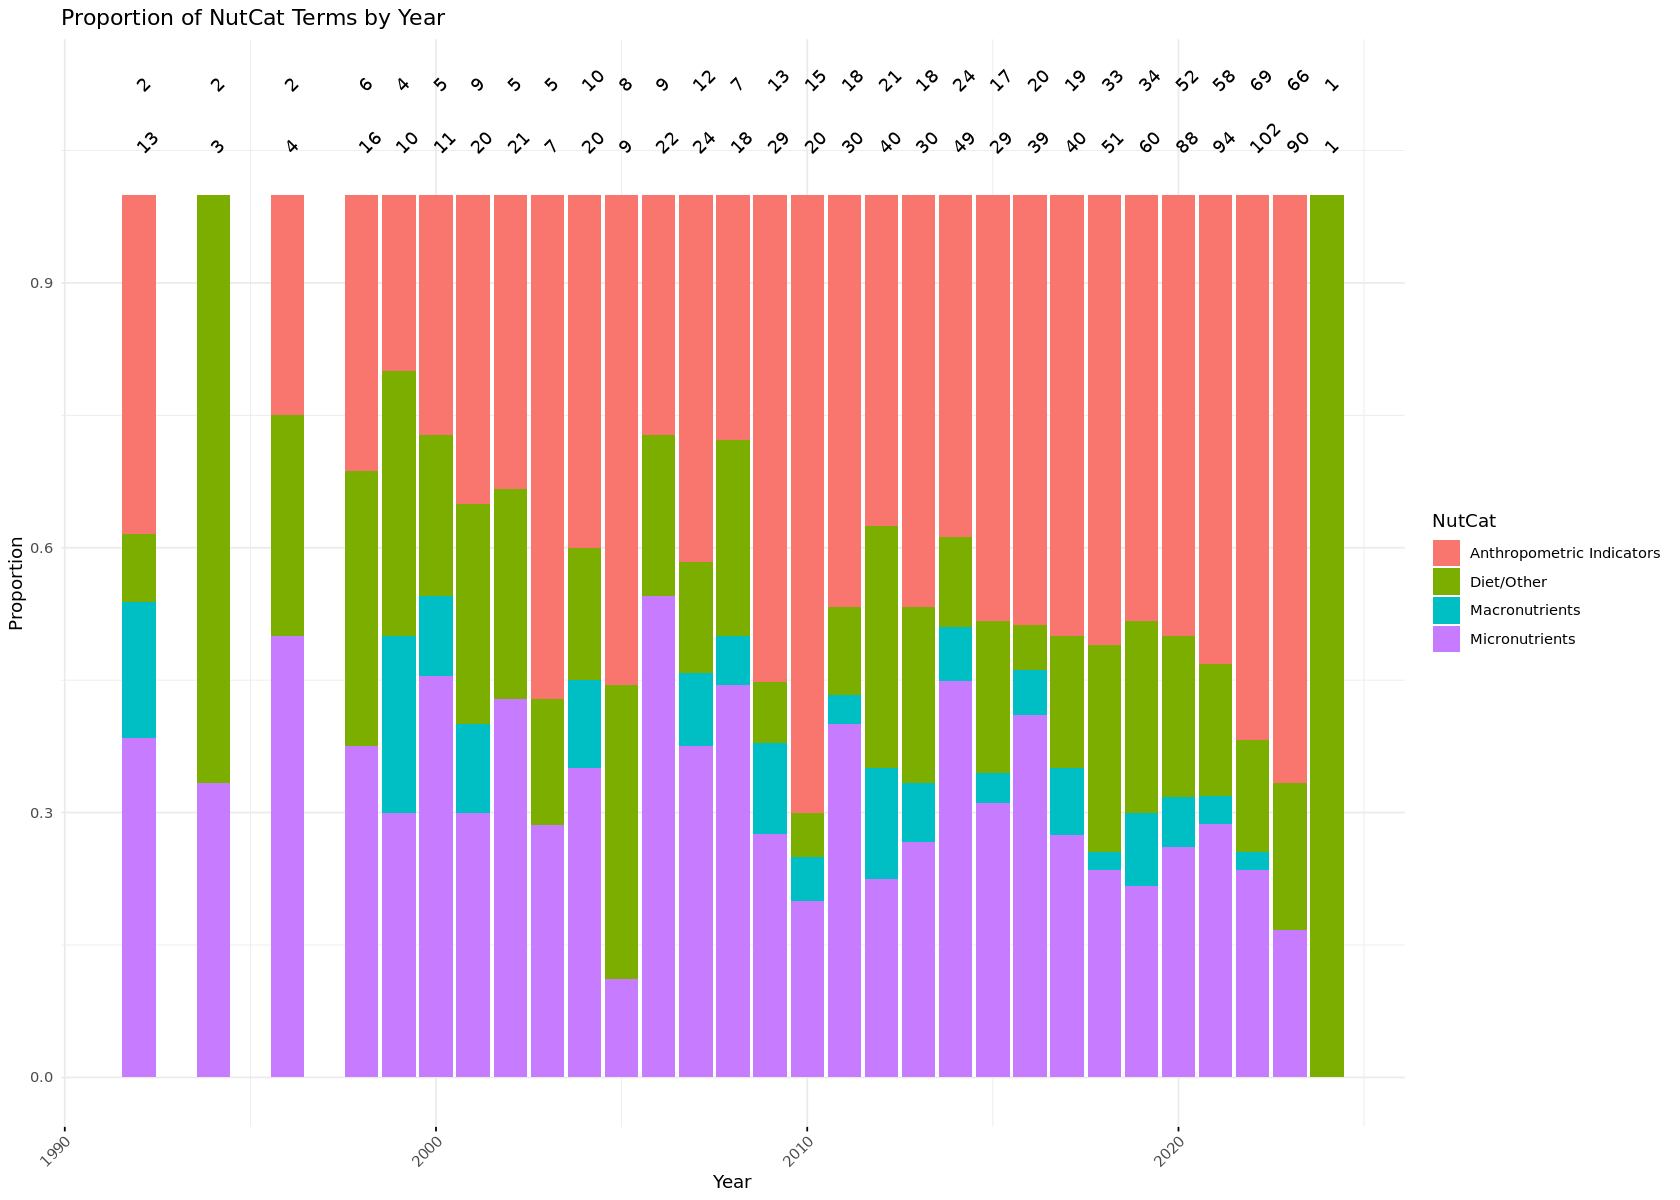

In [38]:

options(repr.plot.width = 14, repr.plot.height = 10)


#Count the number of NutCat entries per year and compute proportions
nutcat_counts <- datMetaNut %>%
  group_by(year, NutCat) %>%
  summarise(count = n(), .groups = 'drop') %>%
  group_by(year) %>%
  mutate(proportion = count / sum(count)) %>%
  ungroup()



# Total number of records per year
total_counts <- datMetaNut %>%
  group_by(year) %>%
  summarise(total = n(), .groups = 'drop')


# Unique firstAuthor count per year
unique_authors <- datMetaNut %>%
  group_by(year) %>%
  summarise(unique_authors = n_distinct(firstAuthor), .groups = 'drop')

# Merge both for labeling
label_data <- left_join(total_counts, unique_authors, by = "year")

# Create the stacked bar plot
ggplot(nutcat_counts, aes(x = year, y = proportion, fill = NutCat)) +
  geom_bar(stat = "identity") +
  # First label: total count
  geom_text(data = label_data, aes(x = year, y = 1.05, label = total), inherit.aes = FALSE, angle = 45, hjust = 0) +
  # Second label: unique authors, slightly higher
  geom_text(data = label_data, aes(x = year, y = 1.12, label = unique_authors), inherit.aes = FALSE, angle = 45, hjust = 0) +
  labs(
    title = "Proportion of NutCat Terms by Year",
    x = "Year",
    y = "Proportion",
    fill = "NutCat"
  ) +
  theme_minimal() +
  theme(
    axis.text.x = element_text(angle = 45, hjust = 1),
    axis.ticks.x = element_line()
  )



   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   1992    2011    2017    2015    2021    2024 

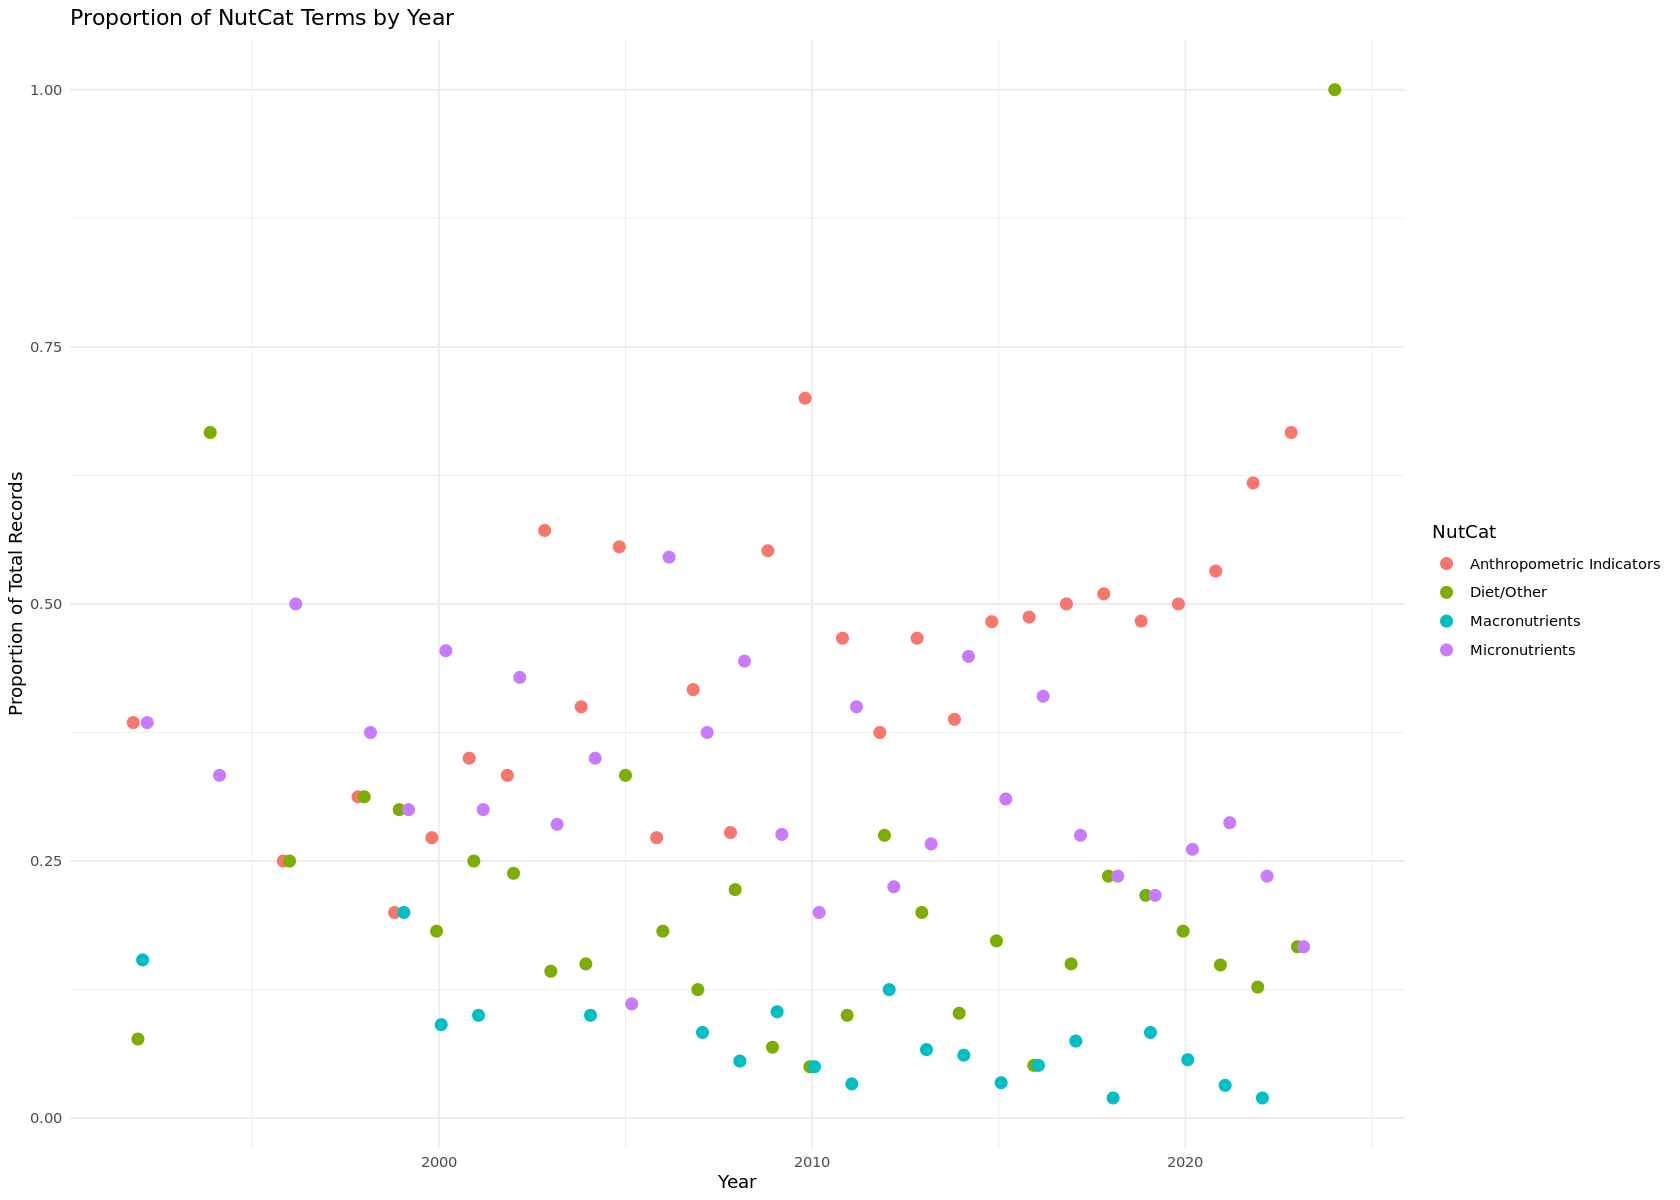

In [39]:
## Frequency plot of Nut terms as a dot plot (not corrected for number of papers per year)

options(repr.plot.width = 14, repr.plot.height = 10)

# Use of different terms/types over time for each dataset
summary(datMetaNut$year)

# Count the number of NutCat entries per year
nutcat_counts <- datMetaNut %>%
  group_by(year, NutCat) %>%
  summarise(count = n(), .groups = 'drop')

# Unique firstAuthor count per year
unique_authors <- datMetaNut %>%
  group_by(year) %>%
  summarise(unique_authors = n_distinct(firstAuthor), .groups = 'drop')



# Merge to compute proportion
nutcat_counts <- left_join(nutcat_counts, total_counts, by = "year") %>%
  mutate(proportion = count / total)

# Create the dot plot
ggplot(nutcat_counts, aes(x = year, y = proportion, color = NutCat)) +
  geom_point(size = 3, position = position_dodge(width = 0.5)) +
  labs(
    title = "Proportion of NutCat Terms by Year",
    x = "Year",
    y = "Proportion of Total Records",
    color = "NutCat"
  ) +
  theme_minimal()



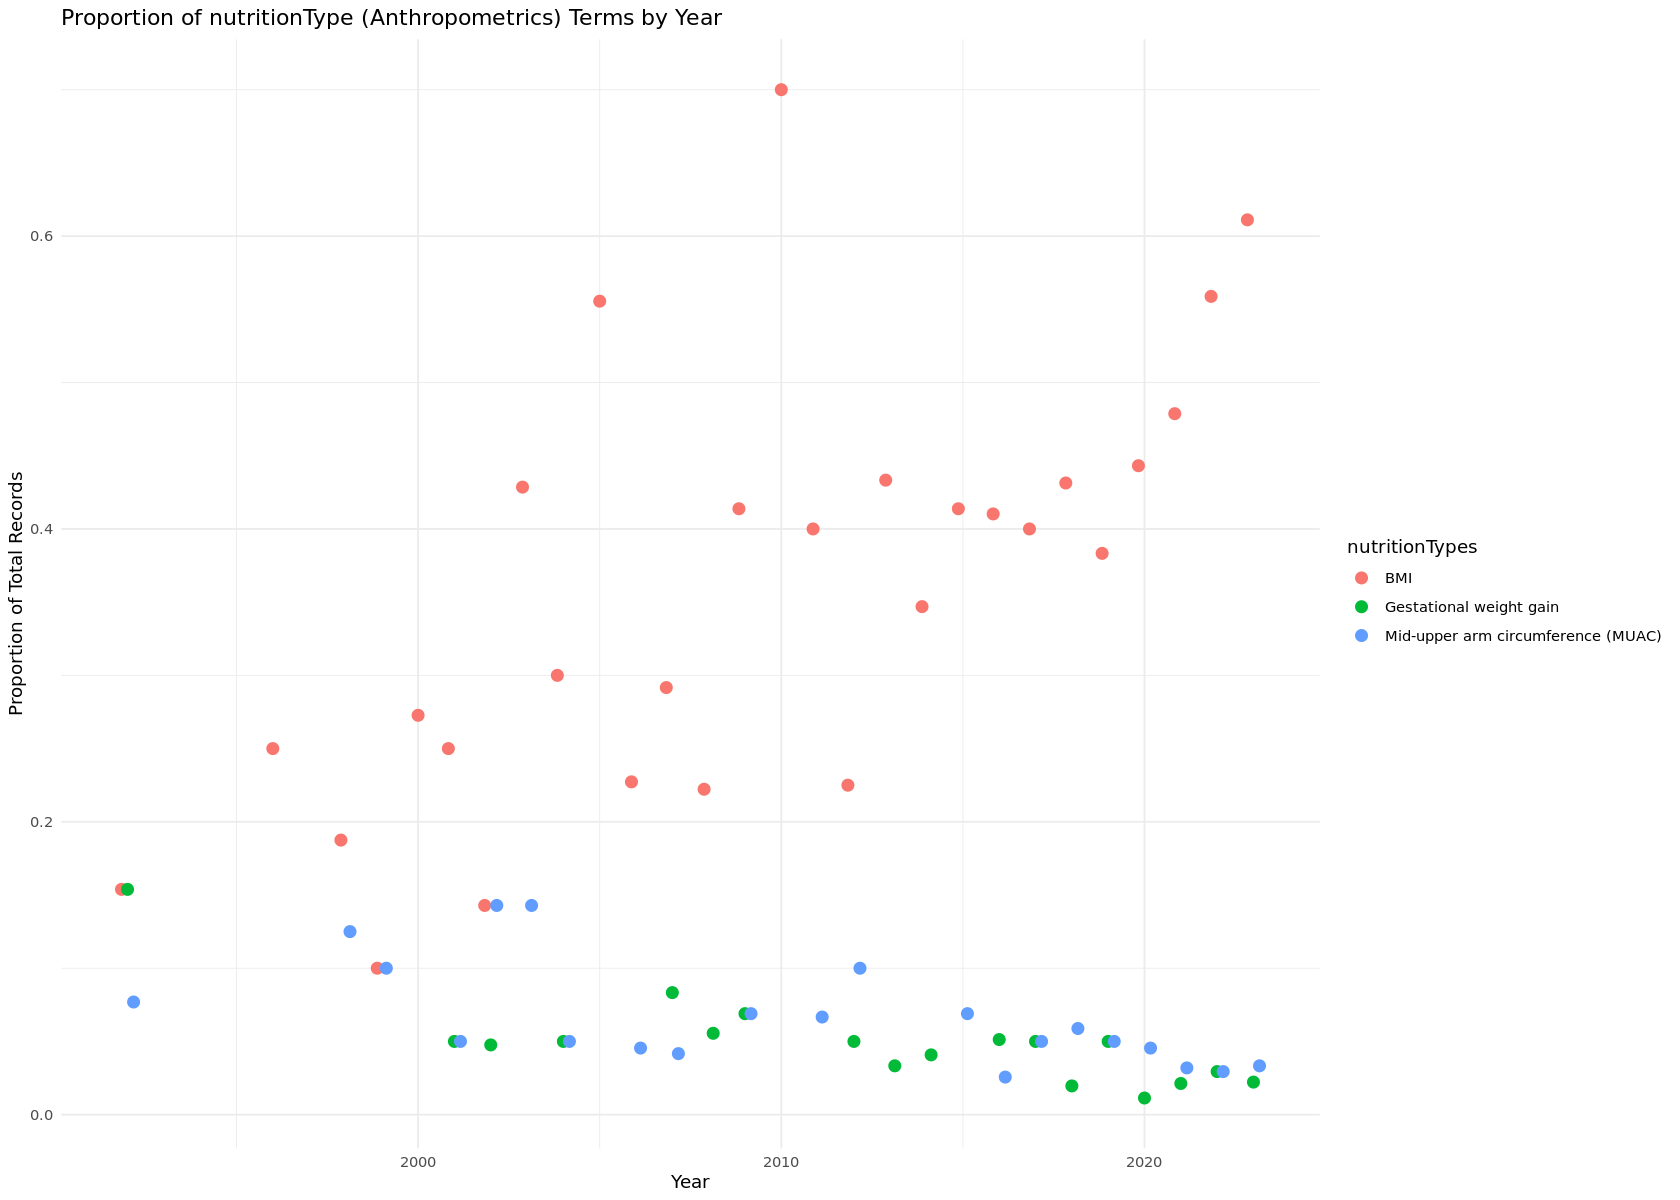

In [40]:
# Is this driven by a new Anthropometric measurement? 

filtered_df <- datMetaNut %>% filter(NutCat == "Anthropometric Indicators")


# Count the number of nutritionType entries per year
nutcat_counts <- filtered_df %>%
  group_by(year, nutritionType) %>%
  summarise(count = n(), .groups = 'drop')


# Merge to compute proportion
nutcat_counts <- left_join(nutcat_counts, total_counts, by = "year") %>%
  mutate(proportion = count / total)

# Create the dot plot
ggplot(nutcat_counts, aes(x = year, y = proportion, color = nutritionType)) +
  geom_point(size = 3, position = position_dodge(width = 0.5)) +
  labs(
    title = "Proportion of nutritionType (Anthropometrics) Terms by Year",
    x = "Year",
    y = "Proportion of Total Records",
    color = "nutritionTypes"
  ) +
  theme_minimal()


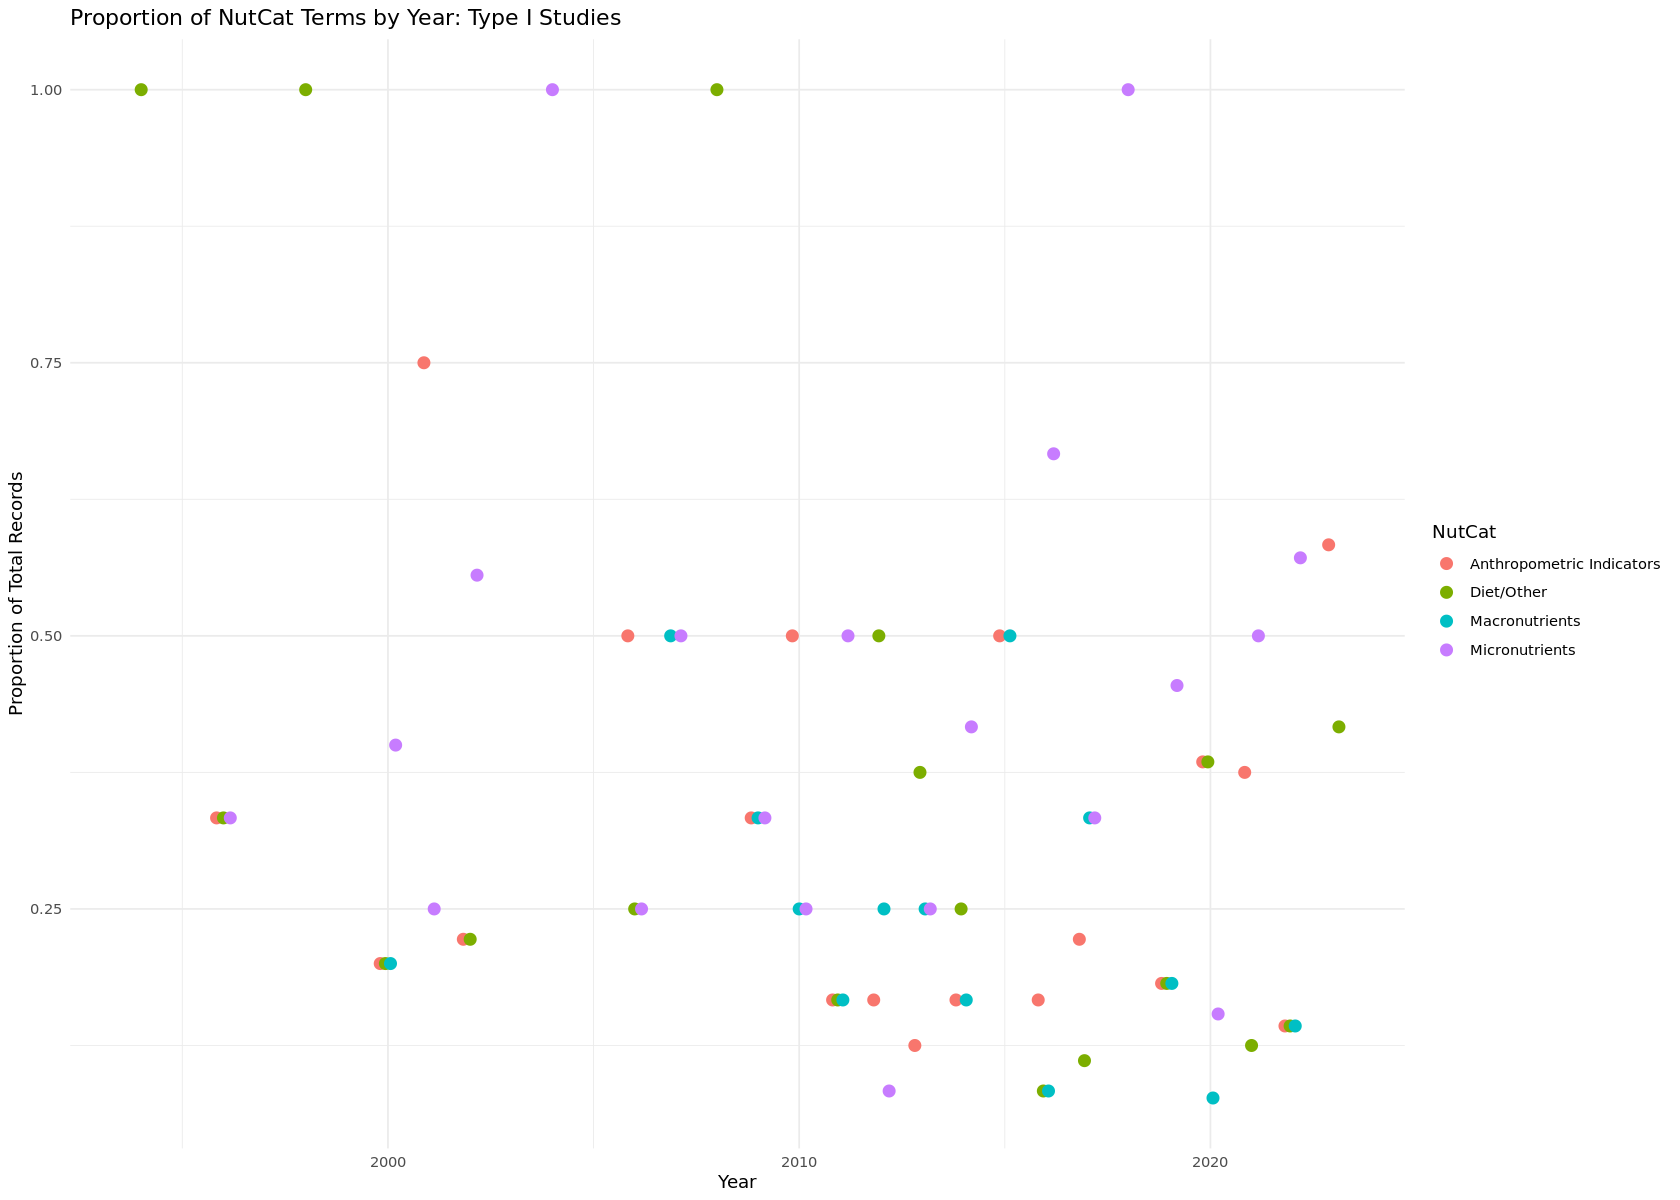

In [41]:
# Does this trend hold for Type I studies?

# Filter for Type I studies
filtered_df <- datMetaNut %>% filter(studyScore == "Type I")

# Count the number of NutCat entries per year
nutcat_counts <- filtered_df %>%
  group_by(year, NutCat) %>%
  summarise(count = n(), .groups = 'drop')

# Total number of records per year (from filtered_df)
total_counts <- filtered_df %>%
  group_by(year) %>%
  summarise(total = n(), .groups = 'drop')

# Merge to compute proportion
nutcat_counts <- left_join(nutcat_counts, total_counts, by = "year") %>%
  mutate(proportion = count / total)

# Create the dot plot
ggplot(nutcat_counts, aes(x = year, y = proportion, color = NutCat)) +
  geom_point(size = 3, position = position_dodge(width = 0.5)) +
  labs(
    title = "Proportion of NutCat Terms by Year: Type I Studies",
    x = "Year",
    y = "Proportion of Total Records",
    color = "NutCat"
  ) +
  theme_minimal()





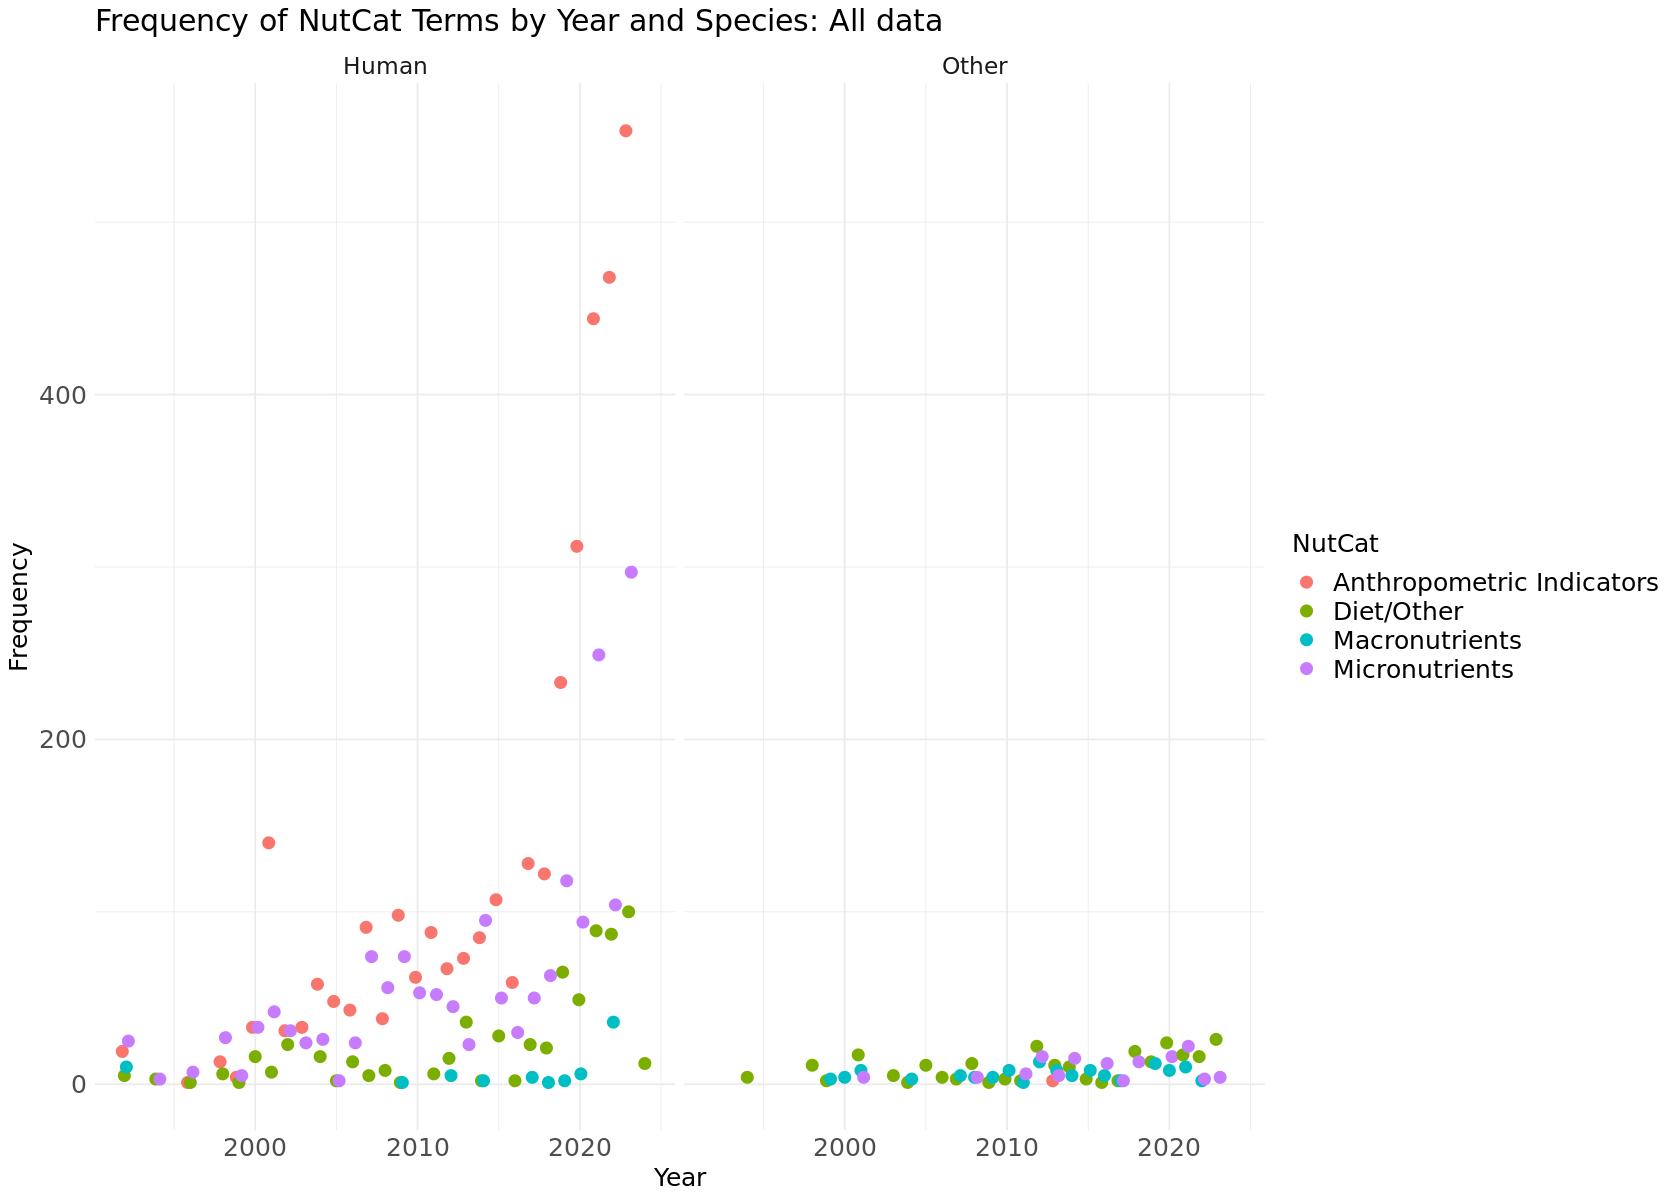

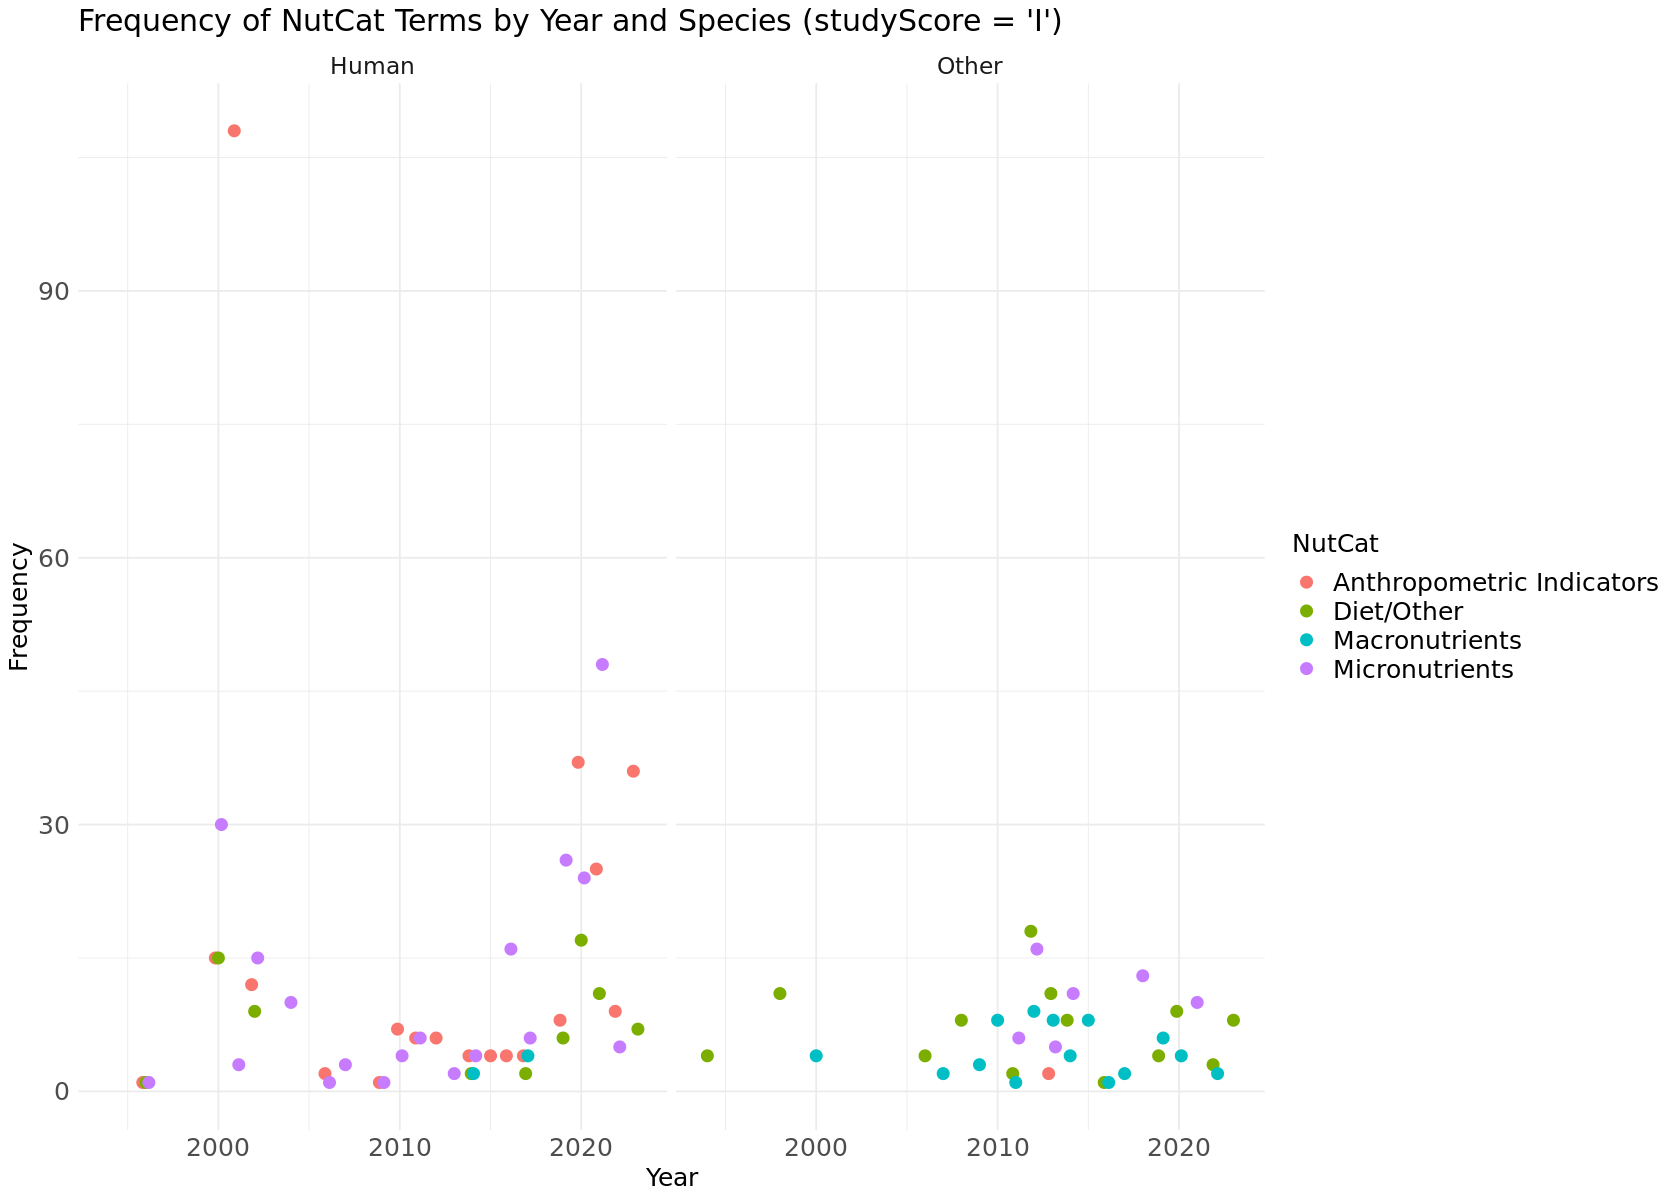

In [42]:
# Is this true for Human and Other?

options(repr.plot.width = 14, repr.plot.height = 10)


# Count NutCat entries per year and species
nutcat_counts <- datMetaNutInfPreg %>%
  group_by(year, NutCat, speciesCat) %>%
  summarise(count = n(), .groups = 'drop')

# Create the dot plot with facets for speciesCat
ggplot(nutcat_counts, aes(x = year, y = count, color = NutCat)) +
  geom_point(size = 3, position = position_dodge(width = 0.5)) +
  facet_wrap(~ speciesCat) +
  labs(
    title = "Frequency of NutCat Terms by Year and Species: All data",
    x = "Year",
    y = "Frequency",
    color = "NutCat"
  ) +
  theme_minimal() +
    theme(
    plot.title = element_text(size = 18), # Title text size
    axis.title = element_text(size = 15), # Axis titles
    axis.text = element_text(size = 15), # Axis tick labels
    legend.title = element_text(size = 15), # Legend title
    legend.text = element_text(size = 15), # Legend labels
    strip.text = element_text(size = 14) # Facet labels
    )




# Filter for studyScore == "I" and count NutCat entries per year and species
nutcat_counts_I <- datMetaNutInfPreg %>%
  filter(studyScore == "I") %>%
  group_by(year, NutCat, speciesCat) %>%
  summarise(count = n(), .groups = 'drop')

# Create the dot plot with facets for speciesCat
ggplot(nutcat_counts_I, aes(x = year, y = count, color = NutCat)) +
  geom_point(size = 3, position = position_dodge(width = 0.5)) +
  facet_wrap(~ speciesCat) +
  labs(
    title = "Frequency of NutCat Terms by Year and Species (studyScore = 'I')",
    x = "Year",
    y = "Frequency",
    color = "NutCat"
  ) +
  theme_minimal() +
    theme(
    plot.title = element_text(size = 18), # Title text size
    axis.title = element_text(size = 15), # Axis titles
    axis.text = element_text(size = 15), # Axis tick labels
    legend.title = element_text(size = 15), # Legend title
    legend.text = element_text(size = 15), # Legend labels
    strip.text = element_text(size = 14) # Facet labels
    )



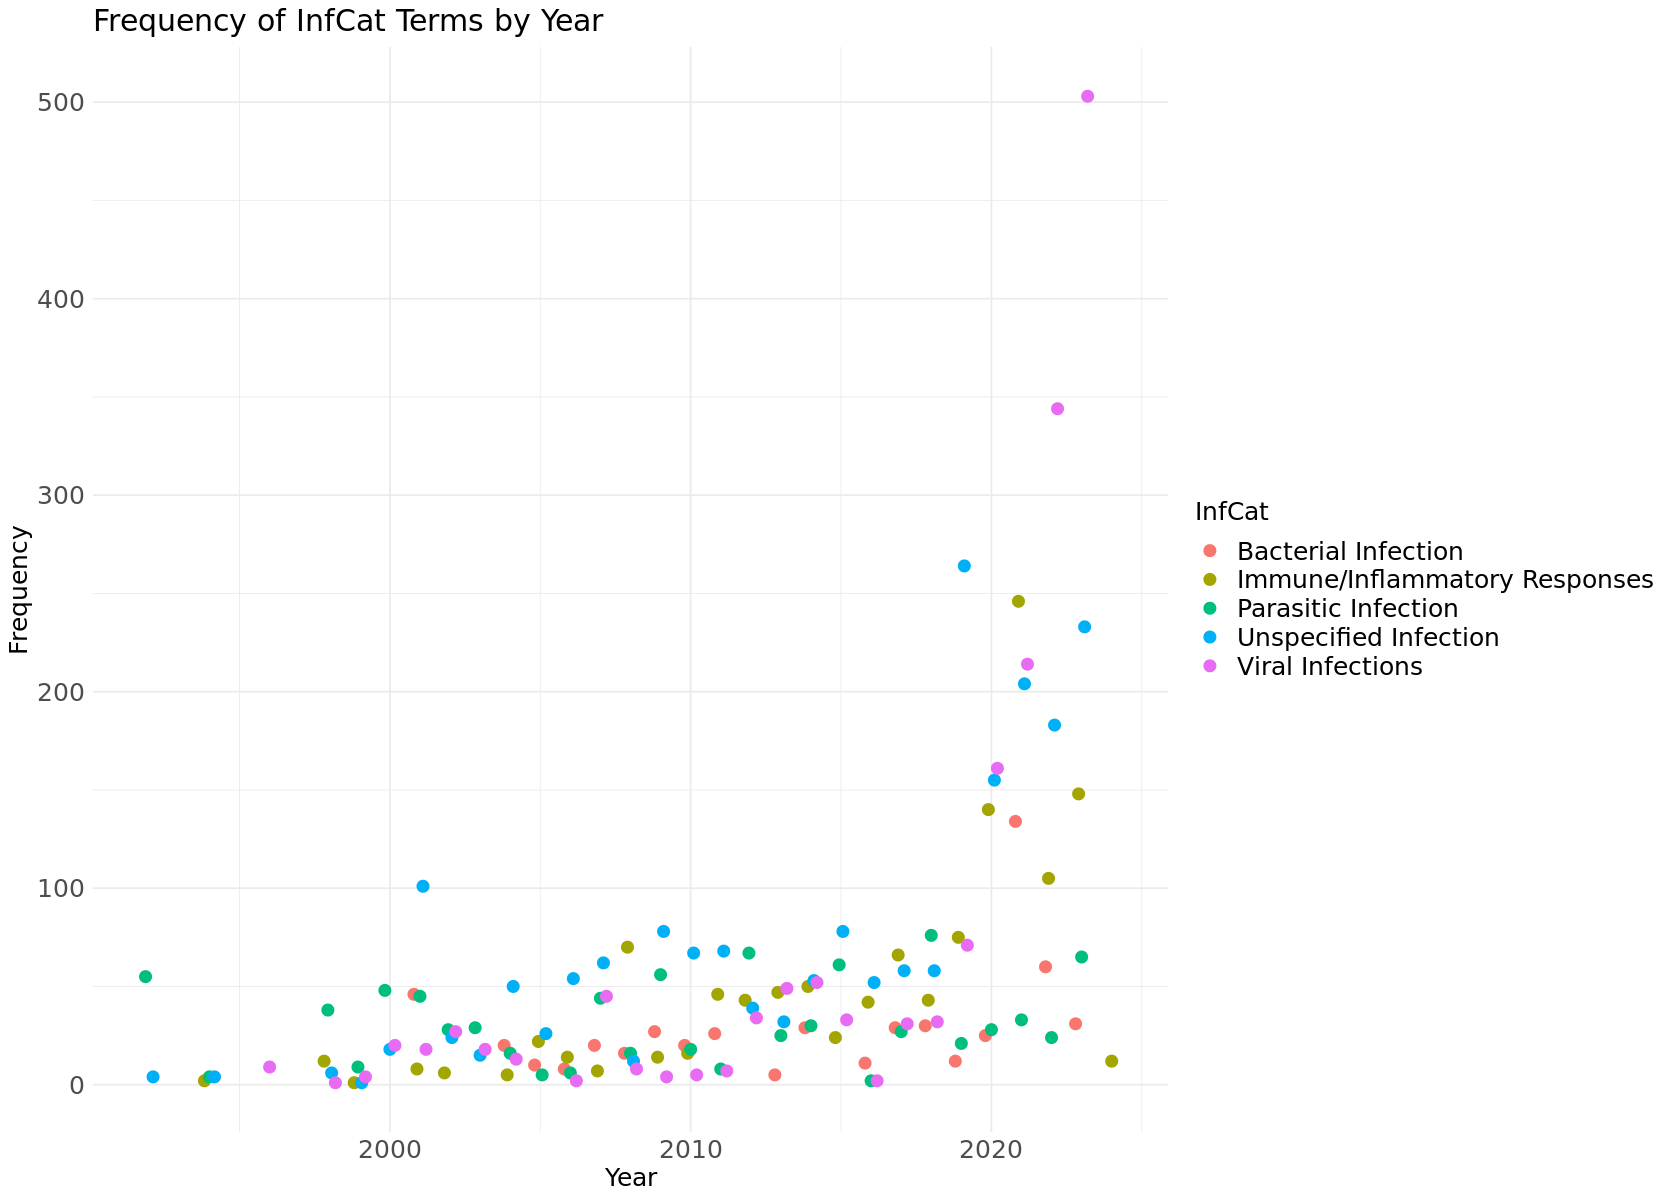

In [43]:
# Infection

options(repr.plot.width = 14, repr.plot.height = 10)

# Count the number of InfCat entries per year
infcat_counts <- datMetaNutInfPreg %>%
  group_by(year, InfCat) %>%
  summarise(count = n(), .groups = 'drop')

# Create the dot plot
ggplot(infcat_counts, aes(x = year, y = count, color = InfCat)) +
  geom_point(size = 3, position = position_dodge(width = 0.5)) +
  labs(
    title = "Frequency of InfCat Terms by Year",
    x = "Year",
    y = "Frequency",
    color = "InfCat"
  ) +
  theme_minimal() +
    theme(
    plot.title = element_text(size = 18), # Title text size
    axis.title = element_text(size = 15), # Axis titles
    axis.text = element_text(size = 15), # Axis tick labels
    legend.title = element_text(size = 15), # Legend title
    legend.text = element_text(size = 15), # Legend labels
    strip.text = element_text(size = 14) # Facet labels
    )


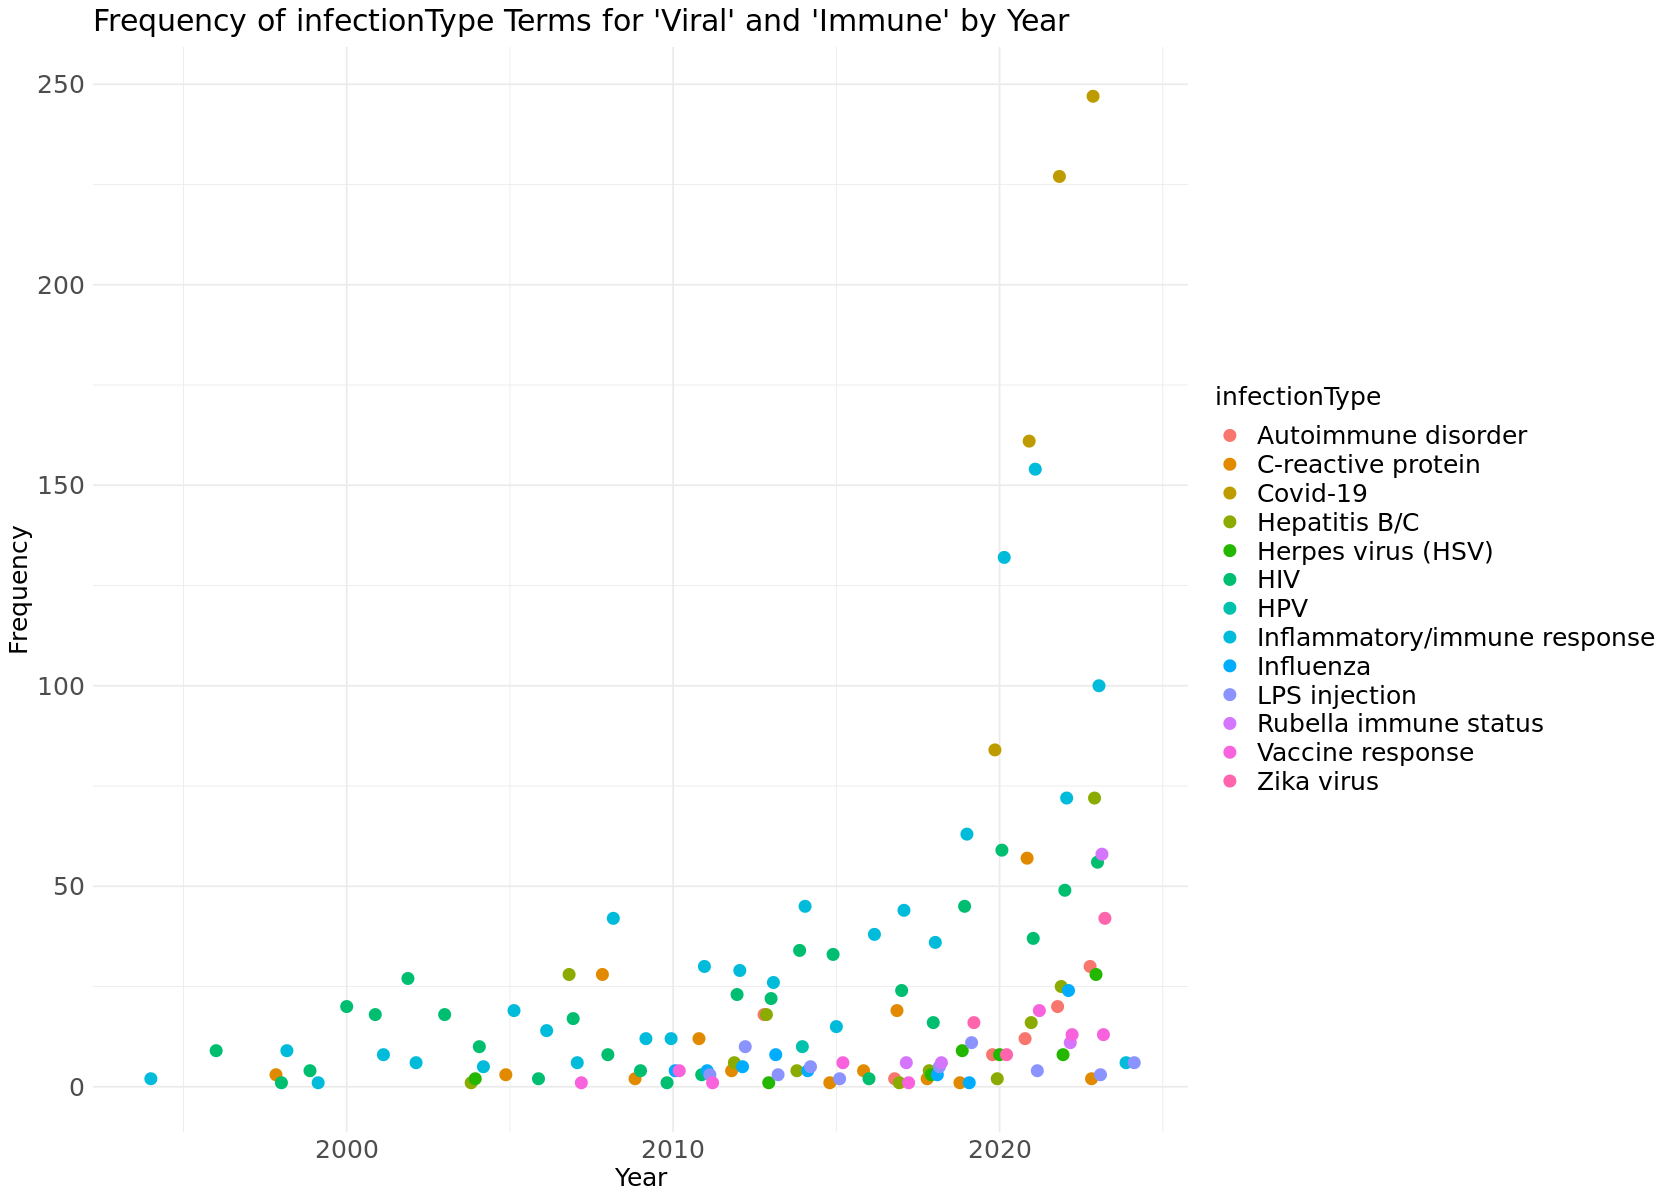

In [44]:
# Is this driven by Covid?


filtered_df <- datMetaNutInfPreg %>% filter(InfCat %in% c("Viral Infections", "Immune/Inflammatory Responses"))

# Count the number of nutritionType entries per year for the NutCat Anthropometrics
inftype_counts <- filtered_df %>%
  group_by(year, infectionType) %>%
  summarise(count = n(), .groups = 'drop')

# Create the dot plot
ggplot(inftype_counts, aes(x = year, y = count, color = infectionType)) +
  geom_point(size = 3, position = position_dodge(width = 0.5)) +
  labs(
    title = "Frequency of infectionType Terms for 'Viral' and 'Immune' by Year",
    x = "Year",
    y = "Frequency",
    color = "infectionType"
  ) +
  theme_minimal() +
    theme(
    plot.title = element_text(size = 18), # Title text size
    axis.title = element_text(size = 15), # Axis titles
    axis.text = element_text(size = 15), # Axis tick labels
    legend.title = element_text(size = 15), # Legend title
    legend.text = element_text(size = 15), # Legend labels
    strip.text = element_text(size = 14) # Facet labels
    )


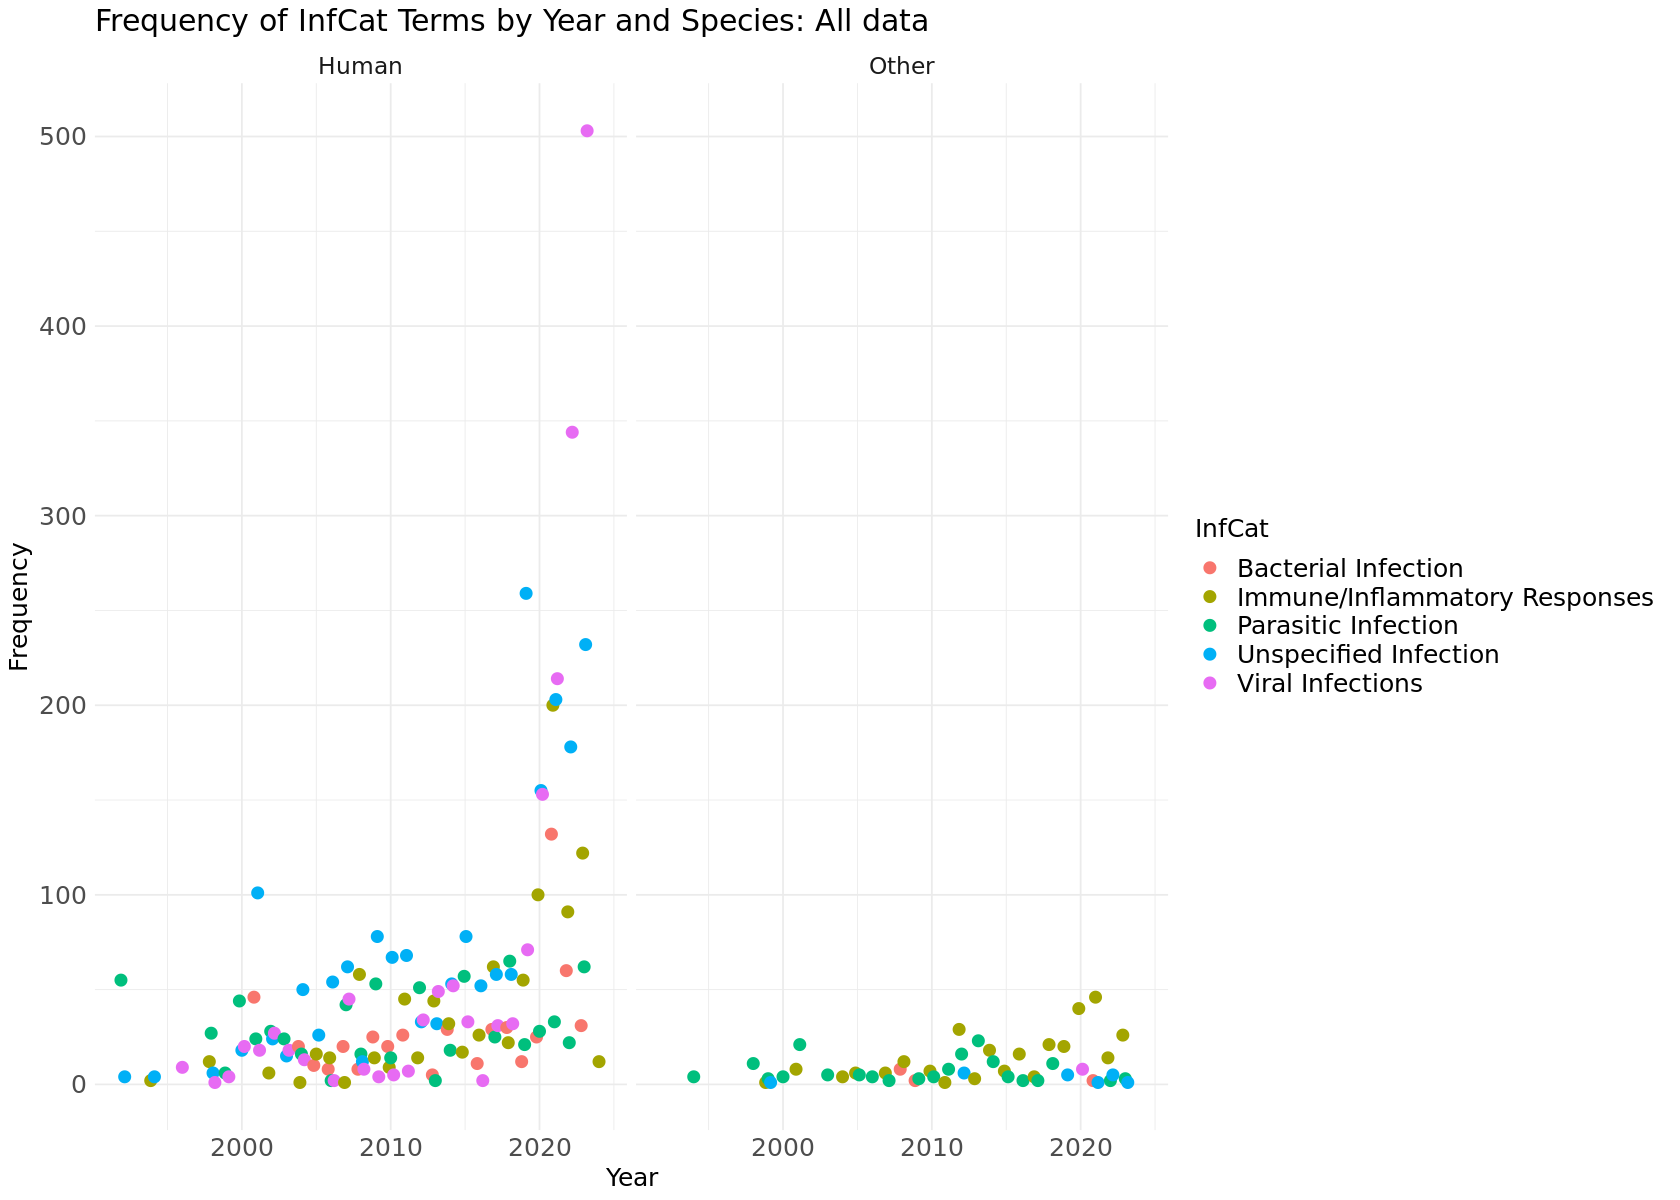

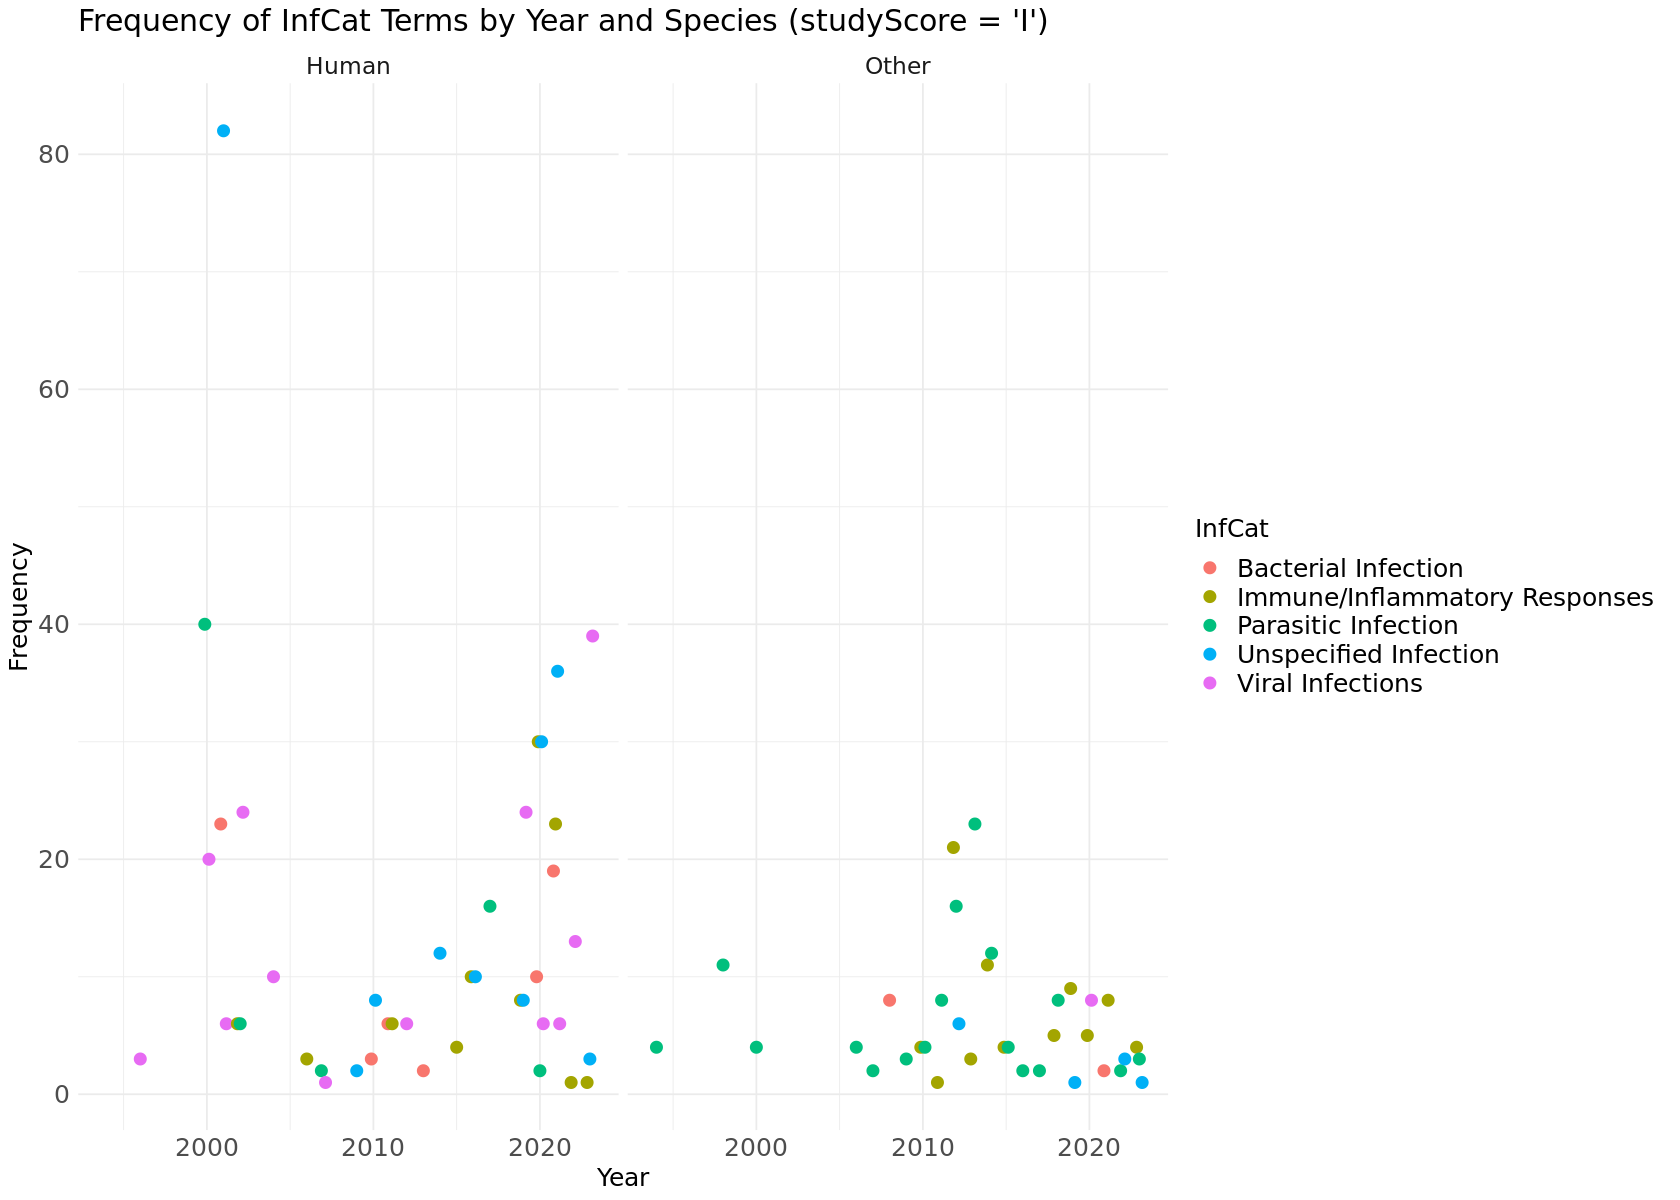

In [45]:
# Is this true for Human and Other?

options(repr.plot.width = 14, repr.plot.height = 10)


# Count InfCat entries per year and species
infcat_counts <- datMetaNutInfPreg %>%
  group_by(year, InfCat, speciesCat) %>%
  summarise(count = n(), .groups = 'drop')

# Create the dot plot with facets for speciesCat
ggplot(infcat_counts, aes(x = year, y = count, color = InfCat)) +
  geom_point(size = 3, position = position_dodge(width = 0.5)) +
  facet_wrap(~ speciesCat) +
  labs(
    title = "Frequency of InfCat Terms by Year and Species: All data",
    x = "Year",
    y = "Frequency",
    color = "InfCat"
  ) +
  theme_minimal() +
    theme(
    plot.title = element_text(size = 18), # Title text size
    axis.title = element_text(size = 15), # Axis titles
    axis.text = element_text(size = 15), # Axis tick labels
    legend.title = element_text(size = 15), # Legend title
    legend.text = element_text(size = 15), # Legend labels
    strip.text = element_text(size = 14) # Facet labels
    )




# Filter for studyScore == "I" and count NutCat entries per year and species
infcat_counts_I <- datMetaNutInfPreg %>%
  filter(studyScore == "I") %>%
  group_by(year, InfCat, speciesCat) %>%
  summarise(count = n(), .groups = 'drop')

# Create the dot plot with facets for speciesCat
ggplot(infcat_counts_I, aes(x = year, y = count, color = InfCat)) +
  geom_point(size = 3, position = position_dodge(width = 0.5)) +
  facet_wrap(~ speciesCat) +
  labs(
    title = "Frequency of InfCat Terms by Year and Species (studyScore = 'I')",
    x = "Year",
    y = "Frequency",
    color = "InfCat"
  ) +
  theme_minimal() +
    theme(
    plot.title = element_text(size = 18), # Title text size
    axis.title = element_text(size = 15), # Axis titles
    axis.text = element_text(size = 15), # Axis tick labels
    legend.title = element_text(size = 15), # Legend title
    legend.text = element_text(size = 15), # Legend labels
    strip.text = element_text(size = 14) # Facet labels
    )


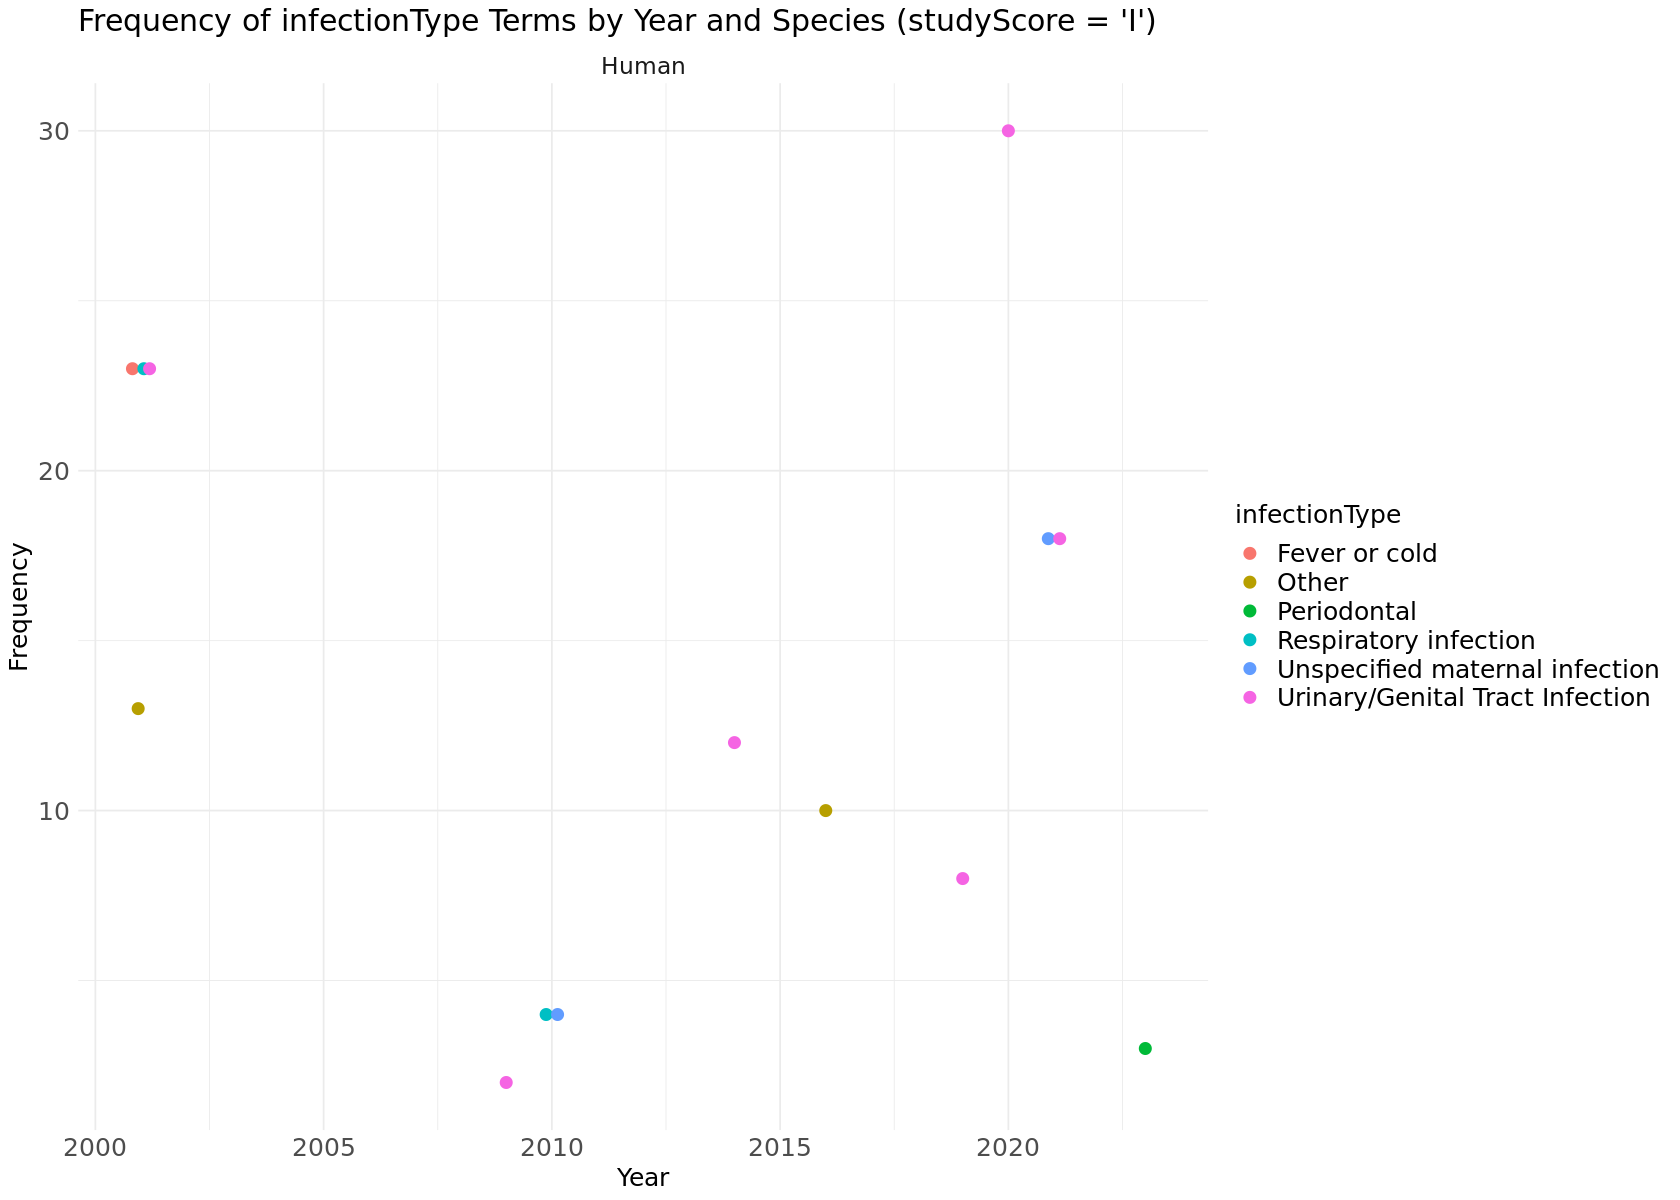

In [46]:
# What are these high points? 

options(repr.plot.width = 14, repr.plot.height = 10)

# Filter for studyScore == "I" and specific InfCat values by speciesCat
infcat_counts_I <- datMetaNutInfPreg %>%
  filter(
    studyScore == "I" &
    (
      (speciesCat == "Human" & InfCat %in% c("Unspecified Infection", "Bacterial")) |
      (speciesCat == "Other" & InfCat %in% c("Parasitic", "Immune"))
    )
  ) %>%
  group_by(year, infectionType, speciesCat) %>%
  summarise(count = n(), .groups = 'drop')

# Create the dot plot with facets for speciesCat
ggplot(infcat_counts_I, aes(x = year, y = count, color = infectionType)) +
  geom_point(size = 3, position = position_dodge(width = 0.5)) +
  facet_wrap(~ speciesCat) +
  labs(
    title = "Frequency of infectionType Terms by Year and Species (studyScore = 'I')",
    x = "Year",
    y = "Frequency",
    color = "infectionType"
  ) +
  theme_minimal() +
  theme(
    plot.title = element_text(size = 18),
    axis.title = element_text(size = 15),
    axis.text = element_text(size = 15),
    legend.title = element_text(size = 15),
    legend.text = element_text(size = 15),
    strip.text = element_text(size = 14)
  )


In [41]:
# Outcome Plots

[1] 5936   16

[1] 477  16

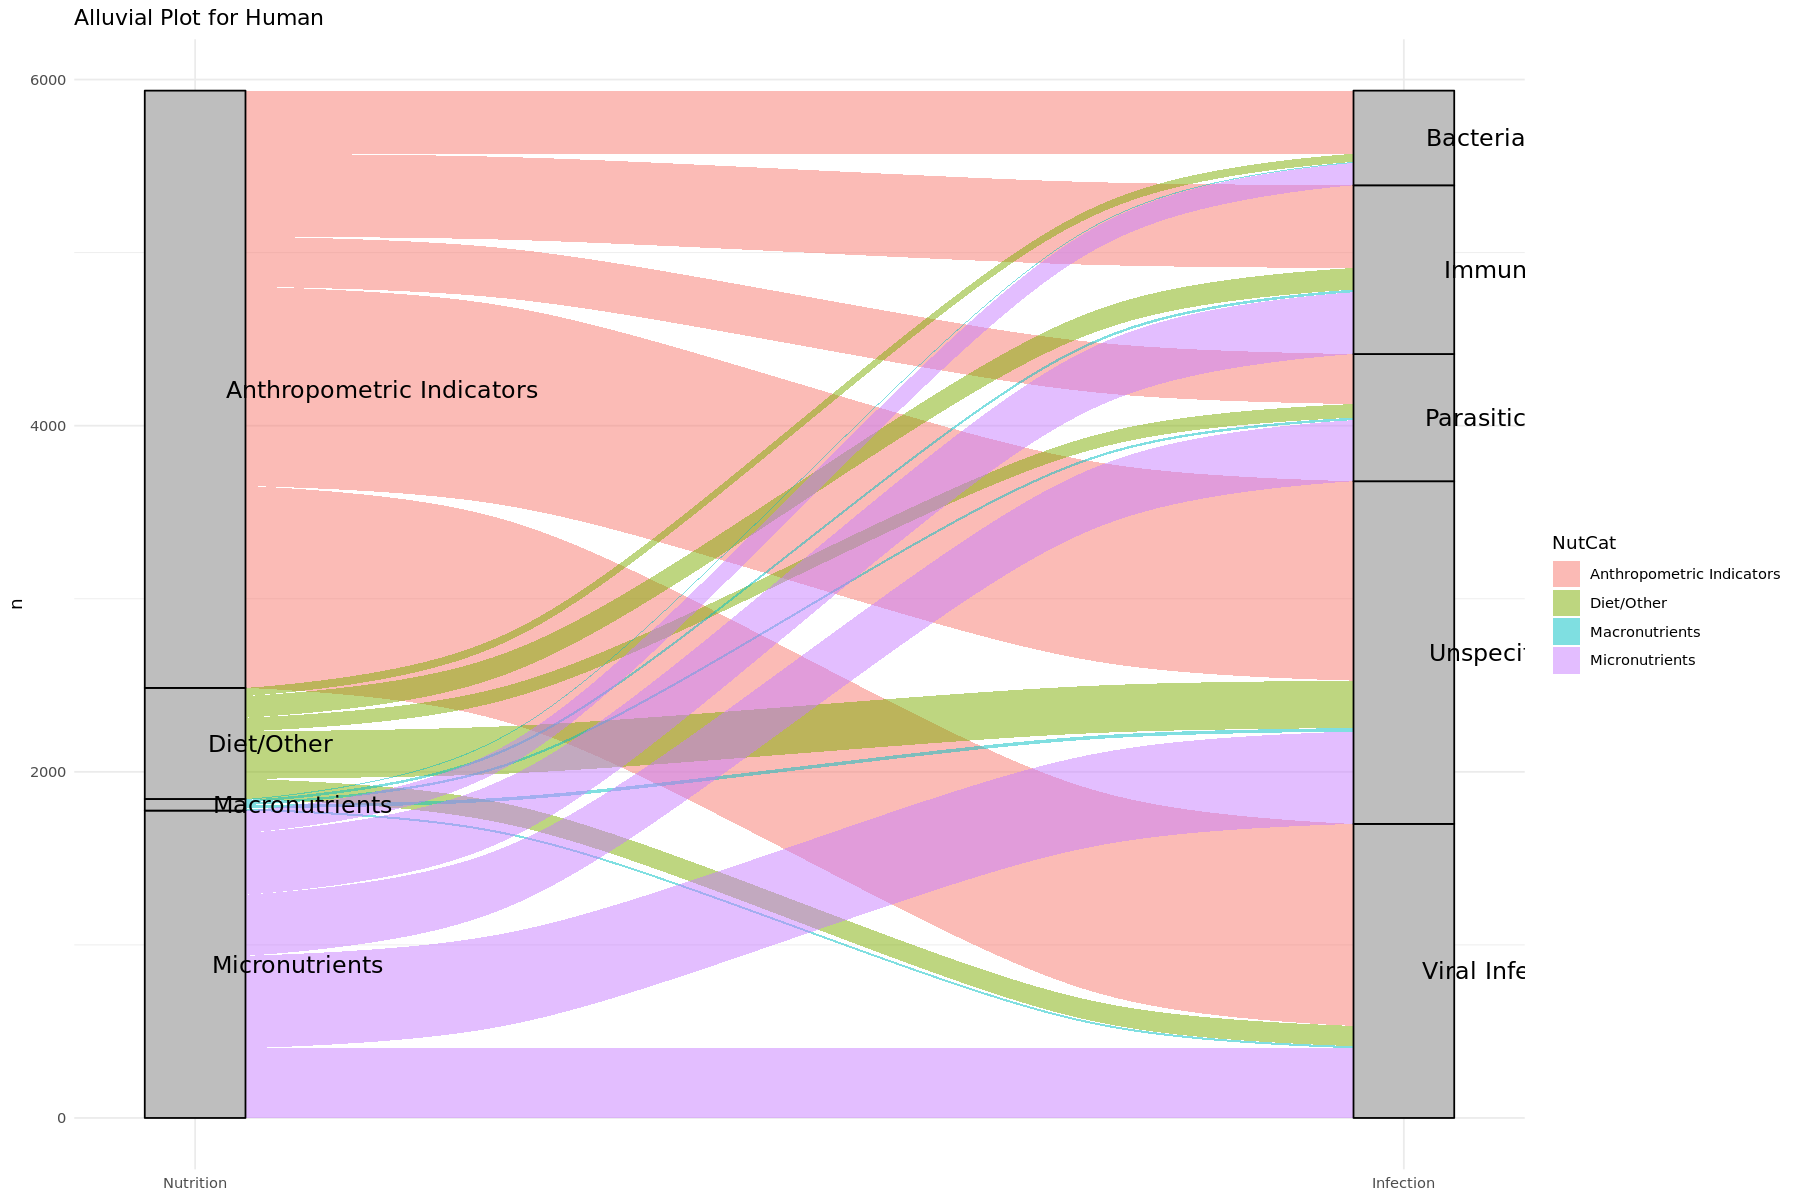

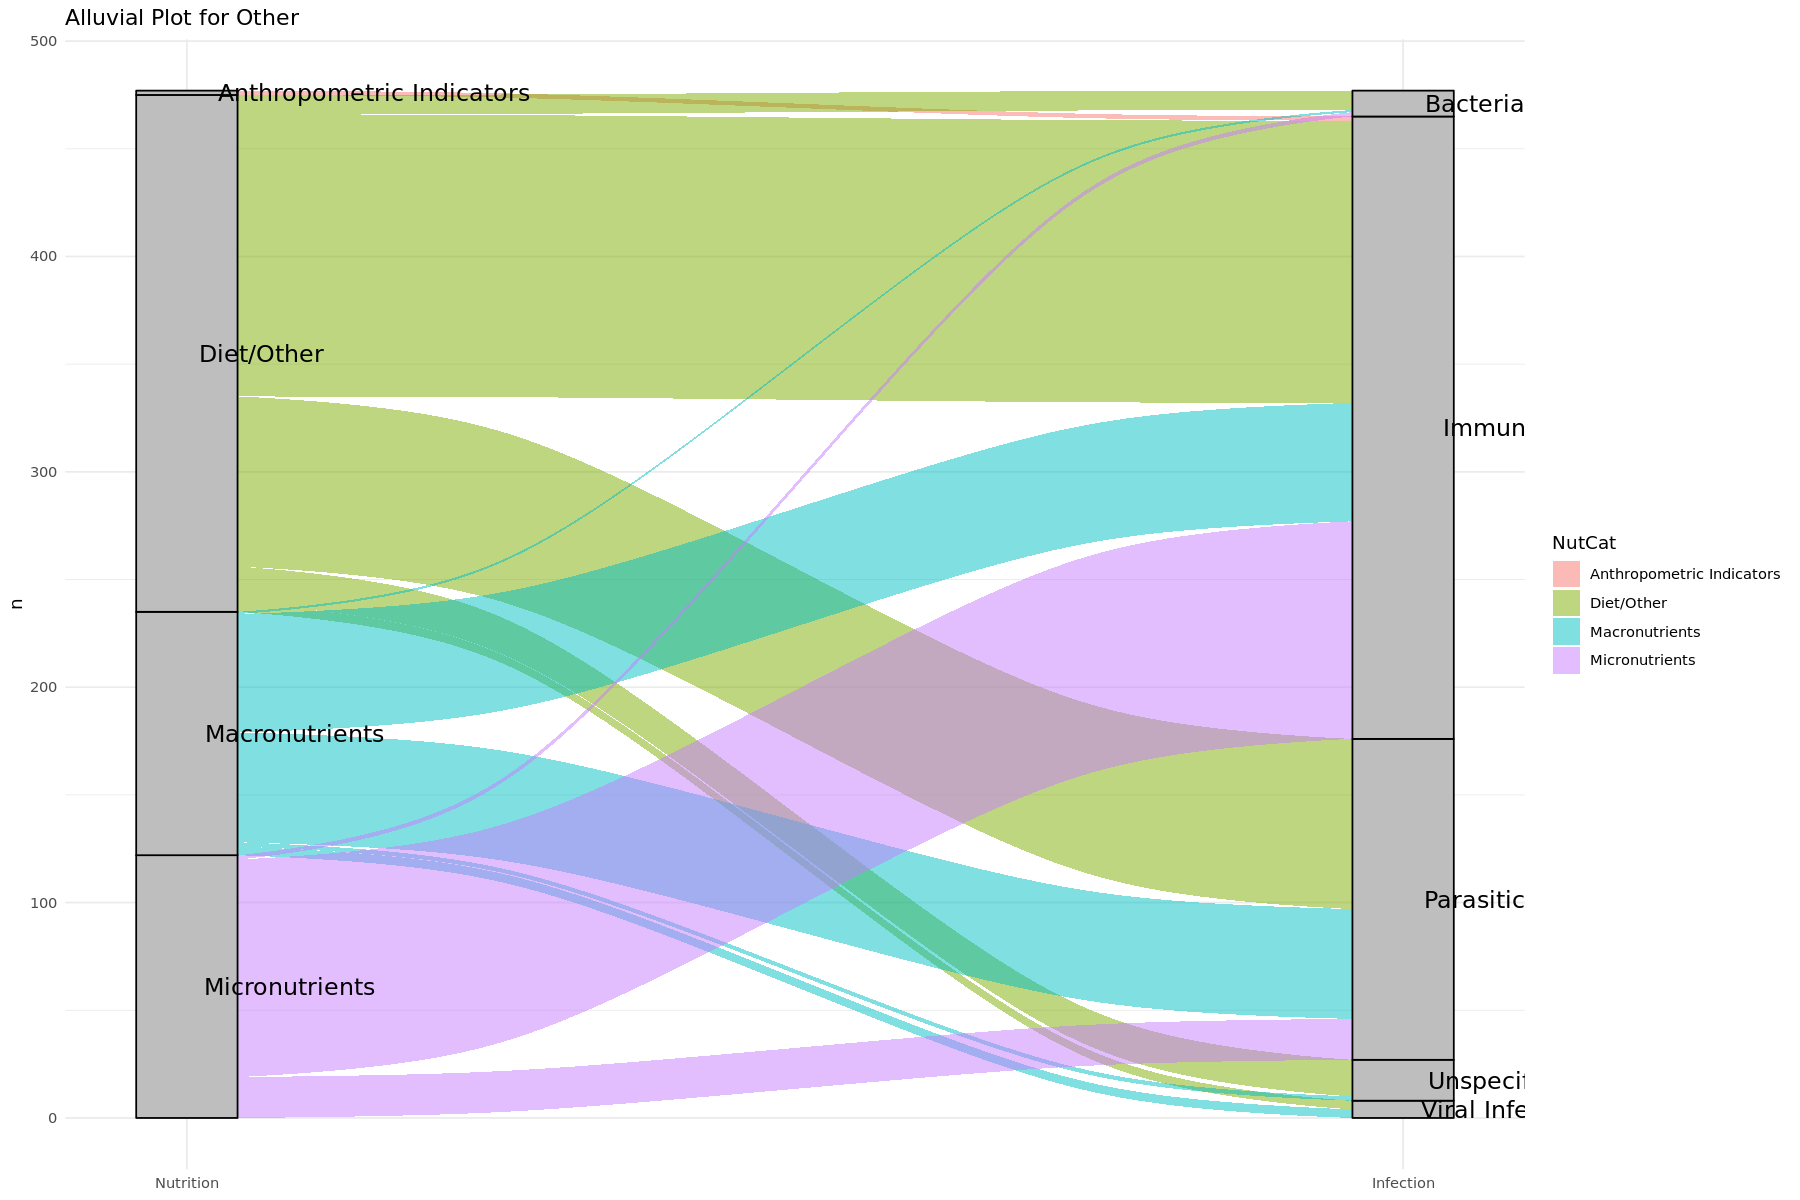

In [47]:
# Alluvial plots 

# Load required packages
library(ggplot2)
library(ggalluvial)
library(dplyr)

# Inf ~ Nutrition categories for all studies

# Function to plot alluvial diagram
plot_alluvial <- function(data, title) {
# Aggregate data to count flows
    flow_data <- data %>%
    count(NutCat, InfCat)

    ggplot(flow_data,
         aes(axis1 = NutCat, axis2 = InfCat, y = n)) +
    geom_alluvium(aes(fill = NutCat), width = 1/12) +
    geom_stratum(width = 1/12, fill = "grey", color = "black") +
    geom_text(stat = "stratum", aes(label = after_stat(stratum)), size = 5, hjust = -0.1) +
    scale_x_discrete(limits = c("Nutrition", "Infection"), expand = c(.05, .05)) +
    ggtitle(title) +
    theme_minimal()
}

#set the default width of figures in notebook

options(repr.plot.width = 15, repr.plot.height = 10)


# Plot for Human
dim(datMetaNutInfPreg %>% filter(speciesCat == "Human"))
plot_alluvial(datMetaNutInfPreg %>% filter(speciesCat == "Human"), "Alluvial Plot for Human")

# Plot for Other
dim(datMetaNutInfPreg %>% filter(speciesCat == "Other"))
plot_alluvial(datMetaNutInfPreg %>% filter(speciesCat == "Other"), "Alluvial Plot for Other")

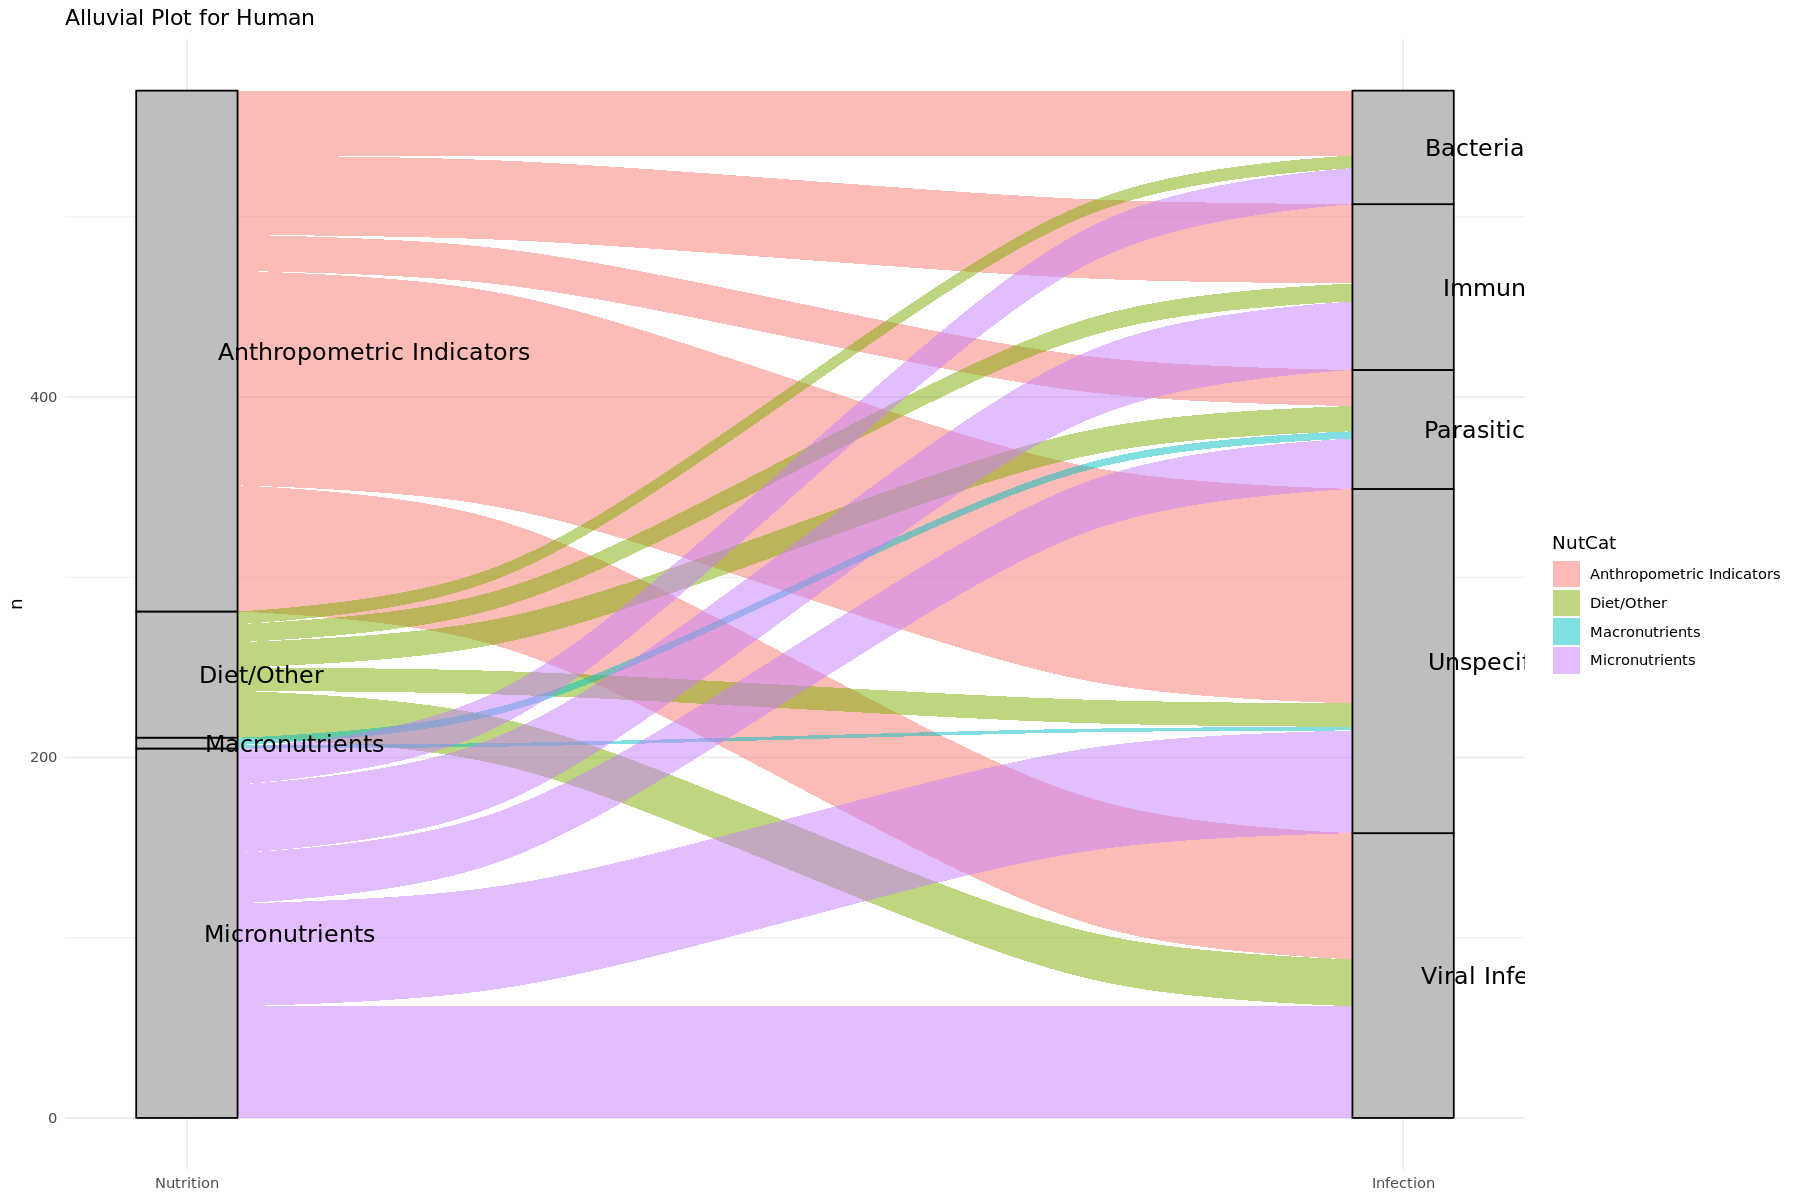

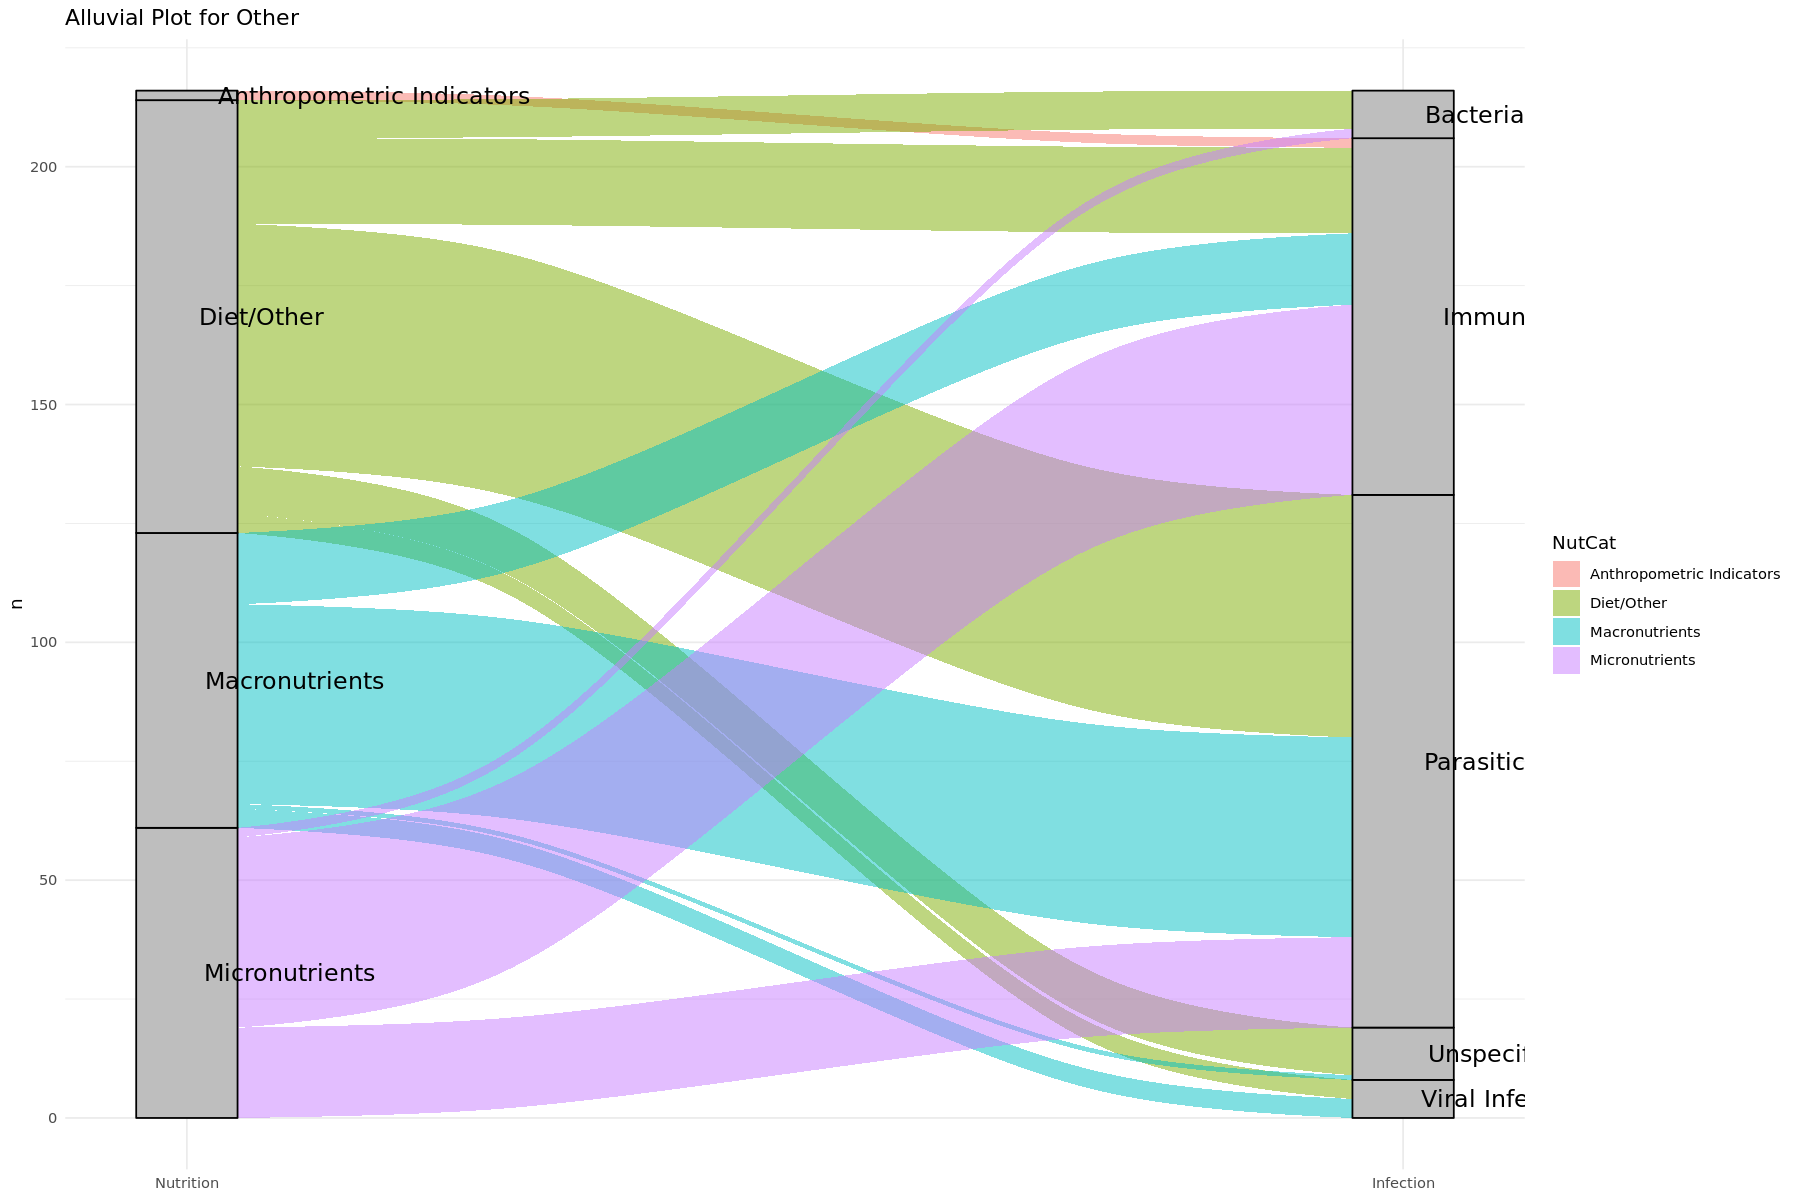

In [48]:
# StudyType I only

# Filter for studyScore == "I"
df_filtered <- datMetaNutInfPreg %>% filter(studyScore == "I")

# Function to plot alluvial diagram
plot_alluvial <- function(data, title) {
# Aggregate data to count flows
    flow_data <- data %>%
    count(NutCat, InfCat)

    ggplot(flow_data,
         aes(axis1 = NutCat, axis2 = InfCat, y = n)) +
    geom_alluvium(aes(fill = NutCat), width = 1/12) +
    geom_stratum(width = 1/12, fill = "grey", color = "black") +
    geom_text(stat = "stratum", aes(label = after_stat(stratum)), size = 5, hjust = -0.1) +
    scale_x_discrete(limits = c("Nutrition", "Infection"), expand = c(.05, .05)) +
    ggtitle(title) +
    theme_minimal()
}

#set the default width of figures in notebook

options(repr.plot.width = 15, repr.plot.height = 10)


# Plot for Human
plot_alluvial(df_filtered %>% filter(speciesCat == "Human"), "Alluvial Plot for Human")

# Plot for Other
plot_alluvial(df_filtered %>% filter(speciesCat == "Other"), "Alluvial Plot for Other")


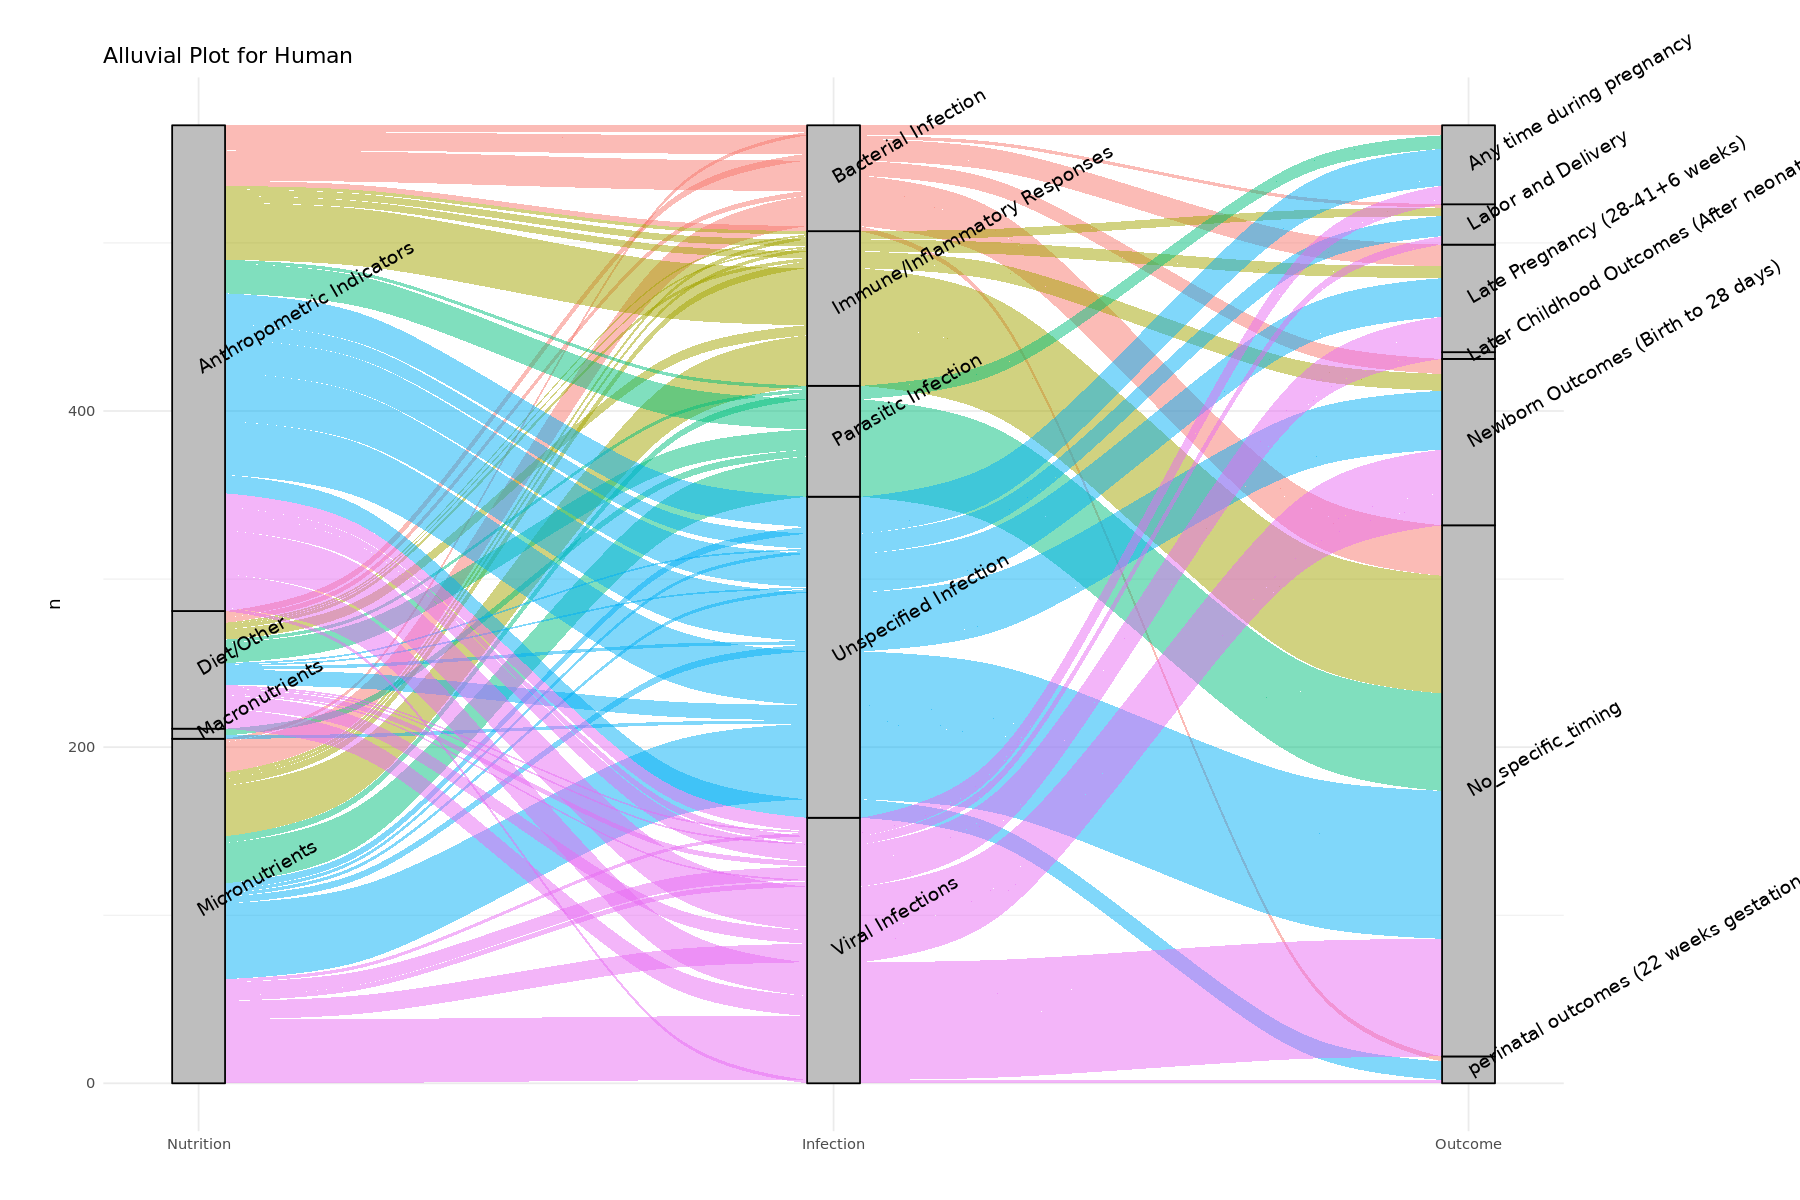

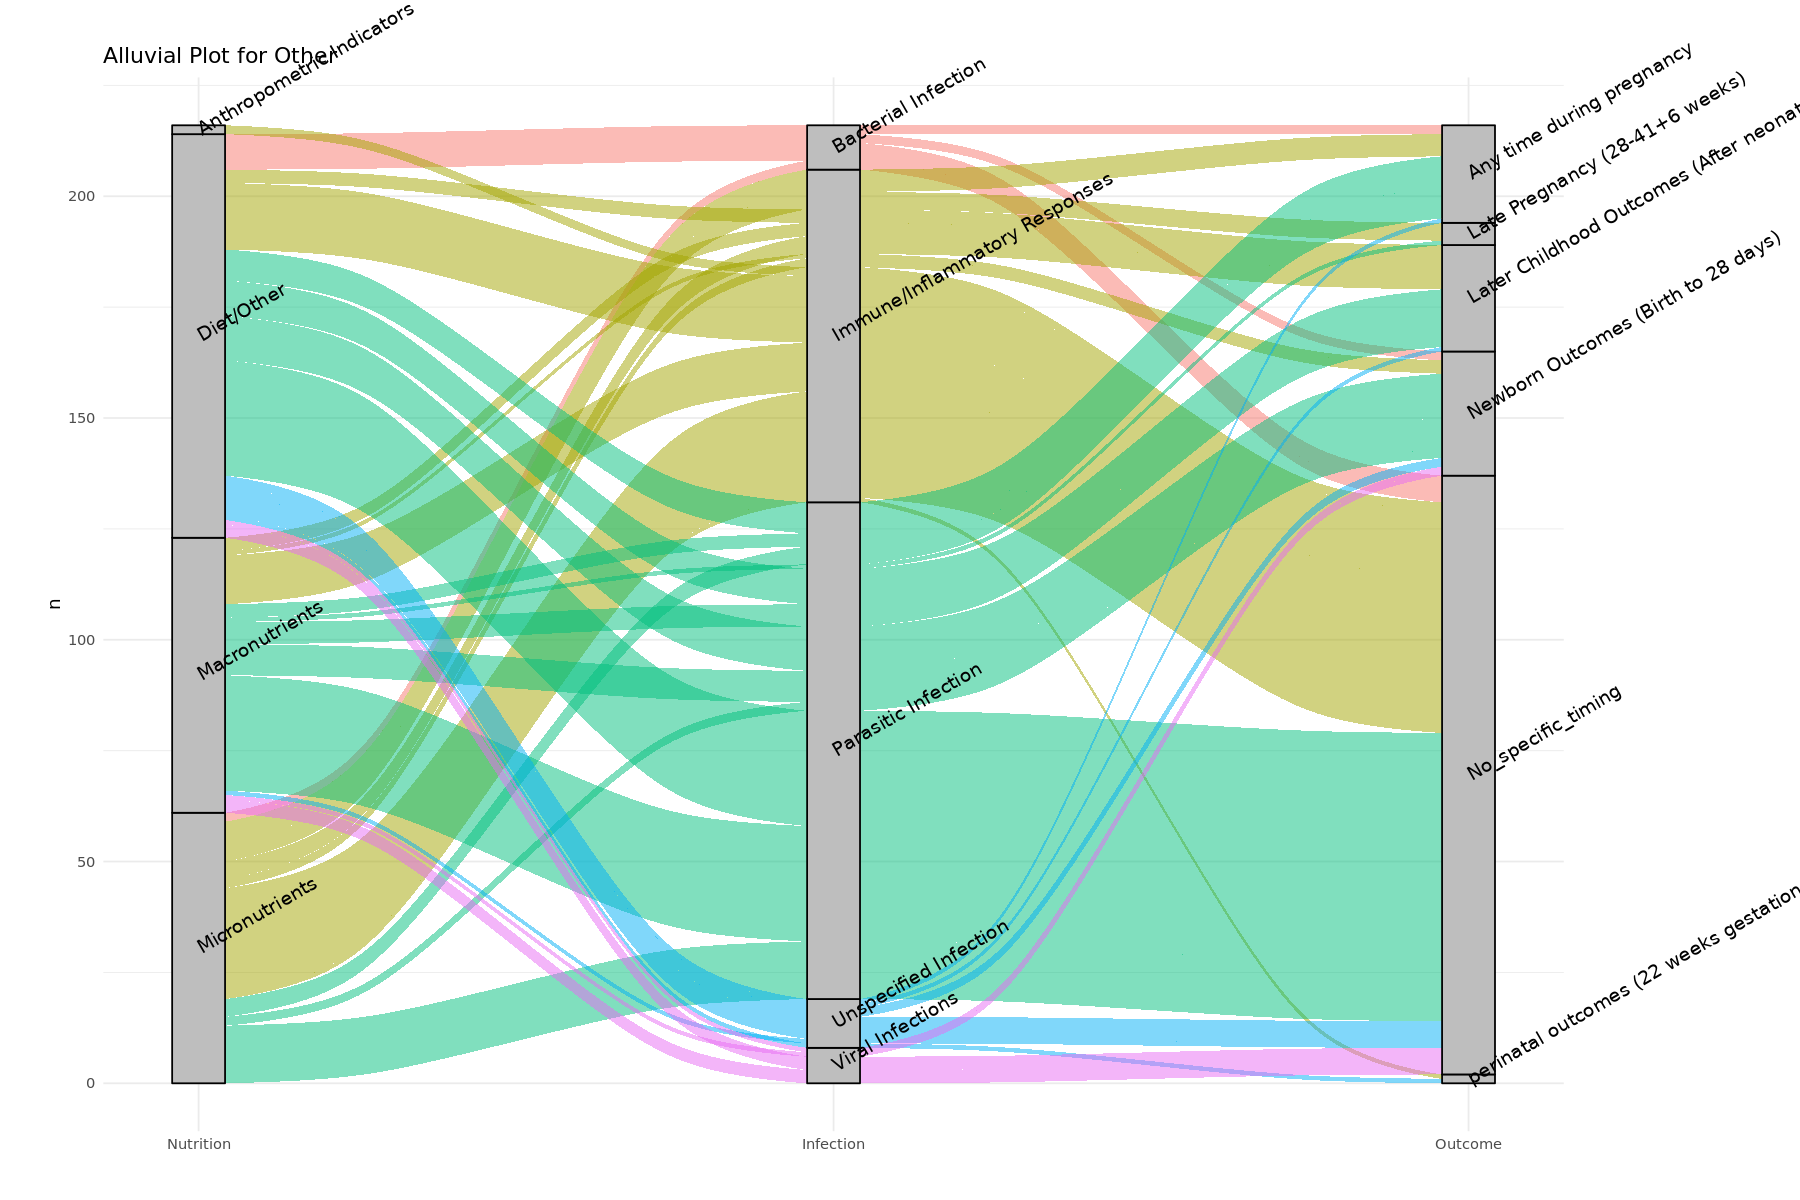

In [55]:
#Increase Binder figure size
#options(repr.plot.width = 50, repr.plot.height = 10)

# Load required packages
library(ggplot2)
library(ggalluvial)
library(dplyr)

# Filter for studyScore == "I"
df_filtered <- datMetaNutInfPreg %>% filter(studyScore == "I")

# Function to plot three-level alluvial diagram
plot_alluvial <- function(data, title) {
  # Aggregate data to count flows
  flow_data <- data %>%
    count(NutCat, InfCat, OutTimeCat)

  ggplot(flow_data,
         aes(axis1 = NutCat, axis2 = InfCat, axis3 = OutTimeCat, y = n)) +
    geom_alluvium(aes(fill = InfCat), width = 1/12) +
    geom_stratum(width = 1/12, fill = "grey", color = "black") +
    geom_text(stat = "stratum", aes(label = after_stat(stratum)), size = 4, angle = 30, hjust = 0) +
    scale_x_discrete(limits = c("Nutrition", "Infection", "Outcome"), expand = c(.05, .05)) +
    ggtitle(title) +
    theme_minimal() +
    theme(
        legend.position = "none",
        plot.margin = unit(c(1, 5, 1, 1), "cm")  # Increase right margin
) +
coord_cartesian(clip = "off")
  #print the labels beyond the extent of the figure
}

# Set the default width of figures in notebook
options(repr.plot.width = 15, repr.plot.height = 10)

# Plot for Human
plot_alluvial(df_filtered %>% filter(speciesCat == "Human"), "Alluvial Plot for Human")

# Plot for Other
plot_alluvial(df_filtered %>% filter(speciesCat == "Other"), "Alluvial Plot for Other")



In [52]:
#Sanity check: Are there no Early Pregnancy outcomes in human studies? There are none for studyScore I, but there are for studyScore II
df_filtered <- datMetaNutInfPreg %>% filter(studyScore == "I")
df_filtered %>% filter(OutTimeCat == "Early Pregnancy (0-12 weeks)")

studyRef assessedBy firstAuthor year species countryStudy mainOutcome
     studyScore nutritionType NutCat infectionType InfCat pregnancyOutcomeType
     OutTimeCat OutPathCat speciesCat

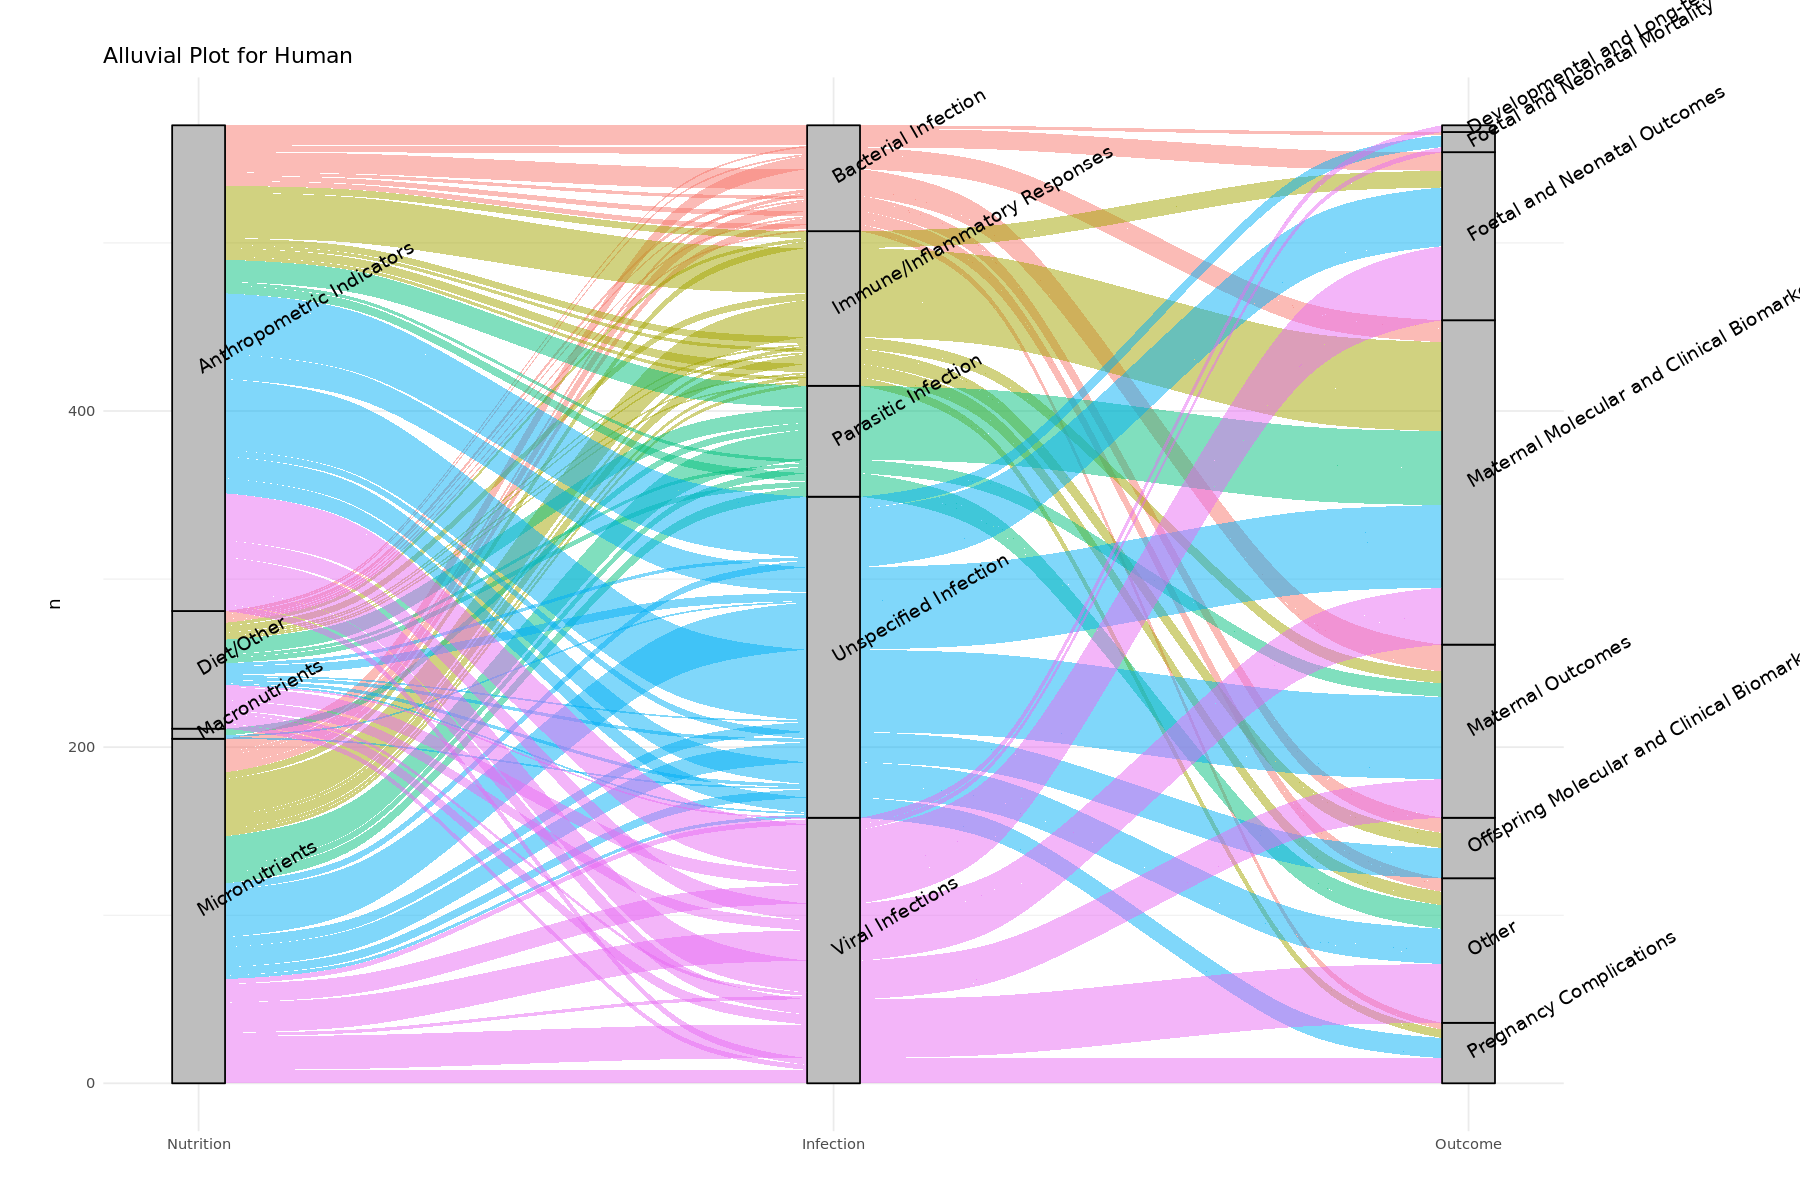

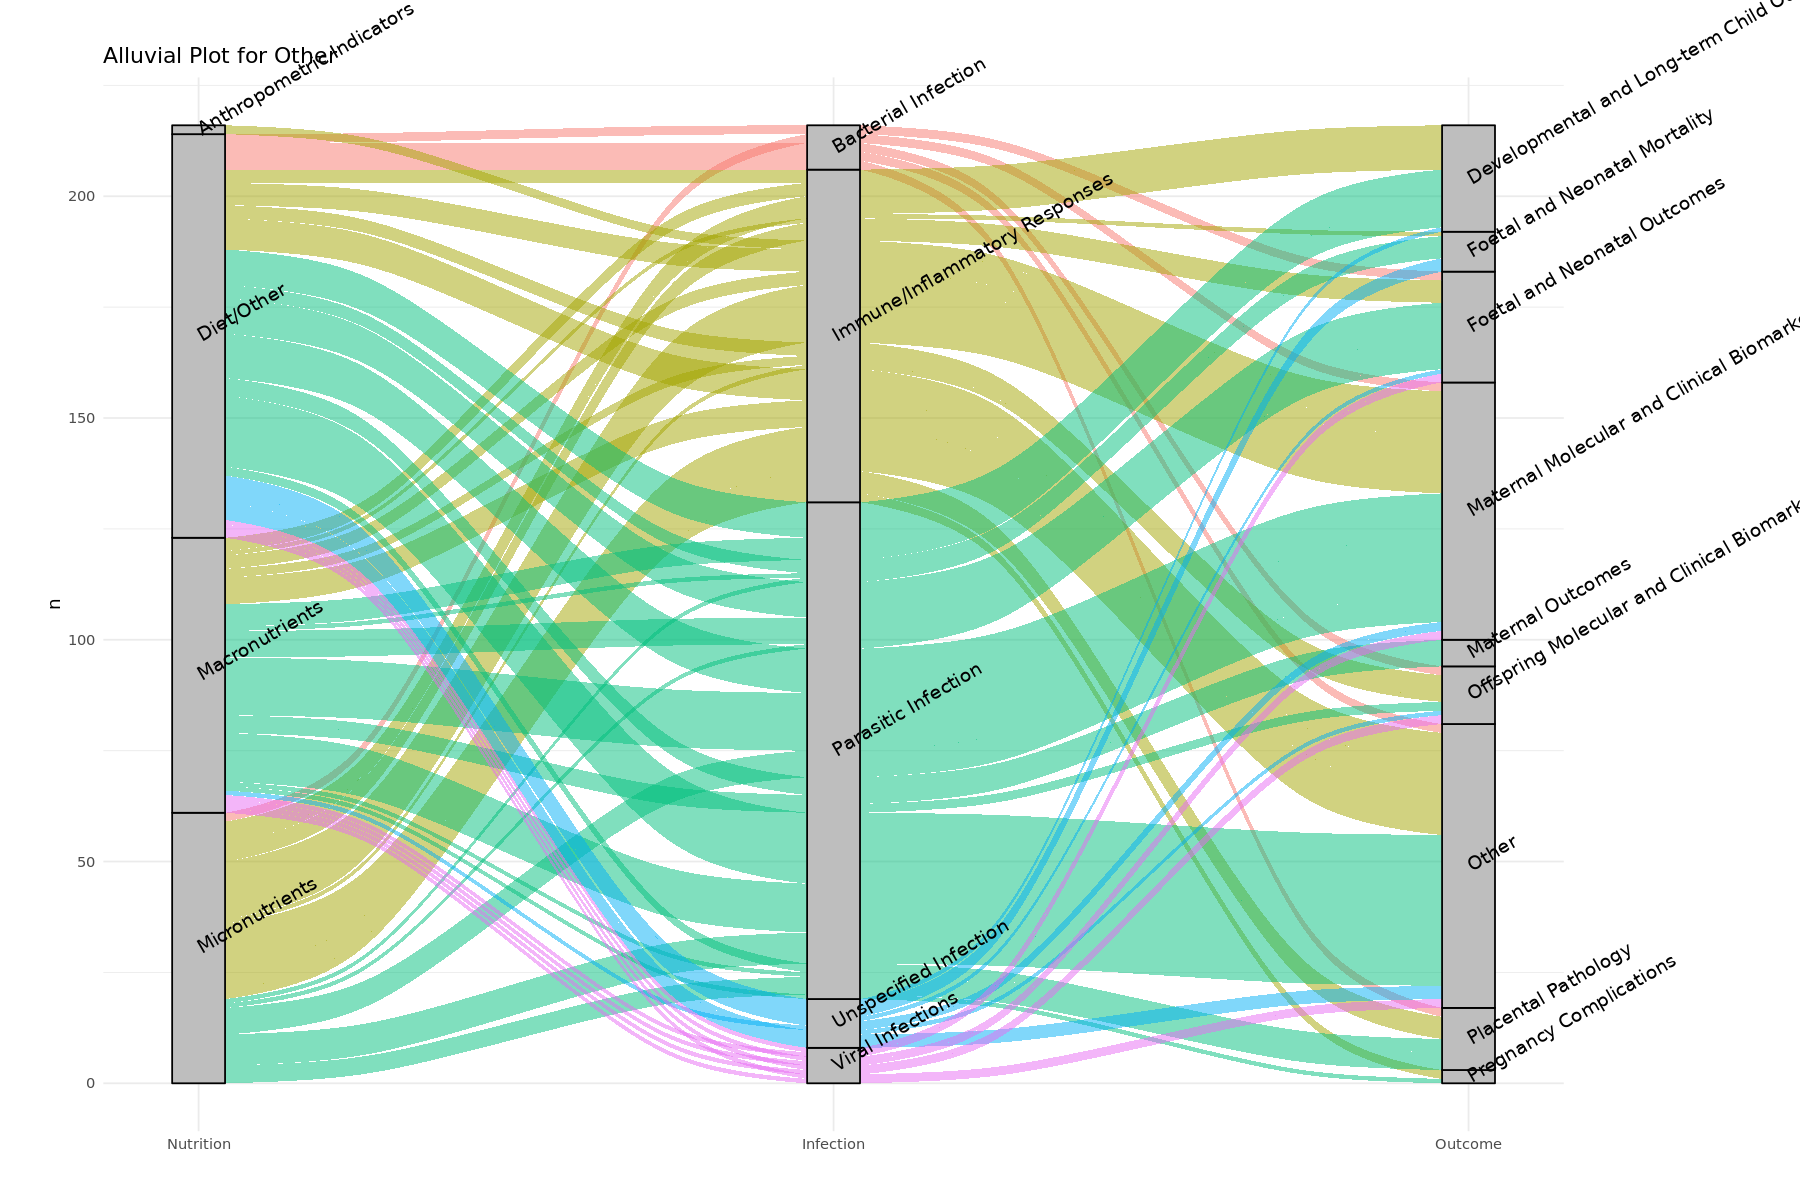

In [56]:
## Alluvial plots based on Path Outcome

#Increase Binder figure size
#options(repr.plot.width = 50, repr.plot.height = 10)

# Load required packages
library(ggplot2)
library(ggalluvial)
library(dplyr)

# Filter for studyScore == "I"
df_filtered <- datMetaNutInfPreg %>% filter(studyScore == "I")

# Function to plot three-level alluvial diagram
plot_alluvial <- function(data, title) {
  # Aggregate data to count flows
  flow_data <- data %>%
    count(NutCat, InfCat, OutPathCat)

  ggplot(flow_data,
         aes(axis1 = NutCat, axis2 = InfCat, axis3 = OutPathCat, y = n)) +
    geom_alluvium(aes(fill = InfCat), width = 1/12) +
    geom_stratum(width = 1/12, fill = "grey", color = "black") +
    geom_text(stat = "stratum", aes(label = after_stat(stratum)), size = 4, angle = 30, hjust = 0) +
    scale_x_discrete(limits = c("Nutrition", "Infection", "Outcome"), expand = c(.05, .05)) +
    ggtitle(title) +
    theme_minimal() +
    theme(
        legend.position = "none",
        plot.margin = unit(c(1, 5, 1, 1), "cm")  # Increase right margin
) +
coord_cartesian(clip = "off")
  #print the labels beyond the extent of the figure
}

# Set the default width of figures in notebook
options(repr.plot.width = 15, repr.plot.height = 10)

# Plot for Human
plot_alluvial(df_filtered %>% filter(speciesCat == "Human"), "Alluvial Plot for Human")

# Plot for Other
plot_alluvial(df_filtered %>% filter(speciesCat == "Other"), "Alluvial Plot for Other")

## Direction and size of Effects



Choose a few papers to pull out the size and direction of effects. 

What combination of Inf x Nut? 

What data are we looking for? 

In [48]:
# How many papers have Parasite x Micronutrients for Type I studies? 

efsz_subset_human <- datMetaNutInfPreg %>% filter(datMetaNutInfPreg$InfCat == "Parasitic", datMetaNutInfPreg$NutCat == "Micronutrients", speciesCat =="Human", studyScore=="I")
efsz_subset_other <- datMetaNutInfPreg %>% filter(datMetaNutInfPreg$InfCat == "Parasitic", datMetaNutInfPreg$NutCat == "Micronutrients", speciesCat =="Other", studyScore=="I")

print("Number of Human Type I studies investigating Parasite x Micronutrient interactions:")
length(unique(efsz_subset_human$studyRef))


print("Number of Other Type I studies investigating Parasite x Micronutrient interactions:")
length(unique(efsz_subset_other$studyRef))


[1] "Number of Human Type I studies investigating Parasite x Micronutrient interactions:"


[1] 2

[1] "Number of Other Type I studies investigating Parasite x Micronutrient interactions:"


[1] 4

In [49]:
# How many papers have Bacterial x Micronutrients for Type I studies? 

efsz_subset_human <- datMetaNutInfPreg %>% filter(datMetaNutInfPreg$InfCat == "Bacterial", datMetaNutInfPreg$NutCat == "Micronutrients", speciesCat =="Human", studyScore=="I")
efsz_subset_other <- datMetaNutInfPreg %>% filter(datMetaNutInfPreg$InfCat == "Bacterial", datMetaNutInfPreg$NutCat == "Micronutrients", speciesCat =="Other", studyScore=="I")

print("Number of Human Type I studies investigating Bacterial x Micronutrient interactions:")
length(unique(efsz_subset_human$studyRef))


print("Number of Other Type I studies investigating Bacterial x Micronutrient interactions:")
length(unique(efsz_subset_other$studyRef))

[1] "Number of Human Type I studies investigating Bacterial x Micronutrient interactions:"


[1] 4

[1] "Number of Other Type I studies investigating Bacterial x Micronutrient interactions:"


[1] 1

In [50]:
# How many papers have Viral x Micronutrients for Type I studies? 

efsz_subset_human <- datMetaNutInfPreg %>% filter(datMetaNutInfPreg$InfCat == "Viral", datMetaNutInfPreg$NutCat == "Micronutrients", speciesCat =="Human", studyScore=="I")
efsz_subset_other <- datMetaNutInfPreg %>% filter(datMetaNutInfPreg$InfCat == "Viral", datMetaNutInfPreg$NutCat == "Micronutrients", speciesCat =="Other", studyScore=="I")

print("Number of Human Type I studies investigating Viral x Micronutrient interactions:")
length(unique(efsz_subset_human$studyRef))


print("Number of Other Type I studies investigating Viral x Micronutrient interactions:")
length(unique(efsz_subset_other$studyRef))

[1] "Number of Human Type I studies investigating Viral x Micronutrient interactions:"


[1] 8

[1] "Number of Other Type I studies investigating Viral x Micronutrient interactions:"


[1] 0

In [51]:
# How many papers have Parasite x Anthropometrics for Type I studies? 

efsz_subset_human <- datMetaNutInfPreg %>% filter(datMetaNutInfPreg$InfCat == "Parasitic", datMetaNutInfPreg$NutCat == "Anthropometrics", speciesCat =="Human", studyScore=="I")
efsz_subset_other <- datMetaNutInfPreg %>% filter(datMetaNutInfPreg$InfCat == "Parasitic", datMetaNutInfPreg$NutCat == "Anthropometrics", speciesCat =="Other", studyScore=="I")

print("Number of Human Type I studies investigating Parasite x Anthropometrics interactions:")
length(unique(efsz_subset_human$studyRef))


print("Number of Other Type I studies investigating Parasite x Anthropometrics interactions:")
length(unique(efsz_subset_other$studyRef))


[1] "Number of Human Type I studies investigating Parasite x Anthropometrics interactions:"


[1] 4

[1] "Number of Other Type I studies investigating Parasite x Anthropometrics interactions:"


[1] 0

In [52]:
# How many papers have Bacterial x Anthropometrics for Type I studies? 

efsz_subset_human <- datMetaNutInfPreg %>% filter(datMetaNutInfPreg$InfCat == "Bacterial", datMetaNutInfPreg$NutCat == "Anthropometrics", speciesCat =="Human", studyScore=="I")
efsz_subset_other <- datMetaNutInfPreg %>% filter(datMetaNutInfPreg$InfCat == "Bacterial", datMetaNutInfPreg$NutCat == "Anthropometrics", speciesCat =="Other", studyScore=="I")

print("Number of Human Type I studies investigating Bacterial x Anthropometrics interactions:")
length(unique(efsz_subset_human$studyRef))


print("Number of Other Type I studies investigating Bacterial x Anthropometrics interactions:")
length(unique(efsz_subset_other$studyRef))

[1] "Number of Human Type I studies investigating Bacterial x Anthropometrics interactions:"


[1] 7

[1] "Number of Other Type I studies investigating Bacterial x Anthropometrics interactions:"


[1] 0

In [53]:
# How many papers have Viral x Anthropometrics for Type I studies? 

efsz_subset_human <- datMetaNutInfPreg %>% filter(datMetaNutInfPreg$InfCat == "Viral", datMetaNutInfPreg$NutCat == "Anthropometrics", speciesCat =="Human", studyScore=="I")
efsz_subset_other <- datMetaNutInfPreg %>% filter(datMetaNutInfPreg$InfCat == "Viral", datMetaNutInfPreg$NutCat == "Anthropometrics", speciesCat =="Other", studyScore=="I")

print("Number of Human Type I studies investigating Viral x Anthropometrics interactions:")
length(unique(efsz_subset_human$studyRef))


print("Number of Other Type I studies investigating Viral x Anthropometrics interactions:")
length(unique(efsz_subset_other$studyRef))

[1] "Number of Human Type I studies investigating Viral x Anthropometrics interactions:"


[1] 13

[1] "Number of Other Type I studies investigating Viral x Anthropometrics interactions:"


[1] 0

In [54]:
# How many papers have Parasitic x Macronutrients for Type I studies? 

efsz_subset_human <- datMetaNutInfPreg %>% filter(datMetaNutInfPreg$InfCat == "Parasitic", datMetaNutInfPreg$NutCat == "Macronutrients", speciesCat =="Human", studyScore=="I")
efsz_subset_other <- datMetaNutInfPreg %>% filter(datMetaNutInfPreg$InfCat == "Parasitic", datMetaNutInfPreg$NutCat == "Macronutrients", speciesCat =="Other", studyScore=="I")

print("Number of Human Type I studies investigating Parasitic x Macronutrient interactions:")
length(unique(efsz_subset_human$studyRef))


print("Number of Other Type I studies investigating Parasitic x Macronutrient interactions:")
length(unique(efsz_subset_other$studyRef))

[1] "Number of Human Type I studies investigating Parasitic x Macronutrient interactions:"


[1] 1

[1] "Number of Other Type I studies investigating Parasitic x Macronutrient interactions:"


[1] 13

In [55]:
# How many papers have Bacterial x Macronutrients for Type I studies? 

efsz_subset_human <- datMetaNutInfPreg %>% filter(datMetaNutInfPreg$InfCat == "Bacterial", datMetaNutInfPreg$NutCat == "Macronutrients", speciesCat =="Human", studyScore=="I")
efsz_subset_other <- datMetaNutInfPreg %>% filter(datMetaNutInfPreg$InfCat == "Bacterial", datMetaNutInfPreg$NutCat == "Macronutrients", speciesCat =="Other", studyScore=="I")

print("Number of Human Type I studies investigating Bacterial x Macronutrient interactions:")
length(unique(efsz_subset_human$studyRef))


print("Number of Other Type I studies investigating Bacterial x Macronutrient interactions:")
length(unique(efsz_subset_other$studyRef))

[1] "Number of Human Type I studies investigating Bacterial x Macronutrient interactions:"


[1] 0

[1] "Number of Other Type I studies investigating Bacterial x Macronutrient interactions:"


[1] 0

In [56]:
# How many papers have Viral x Macronutrients for Type I studies? 

efsz_subset_human <- datMetaNutInfPreg %>% filter(datMetaNutInfPreg$InfCat == "Viral", datMetaNutInfPreg$NutCat == "Macronutrients", speciesCat =="Human", studyScore=="I")
efsz_subset_other <- datMetaNutInfPreg %>% filter(datMetaNutInfPreg$InfCat == "Viral", datMetaNutInfPreg$NutCat == "Macronutrients", speciesCat =="Other", studyScore=="I")

print("Number of Human Type I studies investigating Viral x Macronutrient interactions:")
length(unique(efsz_subset_human$studyRef))


print("Number of Other Type I studies investigating Viral x Macronutrient interactions:")
length(unique(efsz_subset_other$studyRef))

[1] "Number of Human Type I studies investigating Viral x Macronutrient interactions:"


[1] 0

[1] "Number of Other Type I studies investigating Viral x Macronutrient interactions:"


[1] 1

In [ ]:
## New data: Direction of effects

In [64]:
datEffect <- read.csv("tblStudyEffectSizeI_temp.csv", header=T)


head(datEffect)


studyRef   firstAuthor year species studyScore studyType sampleSize
1 1182475990 Akinbamijo  1994 Sheep   I                              
2 1182475990 Akinbamijo  1994 Sheep   I                              
3 1182475990 Akinbamijo  1994 Sheep   I                              
4 1182475990 Akinbamijo  1994 Sheep   I                              
5 1182477924 Phuapradit  1996 Human   I                              
6 1182475988 Osaer       1998 Sheep   I                              
  time_of_infection time_of_diet statistical_analysis control_infected
1                                                                     
2                                                                     
3                                                                     
4                                                                     
5                                                                     
6                                                                     
  medication directionOfEffects pregnancyOutcome                  
1                               Birth weight                      
2                               Growth                            
3                               Miscarriage / spontaneous abortion
4                               Other - maternal                  
5                               Biomarkers of immunity - maternal 
6                               Aemia - maternal                  
  Category                                  
1 Foetal and Neotal Outcomes                
2 Developmental and Long-term Child Outcomes
3 Foetal and Neotal Mortality               
4 Other - maternal                          
5 maternal Molecular and Clinical Biomarkers
6 maternal Outcomes

In [65]:
# join to our full data table: 
head(datMetaNutInfPreg)

studyRef   assessedBy firstAuthor year species countryStudy mainOutcome
1 1182475512 AS/SE      O'Higgins   2014 Human   Ireland      Both       
2 1182475512 AS/SE      O'Higgins   2014 Human   Ireland      Both       
3 1182475512 AS/SE      O'Higgins   2014 Human   Ireland      Both       
4 1182475512 AS/SE      O'Higgins   2014 Human   Ireland      Both       
5 1182475512 AS/SE      O'Higgins   2014 Human   Ireland      Both       
6 1182475512 AS/SE      O'Higgins   2014 Human   Ireland      Both       
  studyScore nutritionType NutCat                    infectionType      
1 II         BMI           Anthropometric Indicators Bacterial infection
2 II         BMI           Anthropometric Indicators Bacterial infection
3 II         BMI           Anthropometric Indicators Bacterial infection
4 II         BMI           Anthropometric Indicators Bacterial infection
5 II         BMI           Anthropometric Indicators Bacterial infection
6 II         BMI           Anthropometric Indicators Bacterial infection
  InfCat              pregnancyOutcomeType                     
1 Bacterial Infection Birth weight                             
2 Bacterial Infection Apgar score                              
3 Bacterial Infection Mode of delivery / caesarean section rate
4 Bacterial Infection Pre-term birth                           
5 Bacterial Infection Maternal mortality                       
6 Bacterial Infection Other - maternal                         
  OutTimeCat                          OutPathCat                   speciesCat
1 Newborn Outcomes (Birth to 28 days) Foetal and Neonatal Outcomes Human     
2 Newborn Outcomes (Birth to 28 days) Foetal and Neonatal Outcomes Human     
3 Labor and Delivery                  Maternal Outcomes            Human     
4 Late Pregnancy (28-41+6 weeks)      Pregnancy Complications      Human     
5 Any time during pregnancy           Maternal Outcomes            Human     
6 No_specific_timing                  Other                        Human

In [66]:
#We're using only the Type I studies: 

df <- datMetaNutInfPreg %>% filter(studyScore=="I")


# Step 1: Select only the columns you want from datEffect
datEffect_subset <- datEffect %>%
  select(studyRef, pregnancyOutcome, Category, studyType, sampleSize, time_of_infection, 
         time_of_diet, control_infected, medication, directionOfEffects)  


#left join the two tables
datMetaNutInfPregEffect <- left_join(df, datEffect_subset, 
              by = c("studyRef" = "studyRef", "pregnancyOutcomeType" = "pregnancyOutcome"))


head(datMetaNutInfPregEffect)

studyRef   assessedBy firstAuthor year species countryStudy mainOutcome
1 1182475095 AS         Harvey      2014 Rat     Canada       Offspring  
2 1182475095 AS         Harvey      2014 Rat     Canada       Offspring  
3 1182475268 AS         Mihajlovic  2023 Human   Serbia       Both       
4 1182475268 AS         Mihajlovic  2023 Human   Serbia       Both       
5 1182475268 AS         Mihajlovic  2023 Human   Serbia       Both       
6 1182475268 AS         Mihajlovic  2023 Human   Serbia       Both       
  studyScore nutritionType NutCat                    ⋯
1 I          Iron          Micronutrients            ⋯
2 I          Iron          Micronutrients            ⋯
3 I          BMI           Anthropometric Indicators ⋯
4 I          BMI           Anthropometric Indicators ⋯
5 I          BMI           Anthropometric Indicators ⋯
6 I          BMI           Anthropometric Indicators ⋯
  OutPathCat                                 speciesCat
1 Developmental and Long-term Child Outcomes Other     
2 Maternal Molecular and Clinical Biomarkers Other     
3 Foetal and Neonatal Outcomes               Human     
4 Foetal and Neonatal Outcomes               Human     
5 Foetal and Neonatal Outcomes               Human     
6 Maternal Outcomes                          Human     
  Category                                   studyType                
1 Developmental and Long-term Child Outcomes                          
2 maternal Molecular and Clinical Biomarkers                          
3 Foetal and Neotal Outcomes                 Retrospective case-series
4 Foetal and Neotal Outcomes                 Retrospective case-series
5 Foetal and Neotal Outcomes                 Retrospective case-series
6 maternal Outcomes                          Retrospective case-series
  sampleSize time_of_infection time_of_diet control_infected medication
1                                                                      
2                                                                      
3 192        throughout        throughout   n/a              yes       
4 192        throughout        throughout   n/a              yes       
5 192        throughout        throughout   n/a              yes       
6 192        throughout        throughout   n/a              yes       
  directionOfEffects       
1                          
2                          
3 no significant difference
4 no significant difference
5 no significant difference
6 negative

In [67]:
# Plot 1: 

#keep only the data we currently have: 
dfEffect_clean <- datMetaNutInfPregEffect %>%
  filter(directionOfEffects %in% c("negative", "protective", "no significant difference"))


#Create a df for humans only
dfEffect_human <- dfEffect_clean %>% filter(speciesCat=="Human")

head(dfEffect_human)

#Create a df for other only
dfEffect_other <- dfEffect_clean %>% filter(speciesCat=="Other")

studyRef   assessedBy firstAuthor year species countryStudy mainOutcome
1 1182475268 AS         Mihajlovic  2023 Human   Serbia       Both       
2 1182475268 AS         Mihajlovic  2023 Human   Serbia       Both       
3 1182475268 AS         Mihajlovic  2023 Human   Serbia       Both       
4 1182475268 AS         Mihajlovic  2023 Human   Serbia       Both       
5 1182475268 AS         Mihajlovic  2023 Human   Serbia       Both       
6 1182475345 AS         Clarke      2021 Human   Australia    Mother     
  studyScore nutritionType NutCat                    ⋯
1 I          BMI           Anthropometric Indicators ⋯
2 I          BMI           Anthropometric Indicators ⋯
3 I          BMI           Anthropometric Indicators ⋯
4 I          BMI           Anthropometric Indicators ⋯
5 I          BMI           Anthropometric Indicators ⋯
6 I          BMI           Anthropometric Indicators ⋯
  OutPathCat                    speciesCat Category                   
1 Foetal and Neonatal Outcomes  Human      Foetal and Neotal Outcomes 
2 Foetal and Neonatal Outcomes  Human      Foetal and Neotal Outcomes 
3 Foetal and Neonatal Outcomes  Human      Foetal and Neotal Outcomes 
4 Maternal Outcomes             Human      maternal Outcomes          
5 Foetal and Neonatal Mortality Human      Foetal and Neotal Mortality
6 Other                         Human      Other - maternal           
  studyType                 sampleSize time_of_infection time_of_diet
1 Retrospective case-series 192        throughout        throughout  
2 Retrospective case-series 192        throughout        throughout  
3 Retrospective case-series 192        throughout        throughout  
4 Retrospective case-series 192        throughout        throughout  
5 Retrospective case-series 192        throughout        throughout  
6 Case cohort               96         mid-pregnancy     throughout  
  control_infected medication directionOfEffects       
1 n/a              yes        no significant difference
2 n/a              yes        no significant difference
3 n/a              yes        no significant difference
4 n/a              yes        negative                 
5 n/a              yes        negative                 
6 n/a              n/a        no significant difference

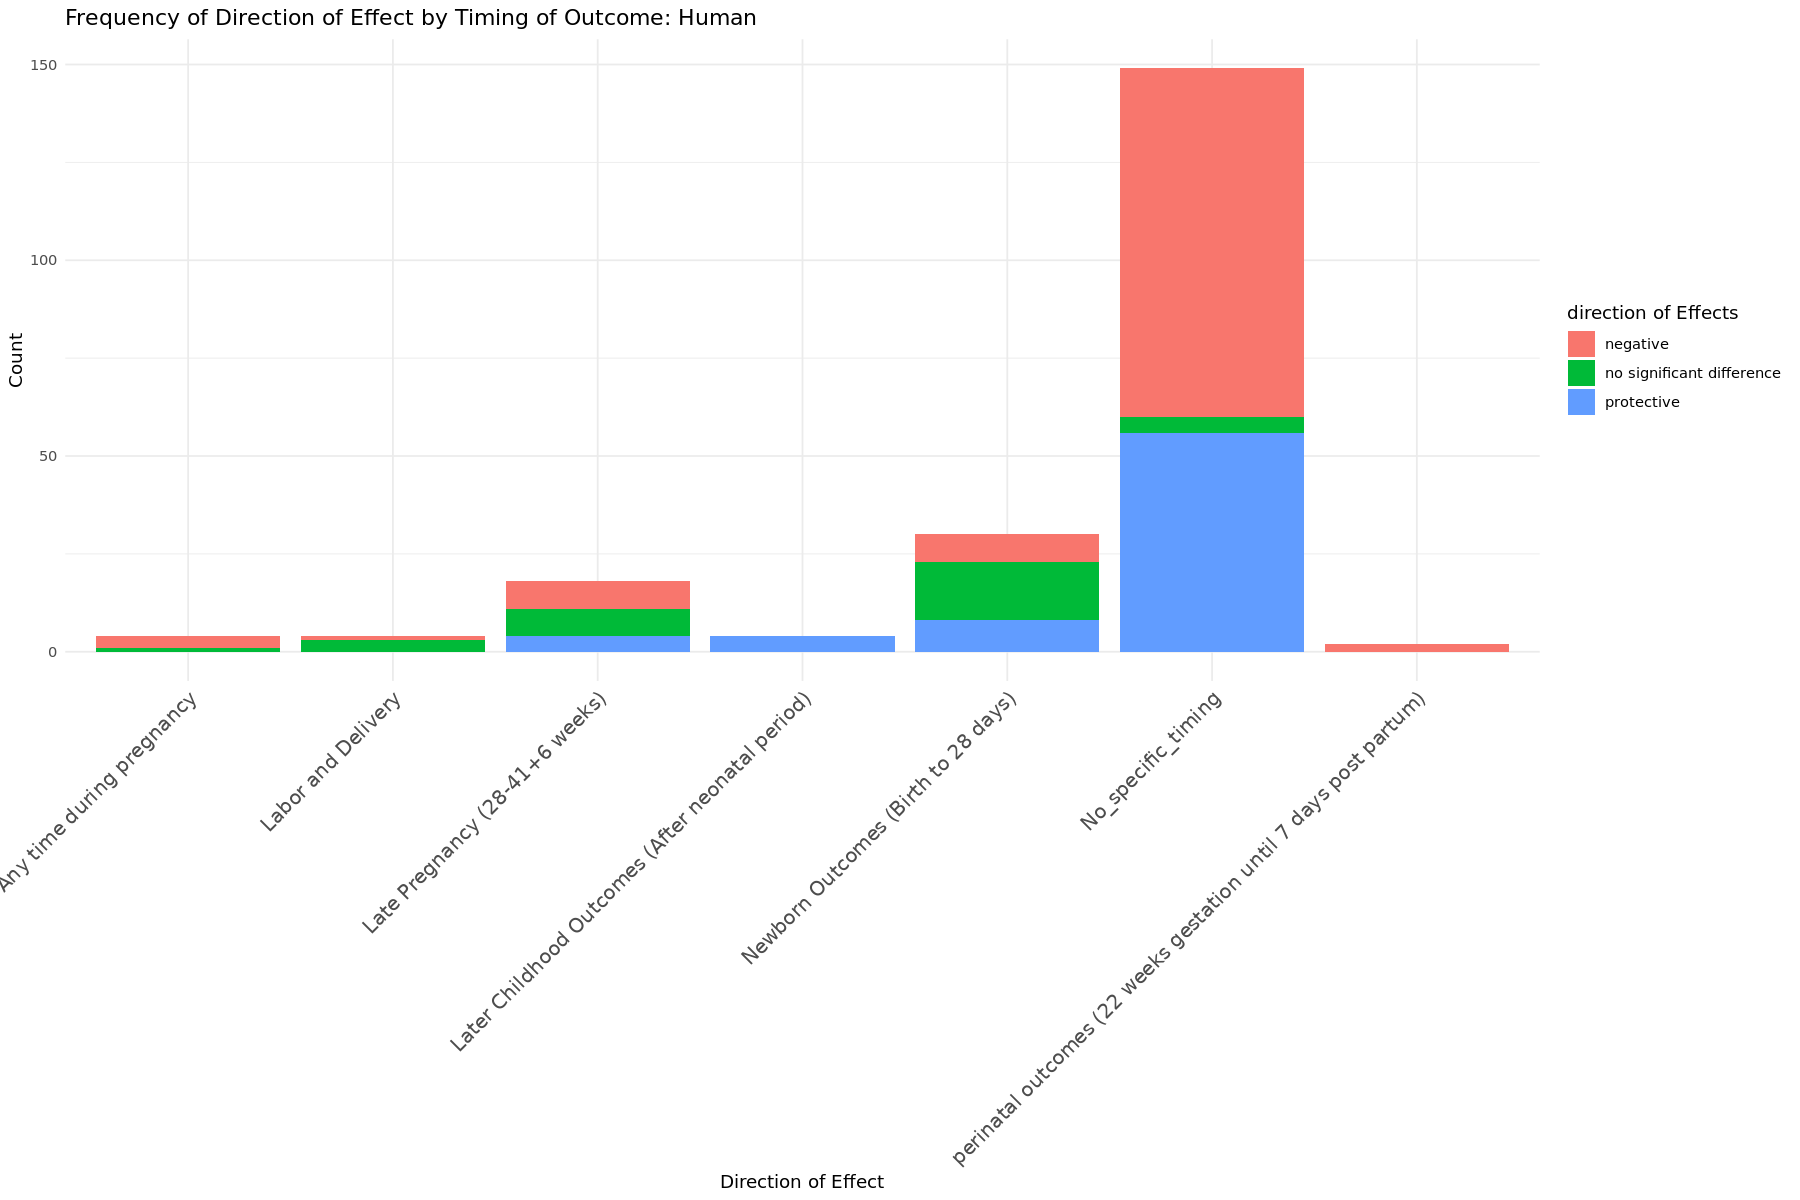

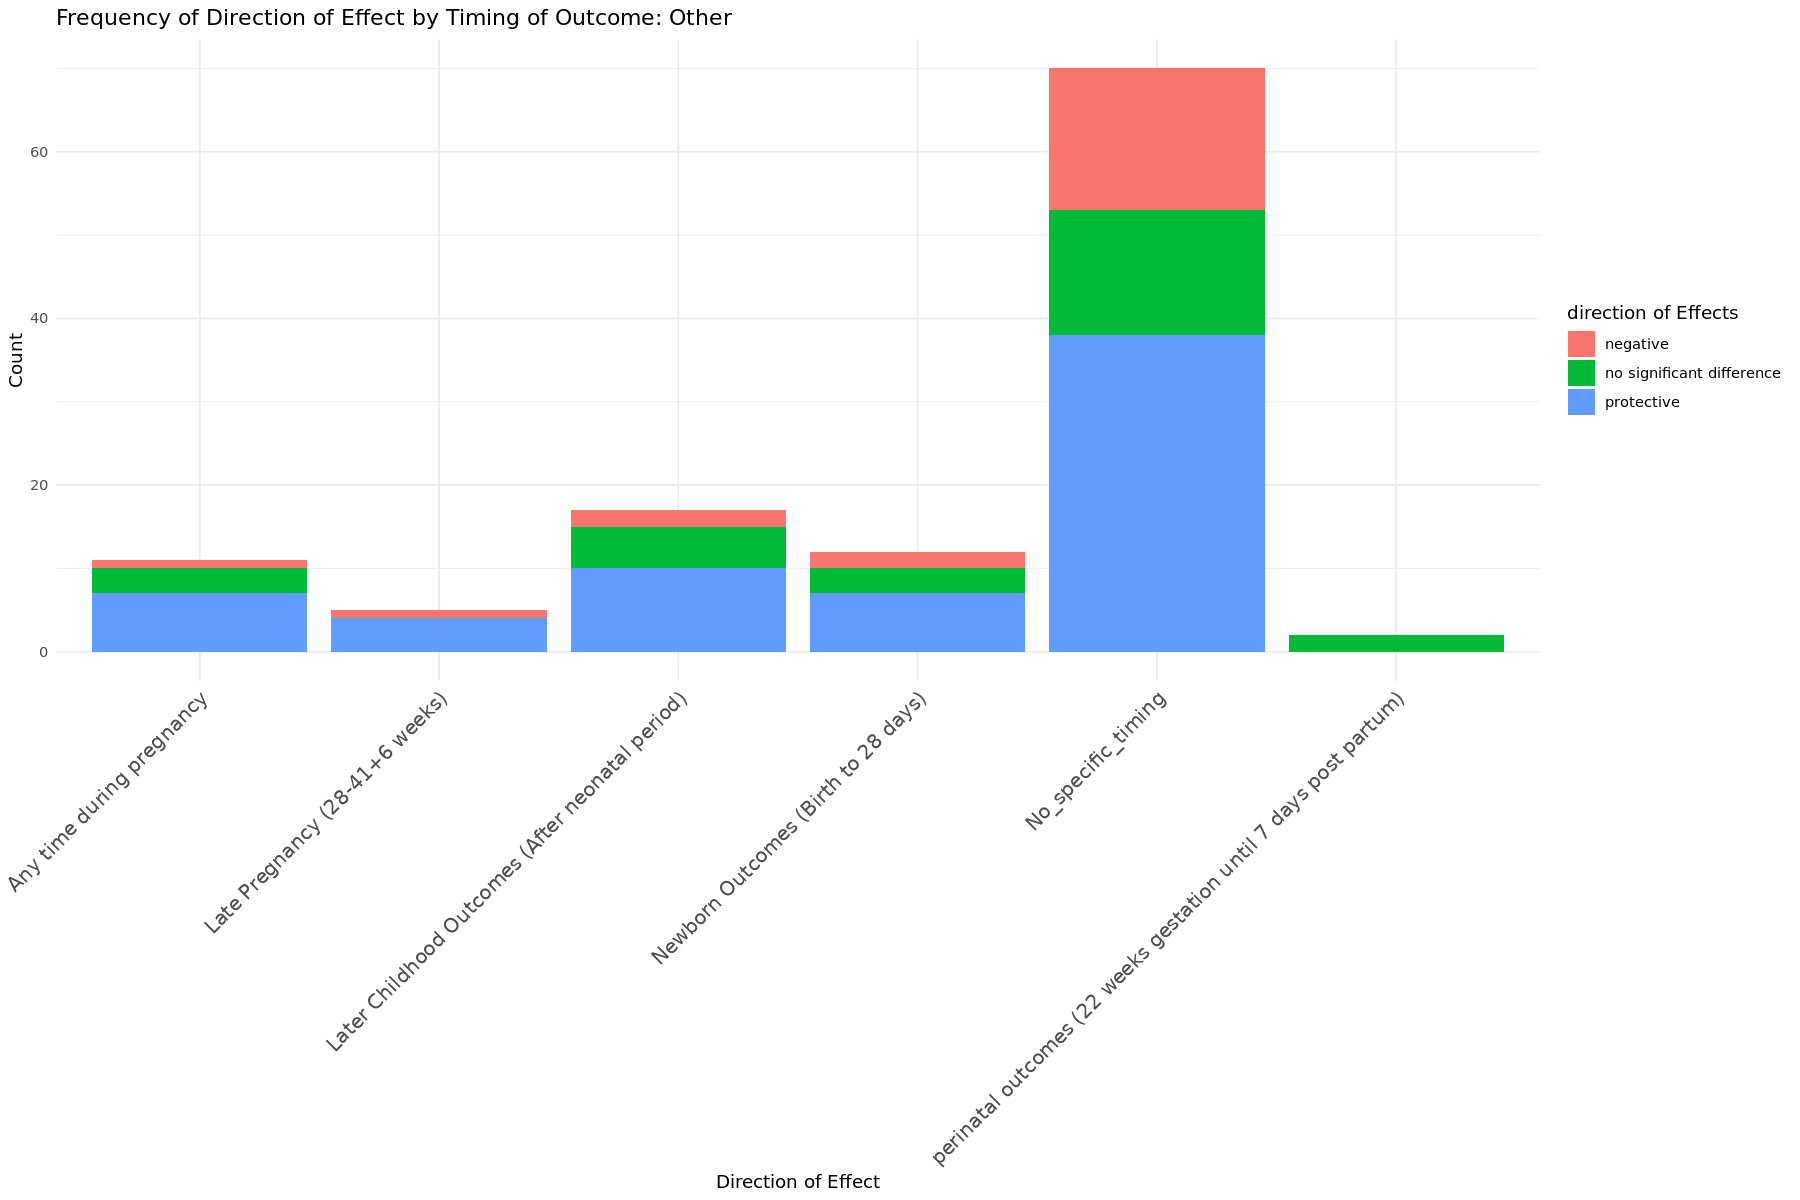

In [68]:

# Create the plot: Human
ggplot(dfEffect_human, aes(x = OutTimeCat, fill = directionOfEffects)) +
  geom_bar(position = "stack") +
  labs(
    title = "Frequency of Direction of Effect by Timing of Outcome: Human",
    x = "Direction of Effect",
    y = "Count",
    fill = "direction of Effects"
  ) +
  theme_minimal() +
  theme(
    axis.text.x = element_text(angle = 45, hjust = 1, size = 12)  # Adjust angle and size here
  )


# Create the plot: Other
ggplot(dfEffect_other, aes(x = OutTimeCat, fill = directionOfEffects)) +
  geom_bar(position = "stack") +
  labs(
    title = "Frequency of Direction of Effect by Timing of Outcome: Other",
    x = "Direction of Effect",
    y = "Count",
    fill = "direction of Effects"
  ) +
  theme_minimal() +
  theme(
    axis.text.x = element_text(angle = 45, hjust = 1, size = 12)  # Adjust angle and size here
  )



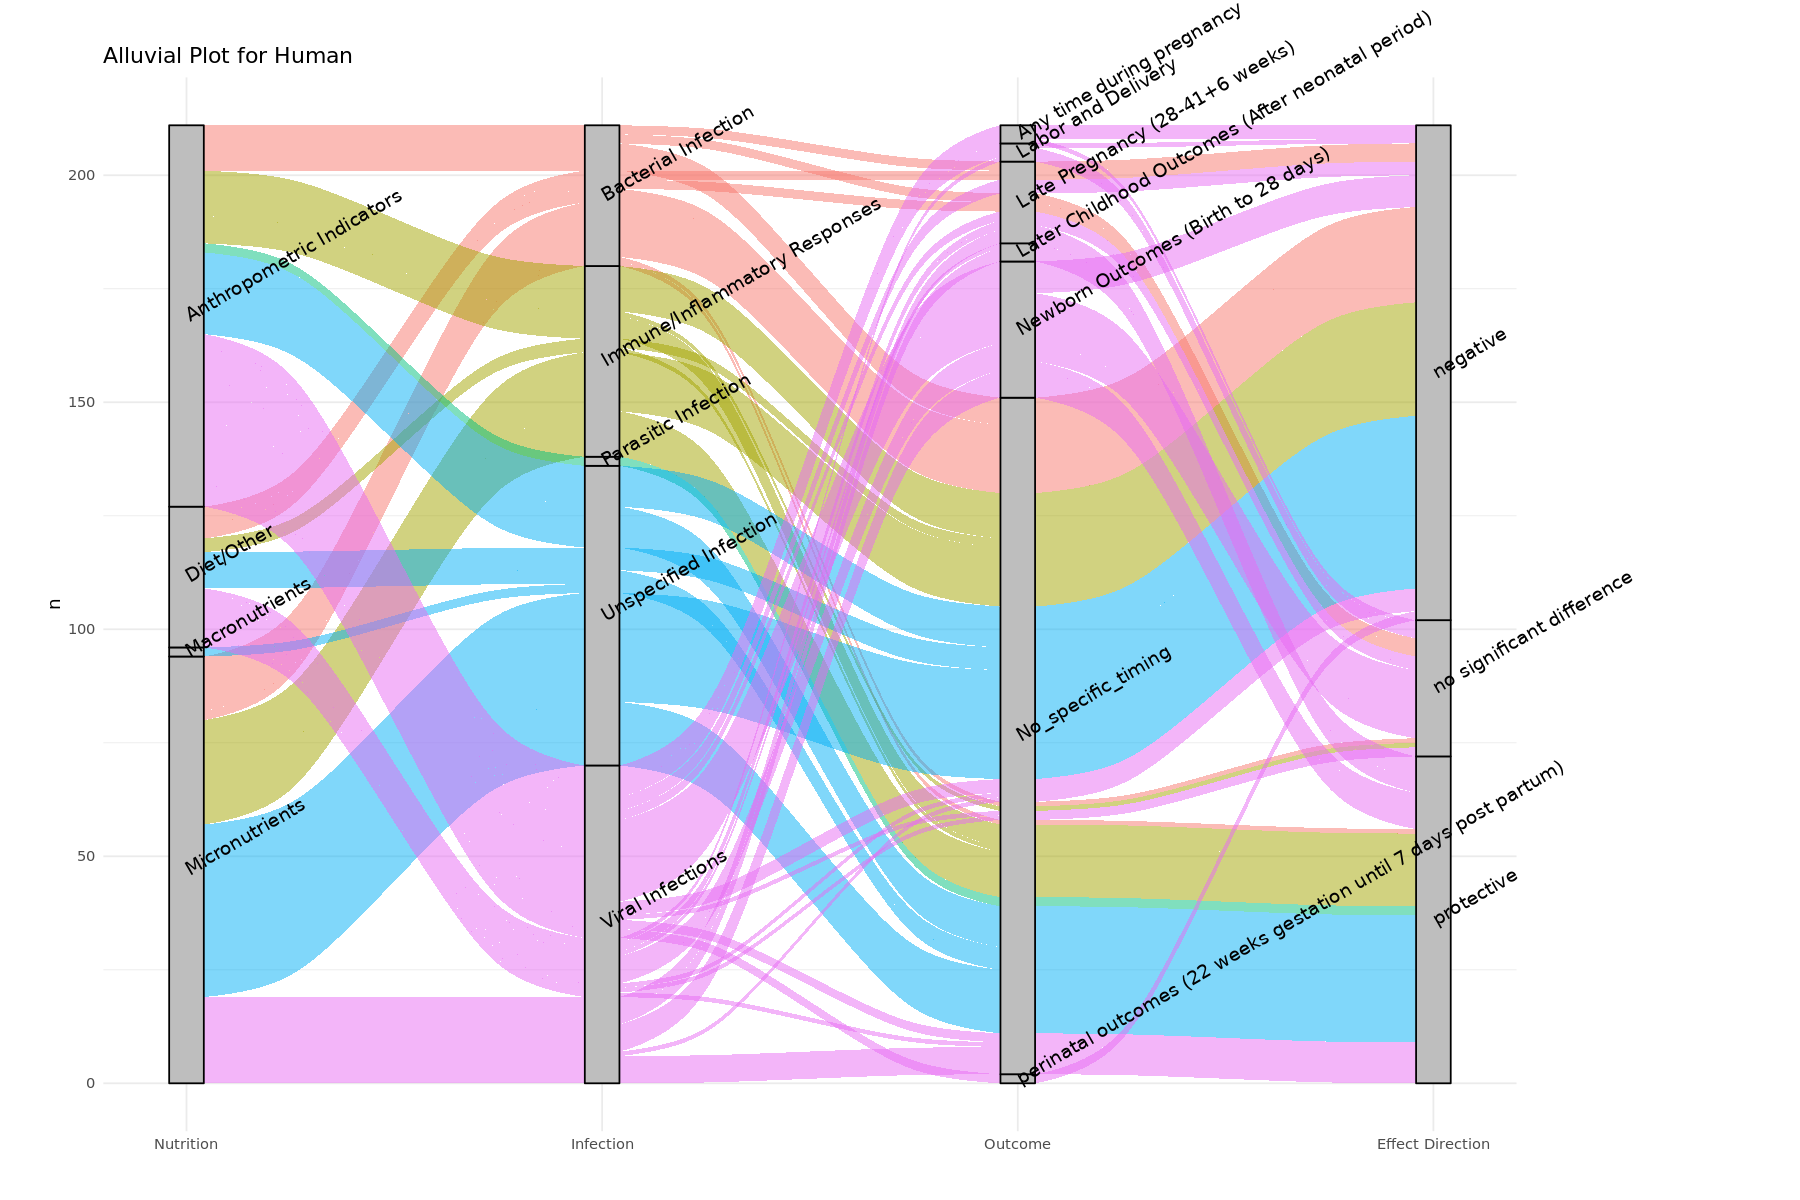

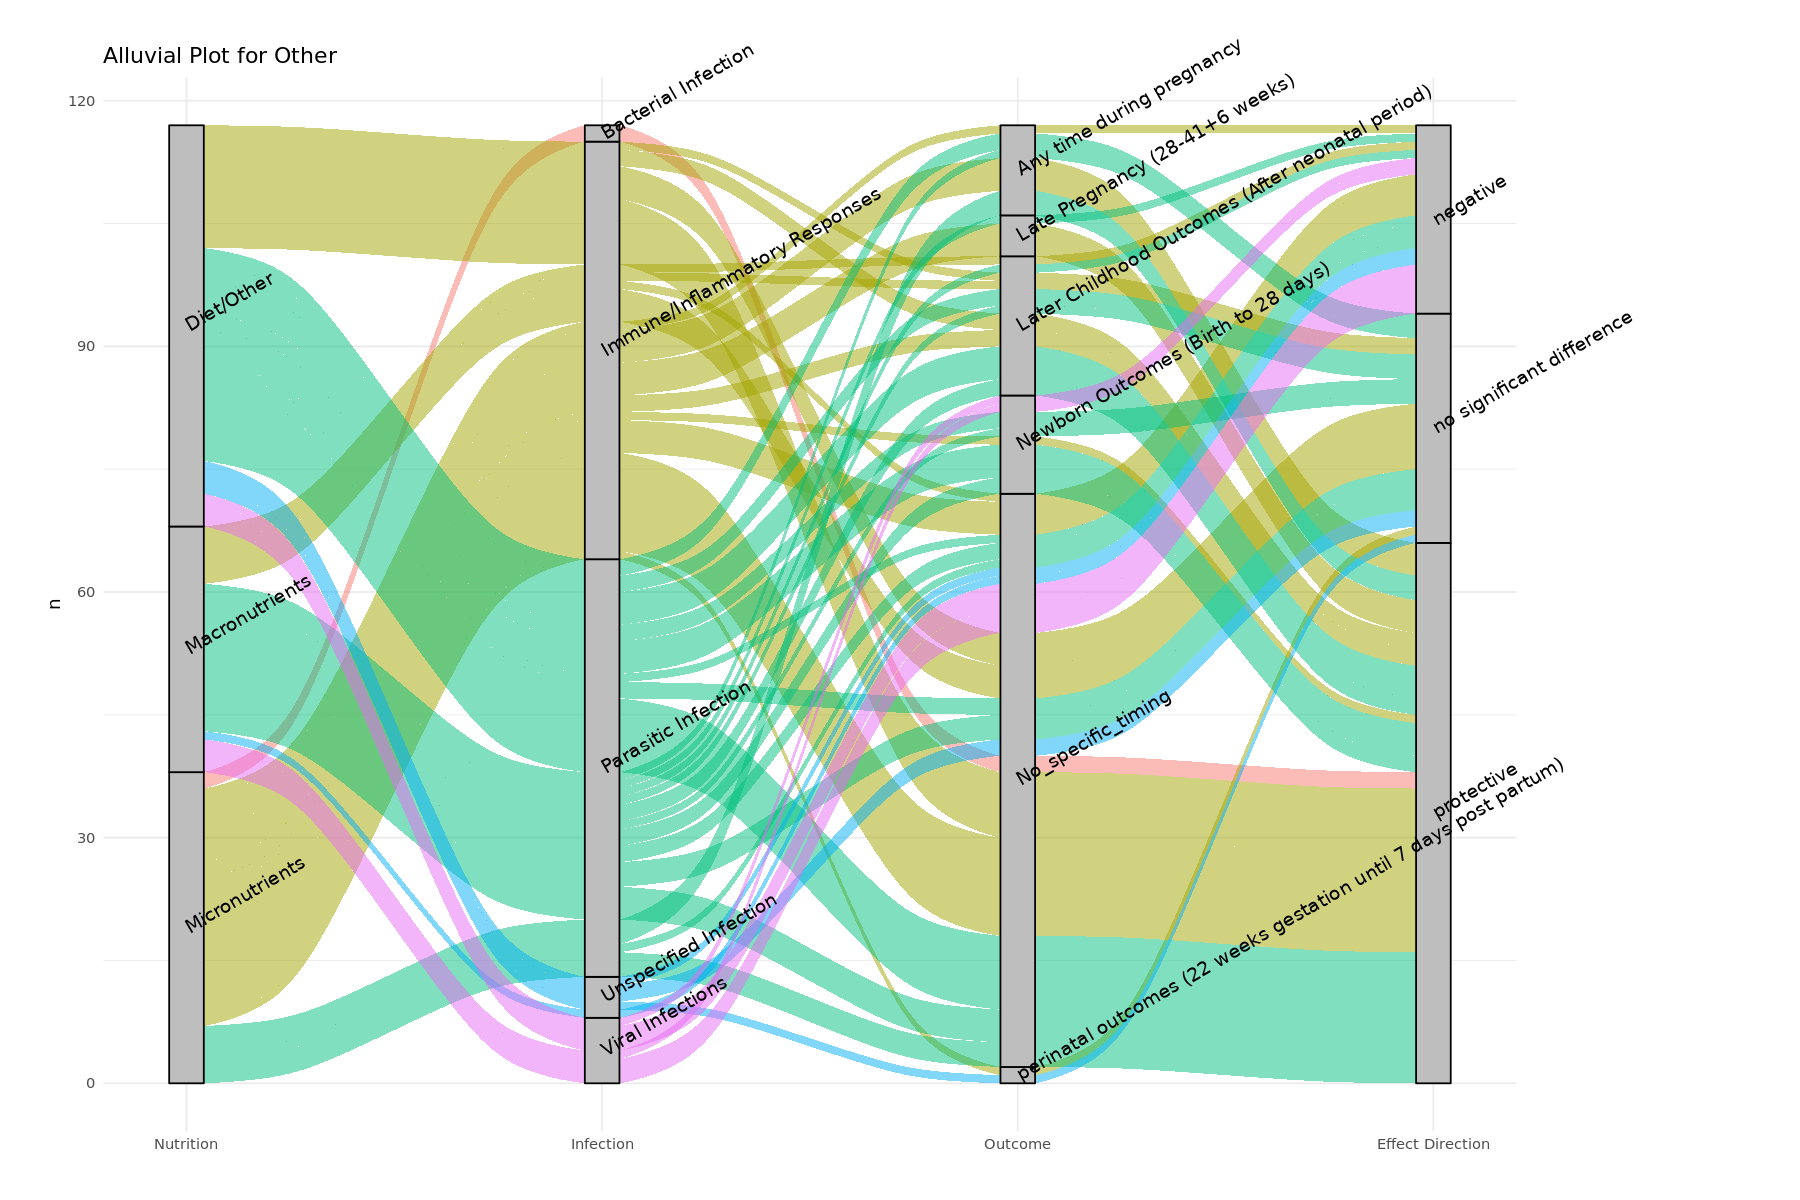

In [71]:
#Alluvial plot 


# Updated function to include a fourth axis
plot_alluvial <- function(data, title) {
  # Aggregate data to count flows
  flow_data <- data %>%
    count(NutCat, InfCat, OutTimeCat, directionOfEffects)

  ggplot(flow_data,
         aes(axis1 = NutCat, axis2 = InfCat, axis3 = OutTimeCat, axis4 = directionOfEffects, y = n)) +
    geom_alluvium(aes(fill = InfCat), width = 1/12) +
    geom_stratum(width = 1/12, fill = "grey", color = "black") +
    geom_text(stat = "stratum", aes(label = after_stat(stratum)), size = 4, angle = 30, hjust = 0) +
    scale_x_discrete(limits = c("Nutrition", "Infection", "Outcome", "Effect Direction"), expand = c(.05, .05)) +
    ggtitle(title) +
    theme_minimal() +
    theme(
legend.position = "none",
      plot.margin = unit(c(1, 6, 1, 1), "cm")  # Adjust margin for extra axis
    ) +
    coord_cartesian(clip = "off")
}

# Plot for Human
plot_alluvial(dfEffect_human, "Alluvial Plot for Human")

# Plot for Other
plot_alluvial(dfEffect_other, "Alluvial Plot for Other")

